# Initial setup

In [314]:
#!pip install salib ema_workbench plotly numpy pandas altair

In [315]:
import sys
import os

sys.path.append(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments\EMAworkbench')
sys.path.append(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments')

import pandas as pd
import matplotlib.cm as cm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from ema_workbench.analysis import prim
#import pareto
import os
import glob
import numpy as np
import pandas as pd
import os
import datetime as DT


# plt.rcParams['text.usetex'] = True

# matplotlib.rcParams['mathtext.fontset'] = 'stix'
# matplotlib.rcParams['font.family'] = 'STIXGeneral'



## Load results (Sobol, BAUs, consumption, etc)

In [316]:
from ema_workbench import load_results

results = load_results(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/gr4sp_SOBOL2021-Feb-03.tar.gz')



In [317]:
experiments, outcomes = results
experiments.describe()

annualCpi  annualInflation    consumption  \
count  126000.000000    126000.000000  126000.000000   
mean        3.000238         2.998810       1.999048   
std         1.415313         1.415313       1.414556   
min         1.000000         1.000000       0.000000   
25%         2.000000         2.000000       1.000000   
50%         3.000000         3.000000       2.000000   
75%         4.000000         4.000000       3.000000   
max         5.000000         5.000000       4.000000   

       domesticConsumptionPercentage  energyEfficiency  \
count                  126000.000000     126000.000000   
mean                       34.990000          1.000714   
std                         8.939456          0.816645   
min                        20.000000          0.000000   
25%                        27.000000          0.000000   
50%                        35.000000          1.000000   
75%                        43.000000          2.000000   
max                        50.000000          2.000000   

       generationRolloutPeriod  generatorRetirement  importPriceFactor  \
count            126000.000000        126000.000000      126000.000000   
mean                  5.497143            -0.001429          -0.007143   
std                   2.872126             3.161913          29.152702   
min                   1.000000            -5.000000         -50.000000   
25%                   3.000000            -3.000000         -25.000000   
50%                   5.500000             0.000000           0.000000   
75%                   8.000000             3.000000          25.000000   
max                  10.000000             5.000000          50.000000   

       includePublicallyAnnouncedGen  learningCurve  ...  \
count                  126000.000000  126000.000000  ...   
mean                        0.500000       7.497143  ...   
std                         0.500002       4.609583  ...   
min                         0.000000       0.000000  ...   
25%                         0.000000       3.750000  ...   
50%                         0.500000       7.500000  ...   
75%                         1.000000      11.250000  ...   
max                         1.000000      15.000000  ...   

       priceChangePercentageBrownCoal  priceChangePercentageOcgt  \
count                   126000.000000              126000.000000   
mean                        -0.018333                   0.006190   
std                         29.153567                  29.154507   
min                        -50.000000                 -50.000000   
25%                        -25.000000                 -25.000000   
50%                          0.000000                   0.000000   
75%                         25.000000                  25.000000   
max                         50.000000                  50.000000   

       priceChangePercentageWater  priceChangePercentageWind      rooftopPV  \
count               126000.000000              126000.000000  126000.000000   
mean                     0.005000                   0.000714       5.999524   
std                     29.151743                  29.152674       0.816208   
min                    -50.000000                 -50.000000       5.000000   
25%                    -25.000000                 -25.000000       5.000000   
50%                      0.000000                   0.000000       6.000000   
75%                     25.000000                  25.000000       7.000000   
max                     50.000000                  50.000000       7.000000   

       scheduleMinCapMarketGen  semiScheduleGenSpotMarket  \
count            126000.000000              126000.000000   
mean                150.541905                   8.998333   
std                  86.593375                   0.816061   
min                   1.000000                   8.000000   
25%                  75.750000                   8.000000   
50%                 150.500000                   9.000000   
75%                 225

In [318]:
bau_scenario_id = max(experiments['scenario']) + 1

new_row = pd.DataFrame({'annualCpi': 2.33, 'annualInflation': 3.3, 'importPriceFactor': 29, 'nameplateCapacityChangeBrownCoal': 0,
       'nameplateCapacityChangeWater': 0,'nameplateCapacityChangeBattery': 0,
        'nameplateCapacityChangeSolar': 0, 'nameplateCapacityChangeWind': 0,
        'nameplateCapacityChangeOcgt': 0, 'consumption': 0, 'energyEfficiency': 0,
       'generationRolloutPeriod':1, 'generatorRetirement':0,
       'includePublicallyAnnouncedGen':0, 'learningCurve':5,
       'nonScheduleGenSpotMarket': 10, 'nonScheduleMinCapMarketGen':1,
       'priceChangePercentageBrownCoal':0, 'priceChangePercentageOcgt':0,
       'priceChangePercentageWater':0, 'priceChangePercentageWind':0, 'priceChangePercentageBattery':0, 'rooftopPV':7,
       'domesticConsumptionPercentage':30,
       'scheduleMinCapMarketGen':300, 'semiScheduleGenSpotMarket':8,
       'semiScheduleMinCapMarketGen':300, 'solarUptake':0,
        'wholesaleTariffContribution':28.37, 'scenario': bau_scenario_id,
       'policy': "None", 'model': 'Gr4sp'}, index =[0]) 
# simply concatenate both dataframes 
experiments = pd.concat([experiments,new_row],sort=True).reset_index(drop = True) 

# rename none in policy column into constant value 0. PRIM fails otherwise.
if "None" in experiments["policy"].unique():
    experiments["policy"] = experiments["policy"].replace("None",int(0))

In [327]:
#Results for BAU were generated with the 'light' setting in the model.
#bau_results_df = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/VICSimDataYearSummary_160221-BAU-1998-2051.csv')
bau_results_df = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/csv/LCTVIC/LCTVICSimDataYearSummary_seed_1630227173040.csv')
#bau_results_df1 = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/BAUVICSimDataYearSummary_seed_1646023048032.csv')
#bau_results_df1 = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/csv/VIC/VICSimDataYearSummary_seed_1646096378772.csv')


bau_results_df = bau_results_df[bau_results_df['Time (Year)'] > 1999]

bau_results_df.head()

Time (Year)  Consumption (KWh) per household  \
2         2000                      8336.261405   
3         2001                      8225.690958   
4         2002                      8195.767319   
5         2003                      8320.504647   
6         2004                      8374.150215   

   Avg Tariff (c/KWh) per household  Primary Wholesale ($/MWh)  \
2                         14.290676                  25.878248   
3                         15.696864                  22.072247   
4                         10.385764                  25.678888   
5                         18.992432                  33.379941   
6                         20.724766                  38.155537   

   GHG Emissions (tCO2-e) per household  \
2                             10.462258   
3                             10.284990   
4                             10.154013   
5                             10.179413   
6                             10.152307   

   Number of Domestic Consumers (households)  Percentage Renewable Production  \
2                                  1695784.0                         0.034438   
3                                  1724718.0                         0.035015   
4                                  1753652.0                         0.041821   
5                                  1782586.0                         0.051772   
6                                  1811520.0                         0.058035   

   System Production Primary Spot  System Production Secondary Spot  \
2                    4.693226e+07                               0.0   
3                    4.694292e+07                               0.0   
4                    4.746060e+07                               0.0   
5                    4.881474e+07                               0.0   
6                    4.986379e+07                               0.0   

   System Production Off Spot  ...  \
2               444979.872000  ...   
3               592307.850000  ...   
4               752769.978226  ...   
5               811384.142959  ...   
6               854241.817914  ...   

   285000 - Battery - Gannawarra Energy Storage System - 25.33 - S - 2020 - 2033 - OffSpot  \
2                                                0.0                                         
3                                                0.0                                         
4                                                0.0                                         
5                                                0.0                                         
6                                                0.0                                         

   293000 - Wind - Berrybank Wind Farm - 180.6 - SS - 2020 - 2050 - Primary  \
2                                                0.0                          
3                                                0.0                          
4                                                0.0                          
5                                                0.0                          
6                                                0.0                          

   295000 - Wind - Moorabool Wind Farm - 320.32 - SS - 2020 - 2044 - Primary  \
2                                                0.0                           
3                                                0.0                           
4                                                0.0                           
5                                                0.0                           
6                                                0.0                           

   297000 - Wind - Stockyard Hill Wind Farm - 531.93 - SS - 2020 - 2045 - Primary  \
2                                                0.0                                
3                                                0.0                                
4                                                0.0                                
5                                   

In [332]:
outcomes['PrimarySpot-WholesalePriceYear'] = outcomes['wholesalePriceYear']


outcomes_to_show = ['consumptionYear', 'tariffsYear', 'PrimarySpot-WholesalePriceYear', 'GHGYear', 
                    'numConsumersYear', 'primarySpotProductionYear', 'secondarySpotProductionYear', 
                    'offSpotProductionYear', 'renewableContributionYear', 'rooftopPVProductionYear', 
                    'coalProductionYear', 'waterProductionYear', 'windProductionYear', 'gasProductionYear', 
                    'solarProductionYear', 'BatteryProductionYear', 'numActorsYear', 'primaryUnmetDemandMwh', 
                    'primaryUnmetDemandHours', 'primaryUnmetDemandDays', 'primaryMaxUnmetDemandMwhPerHour', 
                    'secondaryUnmetDemandMwh', 'secondaryUnmetDemandHours', 'secondaryUnmetDemandDays', 
                    'secondaryMaxUnmetDemandMwhPerHour']

# 23 levers/uncertainties selected after EET (last test July 2020)
# 25 uncertainties selected aftet EET including change on domestic demand and unmet demand output (August 2020)
uncertainties = experiments.columns[:-3]

#from startYear
startYear = 2000
startYearShift = (startYear - 1998)

time = outcomes['TIMEYear'][0, startYearShift:]

points_of_interest = [*range(2020,2051,10)] 
#points_of_interest = [*range(2000,2019,5)] 

points_of_interest = [ x - startYear for x in points_of_interest]

# Filter outcomes taking into account the startYear, and removing Seed Experiment info. 
# Seed it is useful if I want to retrieve more info from the csv files, or redo the experiments with the
# simulation parameters
outcomes_filtered = {k:v[:, startYearShift:] for k,v in outcomes.items() if k != 'seedExperimentCsv'}

In [336]:
seed_bau = bau_scenario_id + 1
outcomes['TIMEYear'] = np.append(outcomes_filtered['TIMEYear'],
                                          [bau_results_df['Time (Year)'].values], axis=0)
outcomes['consumptionYear'] = np.append(outcomes_filtered['consumptionYear'],
                                                 [bau_results_df['Consumption (KWh) per household'].values], axis=0)
outcomes['tariffsYear'] = np.append(outcomes_filtered['tariffsYear'],
                                                 [bau_results_df['Avg Tariff (c/KWh) per household'].values], axis=0)
outcomes['wholesalePriceYear'] = np.append(outcomes_filtered['wholesalePriceYear'],
                                                 [bau_results_df['Primary Wholesale ($/MWh)'].values], axis=0)
outcomes['GHGYear'] = np.append(outcomes_filtered['GHGYear'],
                                                 [bau_results_df['GHG Emissions (tCO2-e) per household'].values], axis=0)
outcomes['numConsumersYear'] = np.append(outcomes_filtered['numConsumersYear'],
                                                 [bau_results_df['Number of Domestic Consumers (households)'].values], axis=0)
outcomes['primarySpotProductionYear'] = np.append(outcomes_filtered['primarySpotProductionYear'],
                                                 [bau_results_df['System Production Primary Spot'].values], axis=0)
outcomes['secondarySpotProductionYear'] = np.append(outcomes_filtered['secondarySpotProductionYear'],
                                                 [bau_results_df['System Production Secondary Spot'].values], axis=0)
outcomes['offSpotProductionYear'] = np.append(outcomes_filtered['offSpotProductionYear'],
                                                 [bau_results_df['System Production Off Spot'].values], axis=0)
outcomes['renewableContributionYear'] = np.append(outcomes_filtered['renewableContributionYear'],
                                                 [bau_results_df['Percentage Renewable Production'].values], axis=0)
outcomes['rooftopPVProductionYear'] = np.append(outcomes_filtered['rooftopPVProductionYear'],
                                                 [bau_results_df['System Production Rooftop PV'].values], axis=0)
outcomes['coalProductionYear'] = np.append(outcomes_filtered['coalProductionYear'],
                                                 [bau_results_df['System Production Coal'].values], axis=0)
outcomes['windProductionYear'] = np.append(outcomes_filtered['windProductionYear'],
                                                 [bau_results_df['System Production Wind'].values], axis=0)
outcomes['gasProductionYear'] = np.append(outcomes_filtered['gasProductionYear'],
                                                 [bau_results_df['System Production Gas'].values], axis=0)
outcomes['solarProductionYear'] = np.append(outcomes_filtered['solarProductionYear'],
                                                 [bau_results_df['System Production Solar'].values], axis=0)   
outcomes['waterProductionYear'] = np.append(outcomes_filtered['waterProductionYear'],
                                                 [bau_results_df['System Production Water'].values], axis=0)
outcomes['BatteryProductionYear'] = np.append(outcomes_filtered['BatteryProductionYear'],
                                                 [bau_results_df['System Production Battery'].values], axis=0)
outcomes['numActorsYear'] = np.append(outcomes_filtered['numActorsYear'],
                                                 [bau_results_df['Number of Active Actors'].values], axis=0)
outcomes['primaryUnmetDemandMwh'] = np.append(outcomes_filtered['primaryUnmetDemandMwh'],
                                                 [bau_results_df['Primary Total Unmet Demand (MWh)'].values], axis=0)
outcomes['primaryUnmetDemandHours'] = np.append(outcomes_filtered['primaryUnmetDemandHours'],
                                                 [bau_results_df['Primary Total Unmet Demand (Hours)'].values], axis=0)
outcomes['primaryUnmetDemandDays'] = np.append(outcomes_filtered['primaryUnmetDemandDays'],
                                                 [bau_results_df['Primary Total Unmet Demand (Days)'].values], axis=0)
outcomes['primaryMaxUnmetDemandMwhPerHour'] = np.append(outcomes_filtered['primaryMaxUnmetDemandMwhPerHour'],
                                                 [bau_results_df['Primary Max Unmet Demand Per Hour (MWh)'].values], axis=0)
outcomes['secondaryUnmetDemandMwh'] = np.append(outcomes_filtered['secondaryUnmetDemandMwh'],
                                                 [bau_results_df['Secondary Total Unmet Demand (MWh)'].values], axis=0)
outcomes['secondaryUnmetDemandHours'] = np.append(outcomes_filtered['secondaryUnmetDemandHours'],
                                                 [bau_results_df['Secondary Total Unmet Demand (Hours)'].values], axis=0)
outcomes['secondaryUnmetDemandDays'] = np.append(outcomes_filtered['secondaryUnmetDemandDays'],
                                                 [bau_results_df['Secondary Total Unmet Demand (Days)'].values], axis=0)
outcomes['secondaryMaxUnmetDemandMwhPerHour'] = np.append(outcomes_filtered['secondaryMaxUnmetDemandMwhPerHour'],
                                                 [bau_results_df['Secondary Max Unmet Demand Per Hour (MWh)'].values], axis=0)

#outcomes['seedExperimentCsv'] = np.append(outcomes_filtered['seedExperimentCsv'], [seed_bau], axis=0)


In [337]:
ooi = 'GHGYear'
data_GHG_household = outcomes_filtered[ooi]

""" Converts household data in tCO2e into total residential data in MtCO2e"""
data_GHG_residential = (data_GHG_household * outcomes_filtered['numConsumersYear']) / 1000000.0
data_GHG_residential_bau = (bau_results_df['GHG Emissions (tCO2-e) per household'] * bau_results_df['Number of Domestic Consumers (households)']) / 1000000.0

""" Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
data_GHG_total = data_GHG_residential / 0.3
data_GHG_total_bau = data_GHG_residential_bau / 0.3


"""Overwrite GHG with the data of interest"""
outcomes_filtered[ooi] = data_GHG_total
bau_results_df[ooi] = data_GHG_total_bau

In [338]:
ooi = 'consumptionYear'
data_consumption_household = outcomes_filtered[ooi]

In [339]:
""" Converts household data in KWh into total residential data in MWh"""
data_consumption_residential = (data_consumption_household * outcomes_filtered['numConsumersYear']) / 1000.0

""" Applies scaling factor used in simulation, so that data represents total consumption, not only residential"""
data_consumption_total = data_consumption_residential / 0.3

"""Overwrite Consumption with the data of interest"""
outcomes_filtered[ooi] = data_consumption_total

In [340]:
primary = bau_results_df['System Production Primary Spot']
secondary = bau_results_df['System Production Secondary Spot']
off = bau_results_df['System Production Off Spot']
unmetPrimary = bau_results_df['Primary Total Unmet Demand (MWh)']
unmetSecondary = bau_results_df['Secondary Total Unmet Demand (MWh)']

consumptionPrimary = primary + off + unmetPrimary
consumptionSecondary = secondary + off + unmetSecondary

percentageUnmetPrimary = (unmetPrimary/consumptionPrimary)*100
percentageUnmetSecondary = (unmetSecondary/consumptionSecondary)*100
    
where_are_NaNs = np.isnan(percentageUnmetPrimary)
percentageUnmetPrimary[where_are_NaNs] = 0

where_are_NaNs = np.isnan(percentageUnmetSecondary)
percentageUnmetSecondary[where_are_NaNs] = 0

bau_results_df['unmetPercentageConsumptionPrimary'] = percentageUnmetPrimary
bau_results_df['unmetPercentageConsumptionSecondary'] = percentageUnmetSecondary

# ISP  and GR4SP consumption scenarios 

In [341]:
## consumption scenarios used from the ISP, but offset by adding OpSentOut + PV + EE + ONSG
consumptionDataISP = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/gr4spdb_public_isp_annual_consumption.csv', index_col=['year'])

consumptionDataISP

region                     category          subcategory     scenario  \
year                                                                         
2010    NEM               AuxiliaryLoads                  NaN       Actual   
2010    NEM                       Losses  Distribution losses       Actual   
2010    NEM                       Losses  Transmission losses       Actual   
2010    NEM                       Native               Native       Actual   
2010    NEM                  Operational                  NaN       Actual   
...     ...                          ...                  ...          ...   
2050    VIC  SmallNonScheduledGeneration     PVNSG generation  Step change   
2019    TAS                  Operational                  NaN       Actual   
2019    VIC                  Operational                  NaN       Actual   
2018    VIC                  Operational                  NaN       Actual   
2018    VIC             OperationalNoAux                  NaN       Actual   

      annual_consumption  
year                      
2010          12518.5520  
2010           8275.1490  
2010           4895.5527  
2010         199811.7200  
2010         196273.5500  
...                  ...  
2050           1527.4663  
2019          10308.7010  
2019          44436.1900  
2018          45616.9570  
2018          42471.2900  

[16942 rows x 5 columns]

In [342]:
vicRegion = consumptionDataISP['region'] == "VIC"
vicRegion = consumptionDataISP[vicRegion]
categories = ["Operational", 'PriceImpact', 'EnergyEfficiency', 'SmallNonScheduledGeneration', 'RooftopPV']

vicIspGr4sp = vicRegion[vicRegion.category.isin(categories)]
vicIspGr4sp.head()

region                     category       subcategory scenario  \
year                                                                  
2010    VIC                  Operational               NaN   Actual   
2010    VIC  SmallNonScheduledGeneration   ONSG generation   Actual   
2010    VIC  SmallNonScheduledGeneration  PVNSG generation   Actual   
2011    VIC                  Operational               NaN   Actual   
2011    VIC  SmallNonScheduledGeneration   ONSG generation   Actual   

      annual_consumption  
year                      
2010        47953.707000  
2010          378.440920  
2010            1.100938  
2011        47702.965000  
2011          399.973900

In [343]:
scenariosConsumption = vicIspGr4sp.groupby(['year', 'scenario'])['annual_consumption'].sum()
scenariosConsumption_df = scenariosConsumption.to_frame()
scenariosConsumption_df.head()

annual_consumption
year scenario                    
2010 Actual          48333.248858
2011 Actual          48104.370145
2012 Actual          47900.291893
2013 Actual          47567.480644
2014 Actual          46403.646212

<Figure size 432x288 with 0 Axes>

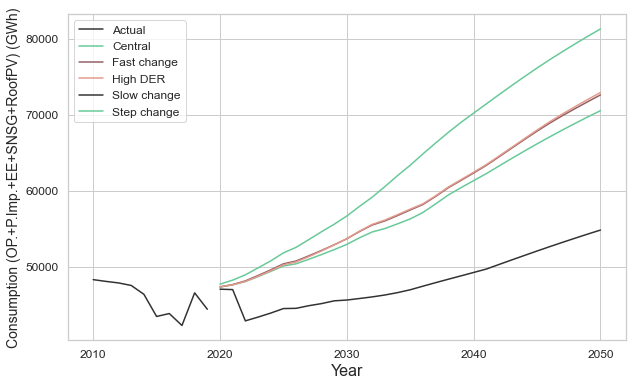

In [344]:
plt.figure()

consPlot = scenariosConsumption_df.unstack(level=1)
consPlot.columns = consPlot.columns.droplevel()
ax=consPlot.plot(kind='line', subplots=False, figsize=(10,6), fontsize = 12)
plt.ylabel("Consumption (OP.+P.Imp.+EE+SNSG+RoofPV) (GWh)",fontsize=14)
plt.xlabel("Year",fontsize=16)
plt.legend(fontsize=12)    
plt.show()

In [345]:
# select and plot only the operational sent-out data to compare how the scenarios change 
operCategory = ["Operational"]

vicIsp = vicRegion[vicRegion.category.isin(operCategory)]
vicIsp.head()

region     category subcategory scenario  annual_consumption
year                                                             
2010    VIC  Operational         NaN   Actual           47953.707
2011    VIC  Operational         NaN   Actual           47702.965
2012    VIC  Operational         NaN   Actual           47233.094
2013    VIC  Operational         NaN   Actual           46850.645
2014    VIC  Operational         NaN   Actual           45634.777

In [346]:
scenariosOperationalConsumption = vicIsp.groupby(['year', 'scenario'])['annual_consumption'].sum()
scenariosOperationalConsumption_df = scenariosOperationalConsumption.to_frame()
scenariosOperationalConsumption_df.head()

annual_consumption
year scenario                    
2010 Actual             47953.707
2011 Actual             47702.965
2012 Actual             47233.094
2013 Actual             46850.645
2014 Actual             45634.777

<Figure size 432x288 with 0 Axes>

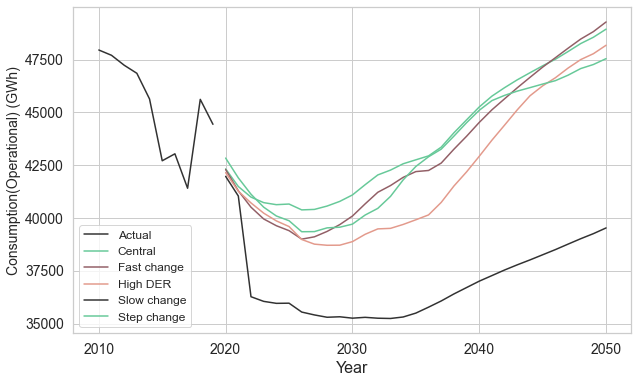

In [347]:
plt.figure()

consPlotOp = scenariosOperationalConsumption_df.unstack(level=1)
consPlotOp.columns = consPlotOp.columns.droplevel()
ax=consPlotOp.plot(kind='line', subplots=False, figsize=(10,6), fontsize = 14)
plt.ylabel("Consumption(Operational) (GWh)",fontsize=14)
plt.xlabel("Year",fontsize=16)
plt.legend(fontsize=12)    
plt.show()

# Load FF LCT and EVA

In [348]:
from ema_workbench import load_results

resultsLCTff = load_results(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/gr4sp_LCT2021-Sep-01.tar.gz')


In [349]:
ev_results_LCT_df = pd.read_excel(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/notebookGr4sp/outputs/data/EV_LCT2021-Sep-1_all.xlsx', index_col=[0])
ev_results_BAU_df = pd.read_excel(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/notebookGr4sp/outputs/data/EV_all_BAU.xlsx', index_col=[0])

In [350]:
# Duplicate results from 2040 into the years of 2040-2050
experimentsLCTff, outcomesLCTff = resultsLCTff

ev_results_LCT_df.insert(0, 1999, ev_results_LCT_df[2000])
ev_results_LCT_df.insert(0, 1998, ev_results_LCT_df[2000])
for t in range(2041,2051):
     ev_results_LCT_df[t] = ev_results_LCT_df[2040]
        
# Add it to outcomes data structure
outcomesLCTff['Energy Vulnerability Percentage'] = ev_results_LCT_df.values

In [351]:
# Duplicate results BAU from 2040 into the years of 2040-2050
ev_results_BAU_df.insert(0, 1999, ev_results_BAU_df[2000])
ev_results_BAU_df.insert(0, 1998, ev_results_BAU_df[2000])
for t in range(2041,2051):
     ev_results_BAU_df[t] = ev_results_BAU_df[2040]
        
# Add it to outcomes data structure
outcomesLCTff['Energy Vulnerability Percentage'] =  np.append(outcomesLCTff['Energy Vulnerability Percentage'],
                                                         ev_results_BAU_df.values, axis=0)

In [352]:
resultsBAUTEST = load_results(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/gr4sp_BAU2021-Aug-22.tar.gz')
experimentsBAUTEST, outcomesBAUTEST = resultsBAUTEST

ooi = 'GHGYear'
data_GHG_household = outcomesBAUTEST[ooi]

""" Converts household data in tCO2e into total residential data in MtCO2e"""
data_GHG_residential = (data_GHG_household * outcomesBAUTEST['numConsumersYear']) / 1000000.0

""" Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
data_GHG_total = data_GHG_residential / 0.3


"""Overwrite GHG with the data of interest"""
outcomesBAUTEST[ooi] = data_GHG_total

In [353]:
for col in experimentsLCTff:
    print(col, experimentsLCTff[col].unique())

consumption [0. 1. 2. 3.]
generatorRetirement [-5, -3, -2, -1, 0, 1]
Categories (6, int64): [-5, -3, -2, -1, 0, 1]
includePublicallyAnnouncedGen [0. 1.]
nameplateCapacityChangeWind [-20, 0, 15, 20, 30, 50]
Categories (6, int64): [-20, 0, 15, 20, 30, 50]
priceChangePercentageBrownCoal [-10, 0, 15, 20, 25, 35]
Categories (6, int64): [-10, 0, 15, 20, 25, 35]
priceChangePercentageWind [-50, -20, -10, 0, 10, 40]
Categories (6, int64): [-50, -20, -10, 0, 10, 40]
semiScheduleGenSpotMarket [ 8.  9. 10.]
scenario [0, 1, 2, 3, 4, ..., 31099, 31100, 31101, 31102, 31103]
Length: 31104
Categories (31104, int64): [0, 1, 2, 3, ..., 31100, 31101, 31102, 31103]
policy ['None']
Categories (1, object): ['None']
model ['Gr4sp']
Categories (1, object): ['Gr4sp']


In [383]:
# FF using the most influential factors for the LCT scenario
uncertaintiesLCTff = experimentsLCTff.columns[:-3]

#from startYear
startYear = 2000
startYearShift = (startYear - 1998)

time = outcomesLCTff['TIMEYear'][0, startYearShift:]


# Filter outcomes taking into account the startYear, and removing Seed Experiment info. 
# Seed it is useful if I want to retrieve more info from the csv files, or redo the experiments with the
# simulation parameters
outcomes_filteredLCTff = {k:v[:, startYearShift:] for k,v in outcomesLCTff.items() if k != 'seedExperimentCsv'}


In [385]:
ooi = 'GHGYear'
data_GHG_household = outcomes_filteredLCTff[ooi]

""" Converts household data in tCO2e into total residential data in MtCO2e"""
data_GHG_residential = (data_GHG_household * outcomes_filteredLCTff['numConsumersYear']) / 1000000.0

""" Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
data_GHG_total = data_GHG_residential / 0.3


"""Overwrite GHG with the data of interest"""
outcomes_filteredLCTff[ooi] = data_GHG_total


ooi = 'consumptionYear'
data_consumption_household = outcomes_filteredLCTff[ooi]

""" Converts household data in KWh into total residential data in MWh"""
data_consumption_residential = (data_consumption_household * outcomes_filteredLCTff['numConsumersYear']) / 1000.0

""" Applies scaling factor used in simulation, so that data represents total consumption, not only residential"""
data_consumption_total = data_consumption_residential / 0.3

"""Overwrite Consumption with the data of interest"""
outcomes_filteredLCTff[ooi] = data_consumption_total

primary = outcomes_filteredLCTff['primarySpotProductionYear']
secondary = outcomes_filteredLCTff['secondarySpotProductionYear']
off = outcomes_filteredLCTff['offSpotProductionYear']
unmetPrimary = outcomes_filteredLCTff['primaryUnmetDemandMwh']
unmetSecondary = outcomes_filteredLCTff['secondaryUnmetDemandMwh']

consumptionPrimary = primary + off + unmetPrimary
consumptionSecondary = secondary + off + unmetSecondary

percentageUnmetPrimary = (unmetPrimary/consumptionPrimary)*100
percentageUnmetSecondary = np.divide(unmetSecondary, consumptionSecondary, 
                                     out=np.zeros_like(unmetSecondary), where=consumptionSecondary!=0) *100

where_are_NaNs = np.isnan(percentageUnmetPrimary)
percentageUnmetPrimary[where_are_NaNs] = 0

where_are_NaNs = np.isnan(percentageUnmetSecondary)
percentageUnmetSecondary[where_are_NaNs] = 0

outcomes_filteredLCTff['unmetPercentageConsumptionPrimary'] = percentageUnmetPrimary
outcomes_filteredLCTff['unmetPercentageConsumptionSecondary'] = percentageUnmetSecondary

## Policy mixes LCT 2C 

- consumption [0. 1. 2. 3.]
- includePublicallyAnnouncedGen [0. 1.]
- generatorRetirement [-5, -3, -2, -1, 0, 1]
- nameplateCapacityChangeWind [-20, 0, 15, 20, 30, 50]
- priceChangePercentageBrownCoal [-10, 0, 15, 20, 25, 35]
- priceChangePercentageWind [-50, -20, -10, 0, 10, 40]
- semiScheduleGenSpotMarket [ 8.  9. 10.]
- generatorRetirement [-5. -4. -2. -1.  1.  2.]

Length: 31104
model [Gr4sp]
Categories (1, object): [Gr4sp]

In [386]:
def filter_ff(consumption, 
              generatorRetirement, 
              includePublicallyAnnouncedGen,
              nameplateCapacityChangeWind, 
              priceChangePercentageBrownCoal, 
              semiScheduleGenSpotMarket, 
              priceChangePercentageWind
             ):

    q1 = experimentsLCTff['consumption'] == consumption
    q2 = experimentsLCTff['generatorRetirement'] == generatorRetirement
    q3 = experimentsLCTff['includePublicallyAnnouncedGen'] == includePublicallyAnnouncedGen
    q4 = experimentsLCTff['nameplateCapacityChangeWind'] == nameplateCapacityChangeWind
    q5 = experimentsLCTff['priceChangePercentageBrownCoal'] == priceChangePercentageBrownCoal
    q6 = experimentsLCTff['semiScheduleGenSpotMarket'] == semiScheduleGenSpotMarket
    q7 = experimentsLCTff['priceChangePercentageWind'] == priceChangePercentageWind
    query = q1 & q2 & q3 & q4 & q5 & q6 & q7
    
    print(np.unique( query , return_counts=True))
    print(experimentsLCTff[ query ])
    
    return experimentsLCTff[ query ].index.values[0]

In [387]:
selected_indexLC2c1 = filter_ff(consumption = 0, 
                           generatorRetirement = 0, 
                           includePublicallyAnnouncedGen = 1,
                           nameplateCapacityChangeWind = 0,
                           priceChangePercentageBrownCoal = 0,
                           semiScheduleGenSpotMarket = 10,
                           priceChangePercentageWind = 0)

selected_indexLC2c2 = filter_ff(consumption = 0, 
                           generatorRetirement = 0, 
                           includePublicallyAnnouncedGen = 1,
                           nameplateCapacityChangeWind = 0,
                           priceChangePercentageBrownCoal = 25,
                           semiScheduleGenSpotMarket = 8,
                           priceChangePercentageWind = 0)

selected_indexLC2c3 = filter_ff(consumption = 2, 
                           generatorRetirement = -5, 
                           includePublicallyAnnouncedGen = 1,
                           nameplateCapacityChangeWind = 0,
                           priceChangePercentageBrownCoal = 20,
                           semiScheduleGenSpotMarket = 8,
                           priceChangePercentageWind = 0)

selected_indexLC2c4 = filter_ff(consumption = 1, 
                           generatorRetirement = -2, 
                           includePublicallyAnnouncedGen = 1,
                           nameplateCapacityChangeWind = 30,
                           priceChangePercentageBrownCoal = 20,
                           semiScheduleGenSpotMarket = 8,
                           priceChangePercentageWind = 0)

selected_indexLC2c5 = filter_ff(consumption = 1, 
                           generatorRetirement = -3, 
                           includePublicallyAnnouncedGen = 1,
                           nameplateCapacityChangeWind = 15,
                           priceChangePercentageBrownCoal = 20,
                           semiScheduleGenSpotMarket = 8,
                           priceChangePercentageWind = 0)


(array([False,  True]), array([31103,     1], dtype=int64))
      consumption generatorRetirement  includePublicallyAnnouncedGen  \
5969          0.0                   0                            1.0   

     nameplateCapacityChangeWind priceChangePercentageBrownCoal  \
5969                           0                              0   

     priceChangePercentageWind  semiScheduleGenSpotMarket scenario policy  \
5969                         0                       10.0     5969   None   

      model  
5969  Gr4sp  
(array([False,  True]), array([31103,     1], dtype=int64))
      consumption generatorRetirement  includePublicallyAnnouncedGen  \
6021          0.0                   0                            1.0   

     nameplateCapacityChangeWind priceChangePercentageBrownCoal  \
6021                           0                             25   

     priceChangePercentageWind  semiScheduleGenSpotMarket scenario policy  \
6021                         0                        8.0   

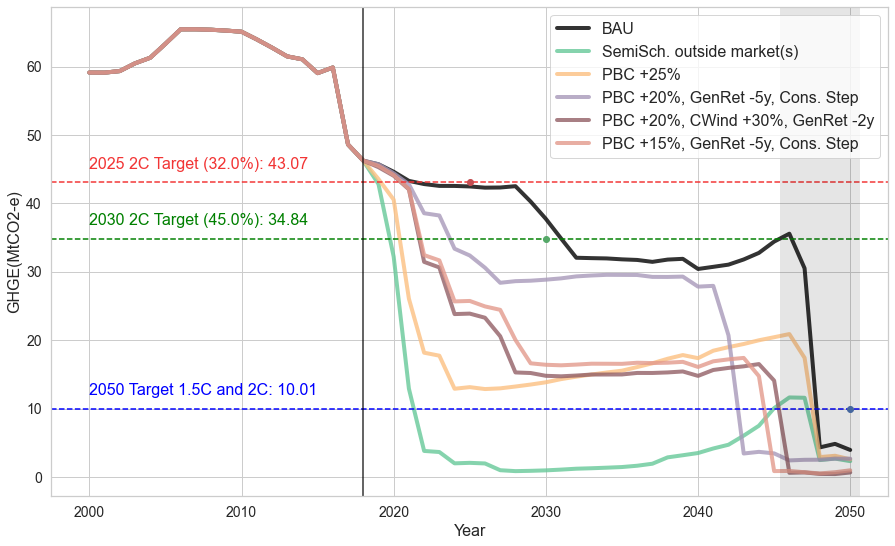

In [388]:
labelLct2_1 = 'SemiSch. outside market(s)'
labelLct2_2 = 'PBC +25%'
labelLct2_3 = 'PBC +20%, GenRet -5y, Cons. Step'
labelLct2_4 = 'PBC +20%, CWind +30%, GenRet -2y'
labelLct2_5 = 'PBC +15%, GenRet -5y, Cons. Step'

colorLct2_1 = '#67C999'
colorLct2_2 = '#FCC081'
colorLct2_3 = '#A899BA'
colorLct2_4 = '#925F66'
colorLct2_5 = '#E39A8C'

plt.figure(figsize=(15,9))
years = [DT.datetime.strptime(str(int(date)),'%Y') for date in bau_results_df['Time (Year)'].values]
years =  bau_results_df['Time (Year)'].values
plt.plot( years, bau_results_df['GHGYear'], color='black', alpha = 0.8, linewidth=4, label='BAU')


plt.plot( years, outcomes_filteredLCTff['GHGYear'][selected_indexLC2c1], color=colorLct2_1, alpha = 0.8, linewidth=4, label=labelLct2_1)
plt.plot( years, outcomes_filteredLCTff['GHGYear'][selected_indexLC2c2], color=colorLct2_2, alpha = 0.8, linewidth=4, label=labelLct2_2)
plt.plot( years, outcomes_filteredLCTff['GHGYear'][selected_indexLC2c3], color=colorLct2_3, alpha = 0.8, linewidth=4, label=labelLct2_3)
plt.plot( years, outcomes_filteredLCTff['GHGYear'][selected_indexLC2c4], color=colorLct2_4, alpha = 0.8, linewidth=4, label=labelLct2_4)
plt.plot( years, outcomes_filteredLCTff['GHGYear'][selected_indexLC2c5], color=colorLct2_5, alpha = 0.8, linewidth=4, label=labelLct2_5)

# Add dot and corresponding text
reference = bau_results_df[bau_results_df['Time (Year)'] == 2005]['GHGYear'].values

reduction = 0.32

plt.axhline((reference - (reference * reduction)), ls='--',color='#f23535', alpha = 1)

plt.text(years[0], reference - (reference * reduction)+2, f'2025 2C Target ({reduction*100}%): {((reference - (reference * reduction))[0]):.2f}',color='#f23535',size =16)
plt.plot(2025, (reference - (reference * reduction)), 'ro')

# reduction = 0.39

# plt.axhline((reference - (reference * reduction)), ls='--',color='red', alpha = 0.6)

# plt.text(years[0], reference - (reference * reduction)+2, f'2025 Target1.5: {((reference - (reference * reduction))[0]):.2f}',color='red')
# plt.plot(2025, (reference - (reference * reduction)), 'ro')

reduction = 0.45

plt.axhline((reference - (reference * reduction)) ,ls='--',color='green', alpha = 1)
plt.text(years[0], reference - (reference * reduction)+2, f'2030 2C Target ({reduction*100}%): {((reference - (reference * reduction))[0]):.2f}',color='green',size =16)
plt.plot(2030, (reference - (reference * reduction)), 'go')

# reduction = 0.60

# plt.axhline((reference - (reference * reduction)) ,ls='--',color='green', alpha = 0.6)
# plt.text(years[0], reference - (reference * reduction)+2, f'2030 Target 1.5: {((reference - (reference * reduction))[0]):.2f}',color='green')
# plt.plot(2030, (reference - (reference * reduction)), 'go')

reduction = 0.842

plt.axhline((reference - (reference * reduction)) ,ls='--',color='blue', alpha = 1)
plt.text(years[0], reference - (reference * reduction)+2, f'2050 Target 1.5C and 2C: {((reference - (reference * reduction))[0]):.2f}',color='blue', size =16)
plt.plot(2050, (reference - (reference * reduction)), 'bo')

plt.axvline(2018, ls='-',color='black', alpha = 0.8)
plt.axvline(2048, ls='-',color='black', alpha = 0.1, lw = 80)

#plt.grid( linestyle='-', linewidth=1)
plt.xlabel('Year', size=16)
plt.ylabel('GHGE(MtCO2-e)', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(prop={'size':16}, loc='upper right')

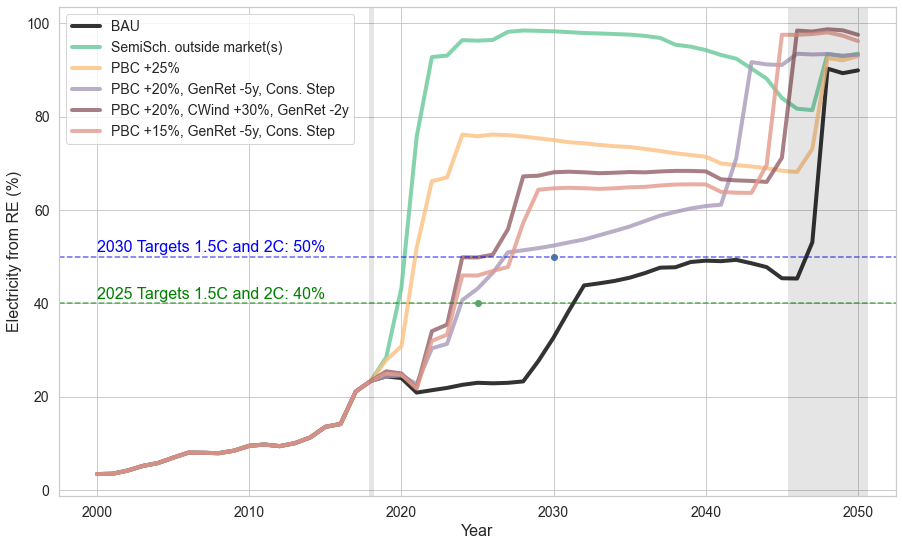

In [389]:
plt.figure(figsize=(15,9))

plt.plot( years, bau_results_df['Percentage Renewable Production']*100, color='black', alpha = 0.8, linewidth=4, label='BAU')

plt.plot( years, outcomes_filteredLCTff['renewableContributionYear'][selected_indexLC2c1]*100, color=colorLct2_1, alpha = 0.8, linewidth=4, label=labelLct2_1)
plt.plot( years, outcomes_filteredLCTff['renewableContributionYear'][selected_indexLC2c2]*100, color=colorLct2_2, alpha = 0.8, linewidth=4, label=labelLct2_2)
plt.plot( years, outcomes_filteredLCTff['renewableContributionYear'][selected_indexLC2c3]*100, color=colorLct2_3, alpha = 0.8, linewidth=4, label=labelLct2_3)
plt.plot( years, outcomes_filteredLCTff['renewableContributionYear'][selected_indexLC2c4]*100, color=colorLct2_4, alpha = 0.8, linewidth=4, label=labelLct2_4)
plt.plot( years, outcomes_filteredLCTff['renewableContributionYear'][selected_indexLC2c5]*100, color=colorLct2_5, alpha = 0.8, linewidth=4, label=labelLct2_5)



# Add dot and corresponding text

target = 40

plt.axhline(  target ,ls='--',color='green', alpha = 0.6)
plt.text(years[0], target+1, f'2025 Targets 1.5C and 2C: {target:}%',color='green', size=16)
plt.plot(2025, target, 'go')

target = 50
plt.axhline(  target ,ls='--',color='blue', alpha = 0.6)
plt.text(years[0], target+1, f'2030 Targets 1.5C and 2C: {target:}%',color='blue',size=16)
plt.plot(2030, target, 'bo')
plt.axvline(2018, ls='-',color='black', alpha = 0.1, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.1, lw = 80)


#plt.grid( linestyle='-', linewidth=1)
plt.xlabel('Year', size=16)
plt.ylabel('Electricity from RE (%)', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(prop={'size':14})

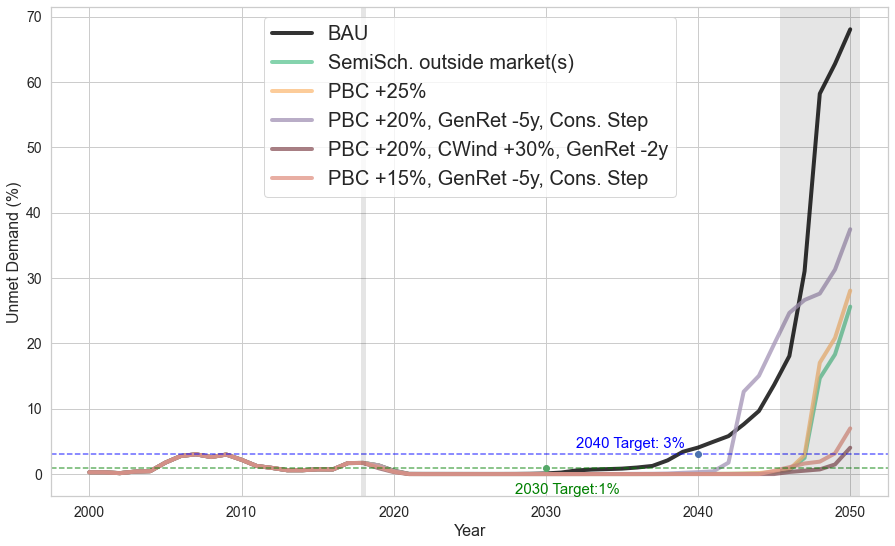

In [390]:
plt.figure(figsize=(15,9))

plt.plot( years, bau_results_df['unmetPercentageConsumptionPrimary'], color='black', alpha = 0.8, linewidth=4, label='BAU')

plt.plot( years, outcomes_filteredLCTff['unmetPercentageConsumptionPrimary'][selected_indexLC2c1], color=colorLct2_1, alpha = 0.8, linewidth=4, label=labelLct2_1)
plt.plot( years, outcomes_filteredLCTff['unmetPercentageConsumptionPrimary'][selected_indexLC2c2], color=colorLct2_2, alpha = 0.8, linewidth=4, label=labelLct2_2)
plt.plot( years, outcomes_filteredLCTff['unmetPercentageConsumptionPrimary'][selected_indexLC2c3], color=colorLct2_3, alpha = 0.8, linewidth=4, label=labelLct2_3)
plt.plot( years, outcomes_filteredLCTff['unmetPercentageConsumptionPrimary'][selected_indexLC2c4], color=colorLct2_4, alpha = 0.8, linewidth=4, label=labelLct2_4)
plt.plot( years, outcomes_filteredLCTff['unmetPercentageConsumptionPrimary'][selected_indexLC2c5], color=colorLct2_5, alpha = 0.8, linewidth=4, label=labelLct2_5)

# Add dot and corresponding text

target = 1

plt.axhline(  target ,ls='--',color='green', alpha = 0.6)
plt.text(years[28], target-4, f'2030 Target:{target:}%',color='green',size=15)
plt.plot(2030, target, 'go')

target = 3
plt.axhline(  target ,ls='--',color='blue', alpha = 0.6)
plt.text(years[32], target+1, f'2040 Target: {target:}%',color='blue',size=15)
plt.plot(2040, target, 'bo')
plt.axvline(2018, ls='-',color='black', alpha = 0.1, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.1, lw = 80)


#plt.grid( linestyle='-', linewidth=1)
plt.xlabel('Year', size=16)
plt.ylabel('Unmet Demand (%)', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(prop={'size':20}, loc='upper center')

### Wholesale prices

8.641016403834023 12.762356281280518 73.79357957839966
15.147973457972206 21.272219498952232 64.12690544128418
16.14713454246521 24.96703004837036 390.15364011128736
13.87602162361145 18.647910118103027 30.725773652394608
13.914726495742798 18.43567148844401 29.76650826136272


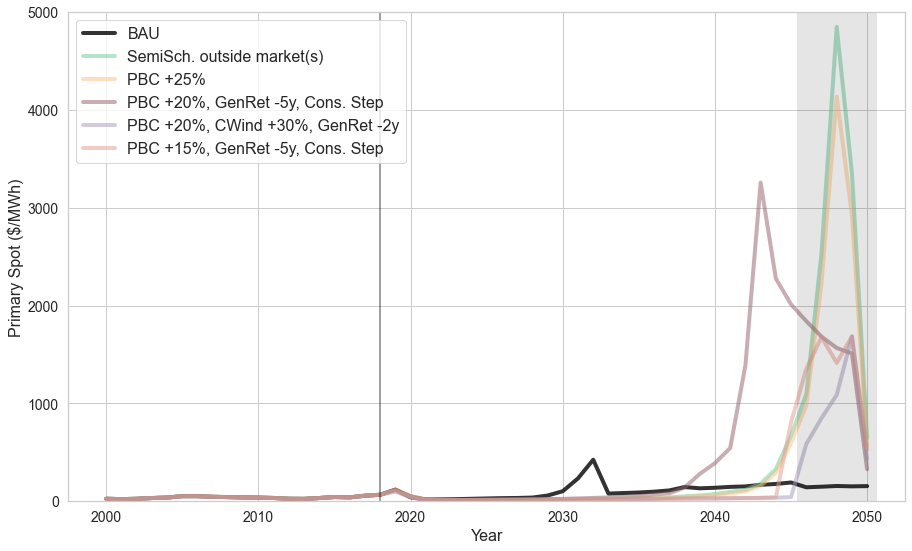

In [391]:
# Wholesale Prices
plt.figure(figsize=(15,9))
years = [DT.datetime.strptime(str(int(date)),'%Y') for date in bau_results_df['Time (Year)'].values]
years =  bau_results_df['Time (Year)'].values
plt.plot( years, bau_results_df['Primary Wholesale ($/MWh)'], color='black', alpha = 0.8, linewidth=4, label='BAU')
plt.plot( years, outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC2c1], color='#67C999', alpha = 0.5, linewidth=4, label=labelLct2_1)
plt.plot( years, outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC2c2], color='#FCC081', alpha = 0.5, linewidth=4, label=labelLct2_2)
plt.plot( years, outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC2c3], color='#925F66', alpha = 0.5, linewidth=4, label=labelLct2_3)
plt.plot( years, outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC2c4], color='#A899BA', alpha = 0.5, linewidth=4, label=labelLct2_4)
plt.plot( years, outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC2c5], color='#E39A8C', alpha = 0.5, linewidth=4, label=labelLct2_5)


val2025_1 = outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC2c1][2025 - startYear]
# plt.text(2025, val2025_1+120, f'(2025) {(val2025_1):.2f} $/MWh     ',color=colorLct2_1)
# plt.plot(2025, val2025_1, 'ro')

val2030_1 = outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC2c1][2030 - startYear]
# plt.text(2030, val2030_1+120, f'     (2030) {(val2030_1):.2f} $/MWh',color=colorLct2_1)
# plt.plot(2030, val2030_1, 'ro')

val2040_1= outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC2c1][2040 - startYear]
# plt.text(2040, val2040_1+120, f'(2040) {(val2040_1):.2f} $/MWh',color=colorLct2_1)
# plt.plot(2040, val2040_1, 'ro')

val2025_2 = outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC2c2][2025 - startYear]
# plt.text(2025, val2025_2+100, f'(2025) {(val2025_2):.2f} $/MWh     ',color=colorLct2_2)
# plt.plot(2025, val2025_2, 'ro')

val2030_2 = outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC2c2][2030 - startYear]
# plt.text(2030, val2030_2+100, f'     (2030) {(val2030_2):.2f} $/MWh',color=colorLct2_2)
# plt.plot(2030, val2030_2, 'ro')

val2040_2 = outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC2c2][2040 - startYear]
# plt.text(2040, val2040_2+100, f'(2040) {(val2040_2):.2f} $/MWh',color=colorLct2_2)
# plt.plot(2040, val2040_2, 'ro')

val2025_3 = outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC2c3][2025 - startYear]
# plt.text(2025, val2025_3+80, f'(2025) {(val2025_3):.2f} $/MWh     ',color=colorLct2_3)
# plt.plot(2025, val2025_3, 'ro')

val2030_3 = outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC2c3][2030 - startYear]
# plt.text(2030, val2030_3+80, f'     (2030) {(val2030_3):.2f} $/MWh',color=colorLct2_3)
# plt.plot(2030, val2030_3, 'ro')

val2040_3 = outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC2c3][2040 - startYear]
# plt.text(2040, val2040_3+80, f'(2040) {(val2040_3):.2f} $/MWh',color=colorLct2_3)
# plt.plot(2040, val2040_3, 'ro')


val2025_4 = outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC2c4][2025 - startYear]
# plt.text(2025, val2025_4+60, f'(2025) {(val2025_4):.2f} $/MWh     ',color=colorLct2_4)
# plt.plot(2025, val2025_4, 'bo')

val2030_4 = outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC2c4][2030 - startYear]
# plt.text(2030, val2030_4+60, f'     (2030) {(val2030_4):.2f} $/MWh',color=colorLct2_4)
# plt.plot(2030, val2030_4, 'bo')

val2040_4 = outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC2c4][2040 - startYear]
# plt.text(2040, val2040_4+60, f'(2040) {(val2040_4):.2f} $/MWh',color=colorLct2_4)
# plt.plot(2040, val2040_4, 'bo')

val2025_5 = outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC2c5][2025 - startYear]
# plt.text(2025, val2025_5+40, f'(2025) {(val2025_5):.2f} $/MWh     ',color=colorLct2_5)
# plt.plot(2025, val2025_5, 'bo')

val2030_5 = outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC2c5][2030 - startYear]
# plt.text(2030, val2030_5+40, f'    (2030) {(val2030_5):.2f} $/MWh',color=colorLct2_5)
# plt.plot(2030, val2030_5, 'bo')

val2040_5 = outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC2c5][2040 - startYear]
# plt.text(2040, val2040_5+40, f'(2040) {(val2040_5):.2f} $/MWh',color=colorLct2_5)
# plt.plot(2040, val2040_5, 'bo')

print(val2025_1, val2030_1, val2040_1)

print(val2025_2, val2030_2, val2040_2)

print(val2025_3, val2030_3, val2040_3)

print(val2025_4, val2030_4, val2040_4)

print(val2025_5, val2030_5, val2040_5)

plt.axvline(2018, ls='-',color='black', alpha = 0.5)
plt.axvline(2048, ls='-',color='black', alpha = 0.1, lw = 80)
plt.ylim([0, 5000])
#plt.grid( linestyle='-', linewidth=1)
plt.xlabel('Year', size=16)
plt.ylabel('Primary Spot ($/MWh)', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(prop={'size':16})

### Tariffs

4.811423301696777 5.101297378540039 5.812149524688722
4.560239791870117 5.60949182510376 9.973535537719728
4.738966464996338 6.459516525268555 51.54928207397461
4.379498481750488 5.01846170425415 6.432389736175537
4.375009536743163 5.080047607421875 6.249959468841553


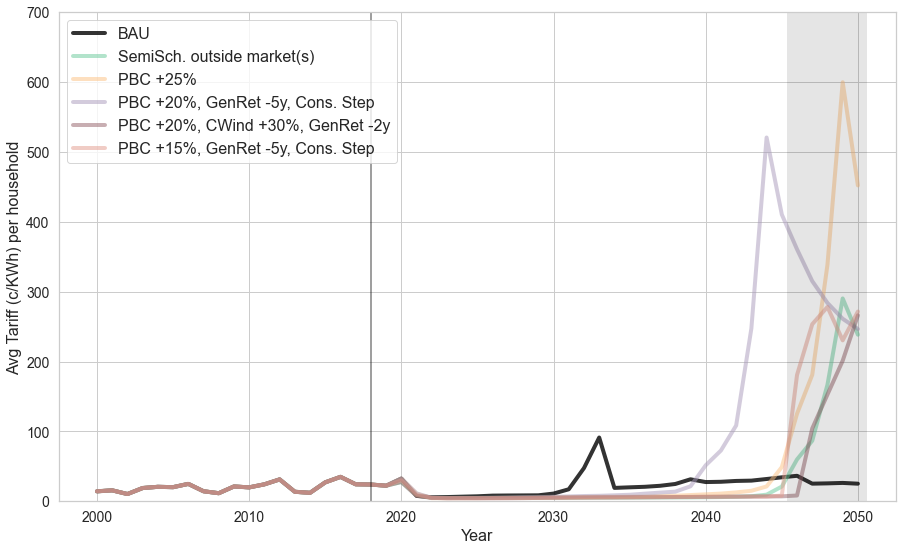

In [392]:
# Wholesale Prices
plt.figure(figsize=(15,9))
years = [DT.datetime.strptime(str(int(date)),'%Y') for date in bau_results_df['Time (Year)'].values]
years =  bau_results_df['Time (Year)'].values
plt.plot( years, bau_results_df['Avg Tariff (c/KWh) per household'], color='black', alpha = 0.8, linewidth=4, label='BAU')
plt.plot( years, outcomes_filteredLCTff['tariffsYear'][selected_indexLC2c1], color=colorLct2_1, alpha = 0.5, linewidth=4, label=labelLct2_1)
plt.plot( years, outcomes_filteredLCTff['tariffsYear'][selected_indexLC2c2], color=colorLct2_2, alpha = 0.5, linewidth=4, label=labelLct2_2)
plt.plot( years, outcomes_filteredLCTff['tariffsYear'][selected_indexLC2c3], color=colorLct2_3, alpha = 0.5, linewidth=4, label=labelLct2_3)
plt.plot( years, outcomes_filteredLCTff['tariffsYear'][selected_indexLC2c4], color=colorLct2_4, alpha = 0.5, linewidth=4, label=labelLct2_4)
plt.plot( years, outcomes_filteredLCTff['tariffsYear'][selected_indexLC2c5], color=colorLct2_5, alpha = 0.5, linewidth=4, label=labelLct2_5)

val2025_1 = outcomes_filteredLCTff['tariffsYear'][selected_indexLC2c1][2025 - startYear]
# plt.text(2025, val2025_1+120, f'(2025) {(val2025_1):.2f} $/MWh     ',color=colorLct2_1)
# plt.plot(2025, val2025_1, 'ro')

val2030_1 = outcomes_filteredLCTff['tariffsYear'][selected_indexLC2c1][2030 - startYear]
# plt.text(2030, val2030_1+120, f'     (2030) {(val2030_1):.2f} $/MWh',color=colorLct2_1)
# plt.plot(2030, val2030_1, 'ro')

val2040_1= outcomes_filteredLCTff['tariffsYear'][selected_indexLC2c1][2040 - startYear]
# plt.text(2040, val2040_1+120, f'(2040) {(val2040_1):.2f} $/MWh',color=colorLct2_1)
# plt.plot(2040, val2040_1, 'ro')

val2025_2 = outcomes_filteredLCTff['tariffsYear'][selected_indexLC2c2][2025 - startYear]
# plt.text(2025, val2025_2+100, f'(2025) {(val2025_2):.2f} $/MWh     ',color=colorLct2_2)
# plt.plot(2025, val2025_2, 'ro')

val2030_2 = outcomes_filteredLCTff['tariffsYear'][selected_indexLC2c2][2030 - startYear]
# plt.text(2030, val2030_2+100, f'     (2030) {(val2030_2):.2f} $/MWh',color=colorLct2_2)
# plt.plot(2030, val2030_2, 'ro')

val2040_2 = outcomes_filteredLCTff['tariffsYear'][selected_indexLC2c2][2040 - startYear]
# plt.text(2040, val2040_2+100, f'(2040) {(val2040_2):.2f} $/MWh',color=colorLct2_2)
# plt.plot(2040, val2040_2, 'ro')

val2025_3 = outcomes_filteredLCTff['tariffsYear'][selected_indexLC2c3][2025 - startYear]
# plt.text(2025, val2025_3+80, f'(2025) {(val2025_3):.2f} $/MWh     ',color=colorLct2_3)
# plt.plot(2025, val2025_3, 'ro')

val2030_3 = outcomes_filteredLCTff['tariffsYear'][selected_indexLC2c3][2030 - startYear]
# plt.text(2030, val2030_3+80, f'     (2030) {(val2030_3):.2f} $/MWh',color=colorLct2_3)
# plt.plot(2030, val2030_3, 'ro')

val2040_3 = outcomes_filteredLCTff['tariffsYear'][selected_indexLC2c3][2040 - startYear]
# plt.text(2040, val2040_3+80, f'(2040) {(val2040_3):.2f} $/MWh',color=colorLct2_3)
# plt.plot(2040, val2040_3, 'ro')


val2025_4 = outcomes_filteredLCTff['tariffsYear'][selected_indexLC2c4][2025 - startYear]
# plt.text(2025, val2025_4+60, f'(2025) {(val2025_4):.2f} $/MWh     ',color=colorLct2_4)
# plt.plot(2025, val2025_4, 'bo')

val2030_4 = outcomes_filteredLCTff['tariffsYear'][selected_indexLC2c4][2030 - startYear]
# plt.text(2030, val2030_4+60, f'     (2030) {(val2030_4):.2f} $/MWh',color=colorLct2_4)
# plt.plot(2030, val2030_4, 'bo')

val2040_4 = outcomes_filteredLCTff['tariffsYear'][selected_indexLC2c4][2040 - startYear]
# plt.text(2040, val2040_4+60, f'(2040) {(val2040_4):.2f} $/MWh',color=colorLct2_4)
# plt.plot(2040, val2040_4, 'bo')

val2025_5 = outcomes_filteredLCTff['tariffsYear'][selected_indexLC2c5][2025 - startYear]
# plt.text(2025, val2025_5+40, f'(2025) {(val2025_5):.2f} $/MWh     ',color=colorLct2_5)
# plt.plot(2025, val2025_5, 'bo')

val2030_5 = outcomes_filteredLCTff['tariffsYear'][selected_indexLC2c5][2030 - startYear]
# plt.text(2030, val2030_5+40, f'    (2030) {(val2030_5):.2f} $/MWh',color=colorLct2_5)
# plt.plot(2030, val2030_5, 'bo')

val2040_5 = outcomes_filteredLCTff['tariffsYear'][selected_indexLC2c5][2040 - startYear]
# plt.text(2040, val2040_5+40, f'(2040) {(val2040_5):.2f} $/MWh',color=colorLct2_5)
# plt.plot(2040, val2040_5, 'bo')

print(val2025_1, val2030_1, val2040_1)

print(val2025_2, val2030_2, val2040_2)

print(val2025_3, val2030_3, val2040_3)

print(val2025_4, val2030_4, val2040_4)

print(val2025_5, val2030_5, val2040_5)

plt.axvline(2018, ls='-',color='black', alpha = 0.5)
plt.axvline(2048, ls='-',color='black', alpha = 0.1, lw = 80)
plt.ylim([0, 700])
#plt.grid( linestyle='-', linewidth=1)
plt.xlabel('Year', size=16)
plt.ylabel('Avg Tariff (c/KWh) per household', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(prop={'size':16})

### LIHC

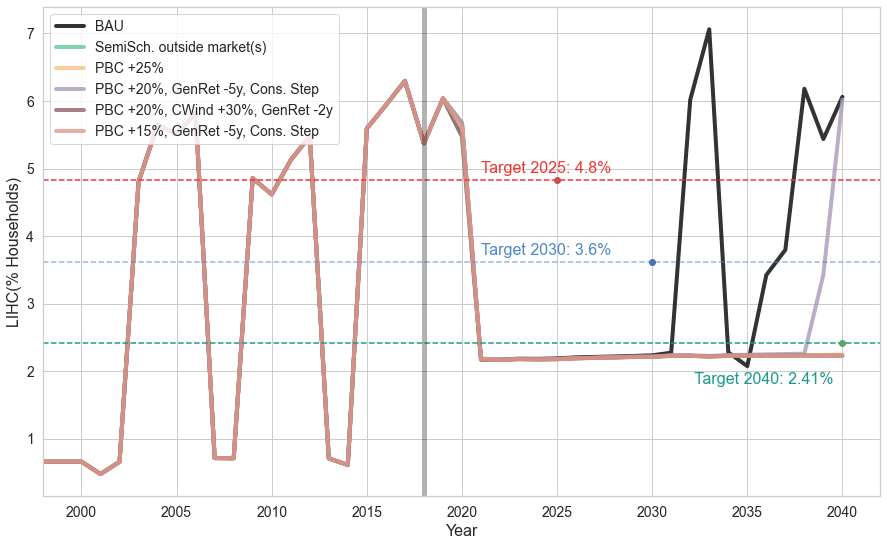

In [393]:
plt.figure(figsize=(15,9))
years = ev_results_BAU_df.T.index.values

plt.plot( years[:-10], ev_results_BAU_df.values[0][:-10] * 100, color='black', alpha = 0.8, linewidth=4, label='BAU')
plt.plot( years[:-10], ev_results_LCT_df.iloc[selected_indexLC2c1].values[:-10] * 100, color=colorLct2_1, alpha = 0.8, linewidth=4, label=labelLct2_1)
plt.plot( years[:-10], ev_results_LCT_df.iloc[selected_indexLC2c2].values[:-10] * 100, color=colorLct2_2, alpha = 0.8, linewidth=4, label=labelLct2_2)
plt.plot( years[:-10], ev_results_LCT_df.iloc[selected_indexLC2c3].values[:-10] * 100, color=colorLct2_3, alpha = 0.8, linewidth=4, label=labelLct2_3)
plt.plot( years[:-10], ev_results_LCT_df.iloc[selected_indexLC2c4].values[:-10] * 100, color=colorLct2_4, alpha = 0.8, linewidth=4, label=labelLct2_4)
plt.plot( years[:-10], ev_results_LCT_df.iloc[selected_indexLC2c5].values[:-10] * 100, color=colorLct2_5, alpha = 0.8, linewidth=4, label=labelLct2_5)

# Add dot and corresponding text

ooi = 'Energy Vulnerability Percentage'    

referenceYear = 2019
reference = ev_results_BAU_df[referenceYear].values * 100
reduction = 0.2

plt.axhline((reference - (reference * reduction)), ls='--',color='#f23535', alpha = 1)

plt.text(years[23], reference - (reference * reduction)+.1, f'Target 2025: {((reference - (reference * reduction))[0]):.1f}%',color='#f23535', size =16)
plt.plot(2025, (reference - (reference * reduction)), 'ro')

reduction = 0.4

plt.axhline((reference - (reference * reduction)), ls='--',color='#4e88cb', alpha = 0.6)

plt.text(years[23], reference - (reference * reduction)+.1, f'Target 2030: {((reference - (reference * reduction))[0]):.1f}%',color='#4e88cb', size=16)
plt.plot(2030, (reference - (reference * reduction)), 'bo')

reduction = 0.6
# ({reduction*100}%)
plt.axhline((reference - (reference * reduction)) ,ls='--',color='#1b9a8c', alpha = 1)
plt.text(years[34], reference - (reference * reduction)-.6, f' Target 2040: {((reference - (reference * reduction))[0]):.2f}%',color='#1b9a8c', size=16)
plt.plot(2040, (reference - (reference * reduction)), 'go')

plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.1, lw = 80)

plt.xlim([1998, 2042])
plt.xlabel('Year', size=16)
plt.ylabel('LIHC(% Households)', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(prop={'size':14}, loc='upper left')

## Policy mixes LCT 1.5

- consumption [0. 1. 2. 3.]
- includePublicallyAnnouncedGen [0. 1.]
- generatorRetirement [-5, -3, -2, -1, 0, 1]
- nameplateCapacityChangeWind [-20, 0, 15, 20, 30, 50]
- priceChangePercentageBrownCoal [-10, 0, 15, 20, 25, 35]
- priceChangePercentageWind [-50, -20, -10, 0, 10, 40]
- semiScheduleGenSpotMarket [ 8.  9. 10.]
- generatorRetirement [-5. -4. -2. -1.  1.  2.]

Length: 31104
model [Gr4sp]
Categories (1, object): [Gr4sp]

In [394]:
# # Test run
# #test = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/csv/LCTVIC/LCTVICSimDataYearSummary_seed_1629628643423.csv')
# #test = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/VICBAUserver.csv')

# """ Converts household data in tCO2e into total residential data in MtCO2e"""
# test_GHG_residential = (test['GHG Emissions (tCO2-e) per household'] * test['Number of Domestic Consumers (households)']) / 1000000.0

# """ Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
# test_GHG_total =test_GHG_residential / 0.3

# """Overwrite GHG with the data of interest"""
# test['GHGYear'] = test_GHG_total

# test_primary = test['System Production Primary Spot']
# test_unmetPrimary = test['Primary Total Unmet Demand (MWh)']
# test_off = test['System Production Off Spot']

# test_consumptionPrimary = test_primary + test_unmetPrimary + test_off
# test_percentageUnmetPrimary = (test_unmetPrimary/test_consumptionPrimary)*100
# test_where_are_NaNs = np.isnan(test_percentageUnmetPrimary)
# test_percentageUnmetPrimary[test_where_are_NaNs] = 0
# test['unmetPercentageConsumptionPrimary'] = test_percentageUnmetPrimary

In [395]:
#         0: 'Central',
#         1: 'Slow change',
#         2: 'Step change',
#         3: 'Fast change',
#         4: 'High DER',
#         5: 'residential',
#         6: 'business',
#         7: 'both',
#         8: 'primary',
#         9: 'secondary',
#         10: 'none'
selected_index_BAU = filter_ff(consumption = 0, 
                           generatorRetirement = 0, 
                           includePublicallyAnnouncedGen = 1,
                           nameplateCapacityChangeWind = 0,
                           priceChangePercentageBrownCoal = 0,
                           semiScheduleGenSpotMarket = 8,
                           priceChangePercentageWind = 0)

selected_indexLC1_5c1 = filter_ff(consumption = 0, 
                           generatorRetirement = 0, 
                           includePublicallyAnnouncedGen = 1,
                           nameplateCapacityChangeWind = 0,
                           priceChangePercentageBrownCoal = 0,
                           semiScheduleGenSpotMarket = 10,
                           priceChangePercentageWind = 0)

selected_indexLC1_5c2 = filter_ff(consumption = 0, 
                           generatorRetirement = 0, 
                           includePublicallyAnnouncedGen = 1,
                           nameplateCapacityChangeWind = 0,
                           priceChangePercentageBrownCoal = 25,
                           semiScheduleGenSpotMarket = 8,
                           priceChangePercentageWind = 0)

# incPA True, PBC 20%, CWind 30%, consumption 'Slow', GenRet 0

selected_indexLC1_5c3 = filter_ff(consumption = 2, 
                           generatorRetirement = 0, 
                           includePublicallyAnnouncedGen = 1,
                           nameplateCapacityChangeWind = 15,
                           priceChangePercentageBrownCoal = 15,
                           semiScheduleGenSpotMarket = 8,
                           priceChangePercentageWind = -10)

# incPA True, PW -10%, PBC +15%, GenRet 0, consumption `Central'
selected_indexLC1_5c4 = filter_ff(consumption = 0, 
                           generatorRetirement = 0, 
                           includePublicallyAnnouncedGen = 1,
                           nameplateCapacityChangeWind = 0,
                           priceChangePercentageBrownCoal = 15,
                           semiScheduleGenSpotMarket = 8,
                           priceChangePercentageWind = -10)

selected_indexLC1_5c5 = filter_ff(consumption = 0, 
                           generatorRetirement = 0, 
                           includePublicallyAnnouncedGen = 1,
                           nameplateCapacityChangeWind = 0,
                           priceChangePercentageBrownCoal = 0,
                           semiScheduleGenSpotMarket = 8,
                           priceChangePercentageWind = -20)

(array([False,  True]), array([31103,     1], dtype=int64))
      consumption generatorRetirement  includePublicallyAnnouncedGen  \
5967          0.0                   0                            1.0   

     nameplateCapacityChangeWind priceChangePercentageBrownCoal  \
5967                           0                              0   

     priceChangePercentageWind  semiScheduleGenSpotMarket scenario policy  \
5967                         0                        8.0     5967   None   

      model  
5967  Gr4sp  
(array([False,  True]), array([31103,     1], dtype=int64))
      consumption generatorRetirement  includePublicallyAnnouncedGen  \
5969          0.0                   0                            1.0   

     nameplateCapacityChangeWind priceChangePercentageBrownCoal  \
5969                           0                              0   

     priceChangePercentageWind  semiScheduleGenSpotMarket scenario policy  \
5969                         0                       10.0   

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

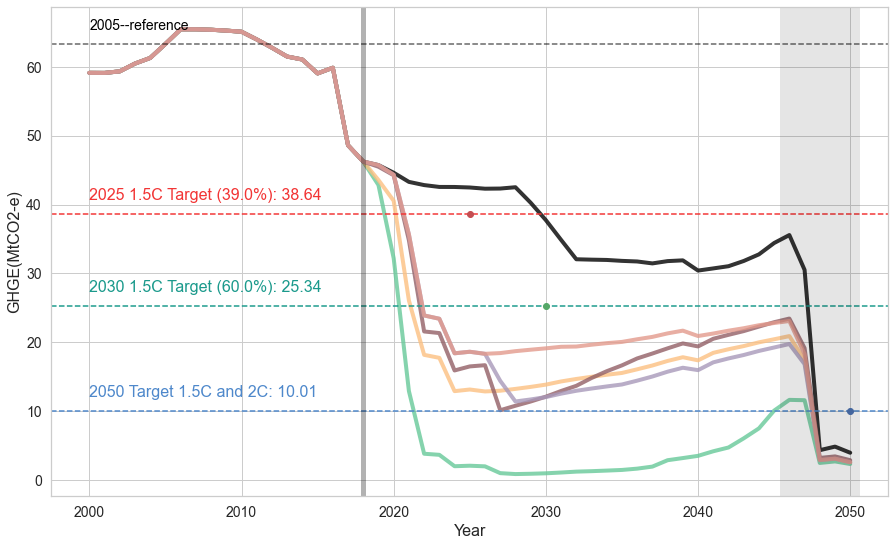

In [396]:
# Figures combinations from box 4 best cases PRIM. Include publically annonced in true and generation retirement changes from 2 to -5.
labelLct15_1 = 'SemiSch. outside market(s)'
labelLct15_2 = 'PBC +25%'
labelLct15_3 = 'PBC +15%, CWind +15%, PW -10%'
labelLct15_4 = 'PBC +15%, PW -10%'
labelLct15_5 = 'PW -20%'

colorLct15_1 = '#67C999'
colorLct15_2 = '#FCC081'
colorLct15_3 = '#925F66'
colorLct15_4 = '#A899BA'
colorLct15_5 = '#E39A8C'

plt.figure(figsize=(15,9))
years = [DT.datetime.strptime(str(int(date)),'%Y') for date in bau_results_df['Time (Year)'].values]
years =  bau_results_df['Time (Year)'].values

#plt.plot(years, outcomesBAUTEST['GHGYear'][0], color = 'red', alpha = 0.8, linewidth=4, label='BAUTESTpycharm' )

plt.plot(years, bau_results_df['GHGYear'], color = 'black', alpha = 0.8, linewidth=4, label='BAU' )
plt.plot( years, outcomes_filteredLCTff['GHGYear'][selected_indexLC1_5c1], color=colorLct15_1, alpha = 0.8, linewidth=4, label=labelLct15_1)
plt.plot( years, outcomes_filteredLCTff['GHGYear'][selected_indexLC1_5c2], color=colorLct15_2, alpha = 0.8, linewidth=4, label=labelLct15_2)
plt.plot( years, outcomes_filteredLCTff['GHGYear'][selected_indexLC1_5c3], color=colorLct15_3, alpha = 0.8, linewidth=4, label=labelLct15_3)
plt.plot( years, outcomes_filteredLCTff['GHGYear'][selected_indexLC1_5c4], color=colorLct15_4 ,alpha = 0.8, linewidth=4, label=labelLct15_4)
plt.plot( years, outcomes_filteredLCTff['GHGYear'][selected_indexLC1_5c5], color=colorLct15_5, alpha = 0.8, linewidth=4, label=labelLct15_5)

#plt.plot( years, outcomes_filteredLCTff['GHGYear'][selected_index_BAU], color='green', alpha = 0.8, linewidth=4, label='TEST_FF')
#plt.plot(years, test['GHGYear'], color = 'blue', label = 'SERVER BAU')
# Add dot and corresponding text
reference = bau_results_df[bau_results_df['Time (Year)'] == 2005]['GHGYear'].values

reduction = 0.39

plt.axhline((reference - (reference * reduction)), ls='--',color='#f23535', alpha = 1)

plt.text(years[0], reference - (reference * reduction)+2, f'2025 1.5C Target ({reduction*100}%): {((reference - (reference * reduction))[0]):.2f}',color='#f23535', size =16)
plt.plot(2025, (reference - (reference * reduction)), 'ro')

reduction = 0.60

plt.axhline((reference - (reference * reduction)) ,ls='--',color='#1b9a8c', alpha = 1)
plt.text(years[0], reference - (reference * reduction)+2, f'2030 1.5C Target ({reduction*100}%): {((reference - (reference * reduction))[0]):.2f}',color='#1b9a8c', size =16)
plt.plot(2030, (reference - (reference * reduction)), 'go')

reduction = 0.842

plt.axhline((reference - (reference * reduction)) ,ls='--',color='#4e88cb', alpha = 1)
plt.text(years[0], reference - (reference * reduction)+2, f'2050 Target 1.5C and 2C: {((reference - (reference * reduction))[0]):.2f}',color='#4e88cb', size =16)
plt.plot(2050, (reference - (reference * reduction)), 'bo')

plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.1, lw = 80)

plt.axhline((reference),ls='--',color='black', alpha = 0.6)
plt.text(years[0], reference+2, f'2005--reference',color='black', size = 14)

#plt.grid( linestyle='-', linewidth=1)
plt.xlabel('Year', size=16)
plt.ylabel('GHGE(MtCO2-e)', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
#plt.legend(prop={'size':16}, loc='upper right')

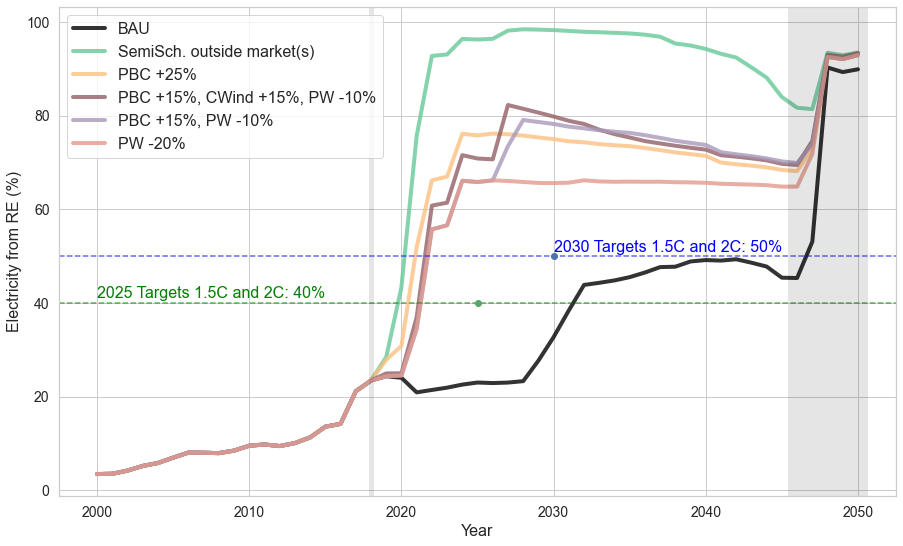

In [397]:
plt.figure(figsize=(15,9))

plt.plot( years, bau_results_df['Percentage Renewable Production']*100, color='black', alpha = 0.8, linewidth=4, label='BAU')
plt.plot( years, outcomes_filteredLCTff['renewableContributionYear'][selected_indexLC1_5c1]*100, color=colorLct15_1, alpha = 0.8, linewidth=4, label=labelLct15_1)
plt.plot( years, outcomes_filteredLCTff['renewableContributionYear'][selected_indexLC1_5c2]*100, color=colorLct15_2, alpha = 0.8, linewidth=4, label=labelLct15_2)
plt.plot( years, outcomes_filteredLCTff['renewableContributionYear'][selected_indexLC1_5c3]*100, color=colorLct15_3, alpha = 0.8, linewidth=4, label=labelLct15_3)
plt.plot( years,outcomes_filteredLCTff['renewableContributionYear'][selected_indexLC1_5c4]*100, color=colorLct15_4, alpha = 0.8, linewidth=4, label=labelLct15_4)
plt.plot( years, outcomes_filteredLCTff['renewableContributionYear'][selected_indexLC1_5c5]*100, color=colorLct15_5, alpha = 0.8, linewidth=4, label=labelLct15_5)

#plt.plot( years, test['Percentage Renewable Production']*100, color='green', alpha = 0.8, linewidth=4, label='TEST')
# Add dot and corresponding text

target = 40

plt.axhline(  target ,ls='--',color='green', alpha = 0.6)
plt.text(years[0], target+1, f'2025 Targets 1.5C and 2C: {target:.0f}%',color='green', size =16)
plt.plot(2025, target, 'go')

target = 50
plt.axhline(  target ,ls='--',color='blue', alpha = 0.6)
plt.text(years[30], target+1, f'2030 Targets 1.5C and 2C: {target:.0f}%',color='blue', size =16)
plt.plot(2030, target, 'bo')
plt.axvline(2018, ls='-',color='black', alpha = 0.1, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.1, lw = 80)


#plt.grid( linestyle='-', linewidth=1)
plt.xlabel('Year', size=16)
plt.ylabel('Electricity from RE (%)', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(prop={'size':16})

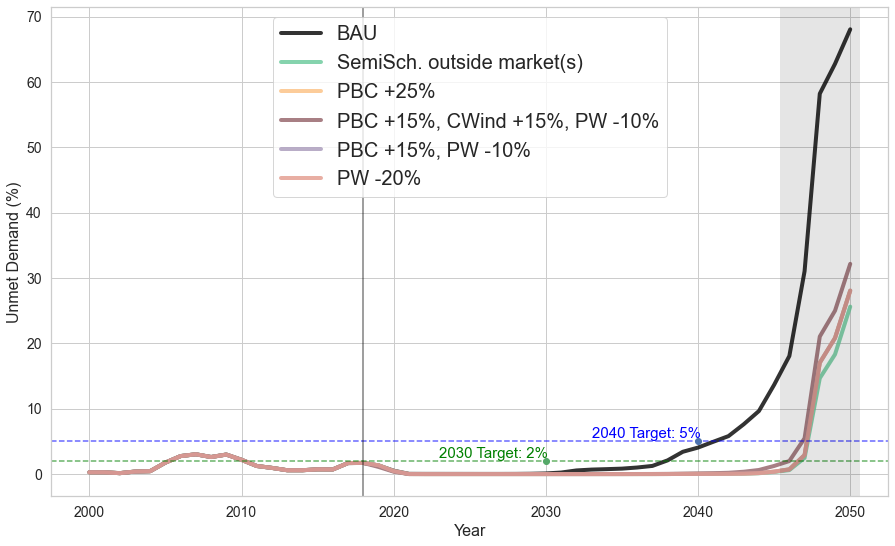

In [398]:
plt.figure(figsize=(15,9))

plt.plot( years, bau_results_df['unmetPercentageConsumptionPrimary'], color='black', alpha = 0.8, linewidth=4, label='BAU')

plt.plot( years, outcomes_filteredLCTff['unmetPercentageConsumptionPrimary'][selected_indexLC1_5c1], color=colorLct15_1, alpha = 0.8, linewidth=4, label=labelLct15_1)
plt.plot( years, outcomes_filteredLCTff['unmetPercentageConsumptionPrimary'][selected_indexLC1_5c2], color=colorLct15_2, alpha = 0.8, linewidth=4, label=labelLct15_2)
plt.plot( years, outcomes_filteredLCTff['unmetPercentageConsumptionPrimary'][selected_indexLC1_5c3], color=colorLct15_3, alpha = 0.8, linewidth=4, label=labelLct15_3)
plt.plot( years, outcomes_filteredLCTff['unmetPercentageConsumptionPrimary'][selected_indexLC1_5c4], color=colorLct15_4, alpha = 0.8, linewidth=4, label=labelLct15_4)
plt.plot( years, outcomes_filteredLCTff['unmetPercentageConsumptionPrimary'][selected_indexLC1_5c5], color=colorLct15_5, alpha = 0.8, linewidth=4, label=labelLct15_5)



# Add dot and corresponding text

target = 2

plt.axhline(  target ,ls='--',color='green', alpha = 0.6)
plt.text(years[23], target+0.5, f'2030 Target: {target:.0f}%',color='green', size =15)
plt.plot(2030, target, 'go')

target = 5
plt.axhline(  target ,ls='--',color='blue', alpha = 0.6)
plt.text(years[33], target+0.5, f'2040 Target: {target:.0f}%',color='blue', size =15)
plt.plot(2040, target, 'bo')
plt.axvline(2018, ls='-',color='black', alpha = 0.5)
plt.axvline(2048, ls='-',color='black', alpha = 0.1, lw = 80)


#plt.grid( linestyle='-', linewidth=1)
plt.xlabel('Year', size=16)
plt.ylabel('Unmet Demand (%)', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(prop={'size':20}, loc='upper center')

## Other outputs from the selected LCT

### Wholesale prices

8.641016403834023 12.762356281280518 73.79357957839966
15.147973457972206 21.272219498952232 64.12690544128418
13.362446864446008 18.63036966323852 145.00761906305945
13.288055658340454 18.287593364715573 60.62623977661133
11.573899348576866 15.336574951807654 54.62990379333496


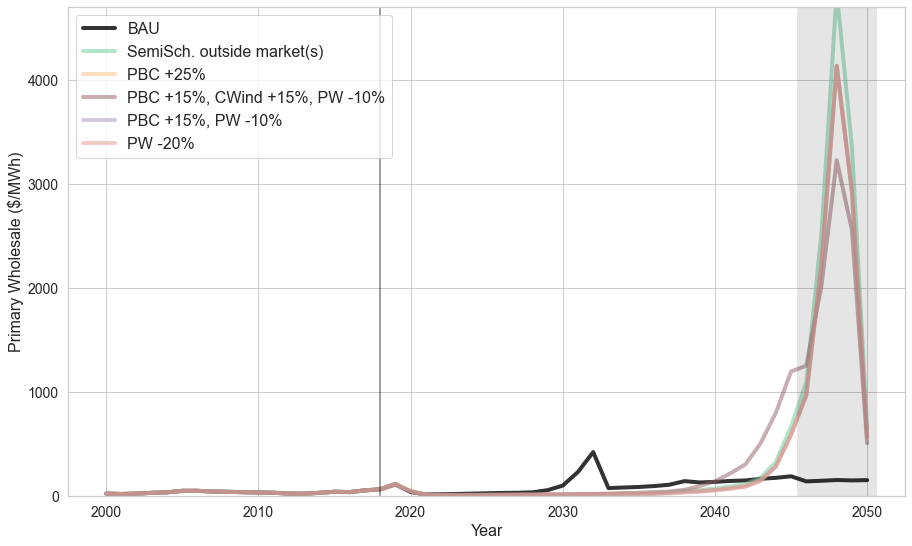

In [399]:
# Wholesale Prices
plt.figure(figsize=(15,9))
years = [DT.datetime.strptime(str(int(date)),'%Y') for date in bau_results_df['Time (Year)'].values]
years =  bau_results_df['Time (Year)'].values
plt.plot( years, bau_results_df['Primary Wholesale ($/MWh)'], color='black', alpha = 0.8, linewidth=4, label='BAU')
plt.plot( years, outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC1_5c1], color=colorLct15_1, alpha = 0.5, linewidth=4, label=labelLct15_1)
plt.plot( years, outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC1_5c2], color=colorLct15_2, alpha = 0.5, linewidth=4, label=labelLct15_2)
plt.plot( years, outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC1_5c3], color=colorLct15_3, alpha = 0.5, linewidth=4, label=labelLct15_3)
plt.plot( years, outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC1_5c4], color=colorLct15_4, alpha = 0.5, linewidth=4, label=labelLct15_4)
plt.plot( years, outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC1_5c5], color=colorLct15_5, alpha = 0.5, linewidth=4, label=labelLct15_5)

val2025_1 = outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC1_5c1][2025 - startYear]
# plt.text(2025, val2025_1+120, f'(2025) {(val2025_1):.2f} $/MWh     ',color=colorLct2_1)
# plt.plot(2025, val2025_1, 'ro')

val2030_1 = outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC1_5c1][2030 - startYear]
# plt.text(2030, val2030_1+120, f'     (2030) {(val2030_1):.2f} $/MWh',color=colorLct2_1)
# plt.plot(2030, val2030_1, 'ro')

val2040_1= outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC1_5c1][2040 - startYear]
# plt.text(2040, val2040_1+120, f'(2040) {(val2040_1):.2f} $/MWh',color=colorLct2_1)
# plt.plot(2040, val2040_1, 'ro')

val2025_2 = outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC1_5c2][2025 - startYear]
# plt.text(2025, val2025_2+100, f'(2025) {(val2025_2):.2f} $/MWh     ',color=colorLct2_2)
# plt.plot(2025, val2025_2, 'ro')

val2030_2 = outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC1_5c2][2030 - startYear]
# plt.text(2030, val2030_2+100, f'     (2030) {(val2030_2):.2f} $/MWh',color=colorLct2_2)
# plt.plot(2030, val2030_2, 'ro')

val2040_2 = outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC1_5c2][2040 - startYear]
# plt.text(2040, val2040_2+100, f'(2040) {(val2040_2):.2f} $/MWh',color=colorLct2_2)
# plt.plot(2040, val2040_2, 'ro')

val2025_3 = outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC1_5c3][2025 - startYear]
# plt.text(2025, val2025_3+80, f'(2025) {(val2025_3):.2f} $/MWh     ',color=colorLct2_3)
# plt.plot(2025, val2025_3, 'ro')

val2030_3 = outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC1_5c3][2030 - startYear]
# plt.text(2030, val2030_3+80, f'     (2030) {(val2030_3):.2f} $/MWh',color=colorLct2_3)
# plt.plot(2030, val2030_3, 'ro')

val2040_3 = outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC1_5c3][2040 - startYear]
# plt.text(2040, val2040_3+80, f'(2040) {(val2040_3):.2f} $/MWh',color=colorLct2_3)
# plt.plot(2040, val2040_3, 'ro')


val2025_4 = outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC1_5c4][2025 - startYear]
# plt.text(2025, val2025_4+60, f'(2025) {(val2025_4):.2f} $/MWh     ',color=colorLct2_4)
# plt.plot(2025, val2025_4, 'bo')

val2030_4 = outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC1_5c4][2030 - startYear]
# plt.text(2030, val2030_4+60, f'     (2030) {(val2030_4):.2f} $/MWh',color=colorLct2_4)
# plt.plot(2030, val2030_4, 'bo')

val2040_4 = outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC1_5c4][2040 - startYear]
# plt.text(2040, val2040_4+60, f'(2040) {(val2040_4):.2f} $/MWh',color=colorLct2_4)
# plt.plot(2040, val2040_4, 'bo')

val2025_5 = outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC1_5c5][2025 - startYear]
# plt.text(2025, val2025_5+40, f'(2025) {(val2025_5):.2f} $/MWh     ',color=colorLct2_5)
# plt.plot(2025, val2025_5, 'bo')

val2030_5 = outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC1_5c5][2030 - startYear]
# plt.text(2030, val2030_5+40, f'    (2030) {(val2030_5):.2f} $/MWh',color=colorLct2_5)
# plt.plot(2030, val2030_5, 'bo')

val2040_5 = outcomes_filteredLCTff['primaryWholesalePriceYear'][selected_indexLC1_5c5][2040 - startYear]
# plt.text(2040, val2040_5+40, f'(2040) {(val2040_5):.2f} $/MWh',color=colorLct2_5)
# plt.plot(2040, val2040_5, 'bo')

print(val2025_1, val2030_1, val2040_1)

print(val2025_2, val2030_2, val2040_2)

print(val2025_3, val2030_3, val2040_3)

print(val2025_4, val2030_4, val2040_4)

print(val2025_5, val2030_5, val2040_5)


plt.axvline(2018, ls='-',color='black', alpha = 0.5)
plt.axvline(2048, ls='-',color='black', alpha = 0.1, lw = 80)
plt.ylim([0, 4700])
#plt.grid( linestyle='-', linewidth=1)
plt.xlabel('Year', size=16)
plt.ylabel('Primary Wholesale (\$/MWh)', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(prop={'size':16})

### Tariffs

4.811423301696777 5.101297378540039 5.812149524688722
4.560239791870117 5.60949182510376 9.973535537719728
4.124744892120361 4.937454700469972 15.052196502685549
4.129705905914307 4.87465763092041 9.24257469177246
3.649305820465088 4.1676082611083975 8.03892993927002


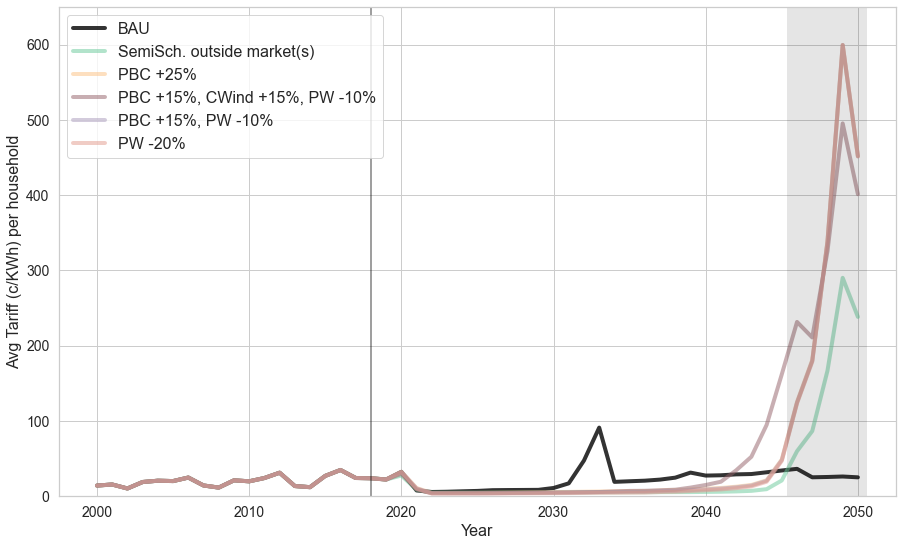

In [400]:
# Tariffs
plt.figure(figsize=(15,9))
years = [DT.datetime.strptime(str(int(date)),'%Y') for date in bau_results_df['Time (Year)'].values]
years =  bau_results_df['Time (Year)'].values
plt.plot( years, bau_results_df['Avg Tariff (c/KWh) per household'], color='black', alpha = 0.8, linewidth=4, label='BAU')
plt.plot( years, outcomes_filteredLCTff['tariffsYear'][selected_indexLC1_5c1], color=colorLct15_1, alpha = 0.5, linewidth=4, label=labelLct15_1)
plt.plot( years, outcomes_filteredLCTff['tariffsYear'][selected_indexLC1_5c2], color=colorLct15_2, alpha = 0.5, linewidth=4, label=labelLct15_2)
plt.plot( years, outcomes_filteredLCTff['tariffsYear'][selected_indexLC1_5c3], color=colorLct15_3, alpha = 0.5, linewidth=4, label=labelLct15_3)
plt.plot( years, outcomes_filteredLCTff['tariffsYear'][selected_indexLC1_5c4], color=colorLct15_4, alpha = 0.5, linewidth=4, label=labelLct15_4)
plt.plot( years, outcomes_filteredLCTff['tariffsYear'][selected_indexLC1_5c5], color=colorLct15_5, alpha = 0.5, linewidth=4, label=labelLct15_5)

val2025_1 = outcomes_filteredLCTff['tariffsYear'][selected_indexLC1_5c1][2025 - startYear]
# plt.text(2025, val2025_1+120, f'(2025) {(val2025_1):.2f} $/MWh     ',color=colorLct2_1)
# plt.plot(2025, val2025_1, 'ro')

val2030_1 = outcomes_filteredLCTff['tariffsYear'][selected_indexLC1_5c1][2030 - startYear]
# plt.text(2030, val2030_1+120, f'     (2030) {(val2030_1):.2f} $/MWh',color=colorLct2_1)
# plt.plot(2030, val2030_1, 'ro')

val2040_1= outcomes_filteredLCTff['tariffsYear'][selected_indexLC1_5c1][2040 - startYear]
# plt.text(2040, val2040_1+120, f'(2040) {(val2040_1):.2f} $/MWh',color=colorLct2_1)
# plt.plot(2040, val2040_1, 'ro')

val2025_2 = outcomes_filteredLCTff['tariffsYear'][selected_indexLC1_5c2][2025 - startYear]
# plt.text(2025, val2025_2+100, f'(2025) {(val2025_2):.2f} $/MWh     ',color=colorLct2_2)
# plt.plot(2025, val2025_2, 'ro')

val2030_2 = outcomes_filteredLCTff['tariffsYear'][selected_indexLC1_5c2][2030 - startYear]
# plt.text(2030, val2030_2+100, f'     (2030) {(val2030_2):.2f} $/MWh',color=colorLct2_2)
# plt.plot(2030, val2030_2, 'ro')

val2040_2 = outcomes_filteredLCTff['tariffsYear'][selected_indexLC1_5c2][2040 - startYear]
# plt.text(2040, val2040_2+100, f'(2040) {(val2040_2):.2f} $/MWh',color=colorLct2_2)
# plt.plot(2040, val2040_2, 'ro')

val2025_3 = outcomes_filteredLCTff['tariffsYear'][selected_indexLC1_5c3][2025 - startYear]
# plt.text(2025, val2025_3+80, f'(2025) {(val2025_3):.2f} $/MWh     ',color=colorLct2_3)
# plt.plot(2025, val2025_3, 'ro')

val2030_3 = outcomes_filteredLCTff['tariffsYear'][selected_indexLC1_5c3][2030 - startYear]
# plt.text(2030, val2030_3+80, f'     (2030) {(val2030_3):.2f} $/MWh',color=colorLct2_3)
# plt.plot(2030, val2030_3, 'ro')

val2040_3 = outcomes_filteredLCTff['tariffsYear'][selected_indexLC1_5c3][2040 - startYear]
# plt.text(2040, val2040_3+80, f'(2040) {(val2040_3):.2f} $/MWh',color=colorLct2_3)
# plt.plot(2040, val2040_3, 'ro')


val2025_4 = outcomes_filteredLCTff['tariffsYear'][selected_indexLC1_5c4][2025 - startYear]
# plt.text(2025, val2025_4+60, f'(2025) {(val2025_4):.2f} $/MWh     ',color=colorLct2_4)
# plt.plot(2025, val2025_4, 'bo')

val2030_4 = outcomes_filteredLCTff['tariffsYear'][selected_indexLC1_5c4][2030 - startYear]
# plt.text(2030, val2030_4+60, f'     (2030) {(val2030_4):.2f} $/MWh',color=colorLct2_4)
# plt.plot(2030, val2030_4, 'bo')

val2040_4 = outcomes_filteredLCTff['tariffsYear'][selected_indexLC1_5c4][2040 - startYear]
# plt.text(2040, val2040_4+60, f'(2040) {(val2040_4):.2f} $/MWh',color=colorLct2_4)
# plt.plot(2040, val2040_4, 'bo')

val2025_5 = outcomes_filteredLCTff['tariffsYear'][selected_indexLC1_5c5][2025 - startYear]
# plt.text(2025, val2025_5+40, f'(2025) {(val2025_5):.2f} $/MWh     ',color=colorLct2_5)
# plt.plot(2025, val2025_5, 'bo')

val2030_5 = outcomes_filteredLCTff['tariffsYear'][selected_indexLC1_5c5][2030 - startYear]
# plt.text(2030, val2030_5+40, f'    (2030) {(val2030_5):.2f} $/MWh',color=colorLct2_5)
# plt.plot(2030, val2030_5, 'bo')

val2040_5 = outcomes_filteredLCTff['tariffsYear'][selected_indexLC1_5c5][2040 - startYear]
# plt.text(2040, val2040_5+40, f'(2040) {(val2040_5):.2f} $/MWh',color=colorLct2_5)
# plt.plot(2040, val2040_5, 'bo')

print(val2025_1, val2030_1, val2040_1)

print(val2025_2, val2030_2, val2040_2)

print(val2025_3, val2030_3, val2040_3)

print(val2025_4, val2030_4, val2040_4)

print(val2025_5, val2030_5, val2040_5)

plt.axvline(2018, ls='-',color='black', alpha = 0.5)
plt.axvline(2048, ls='-',color='black', alpha = 0.1, lw = 80)
plt.ylim([0, 650])
#plt.grid( linestyle='-', linewidth=1)
plt.xlabel('Year', size=16)
plt.ylabel('Avg Tariff (c/KWh) per household', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(prop={'size':16})

### LIHC

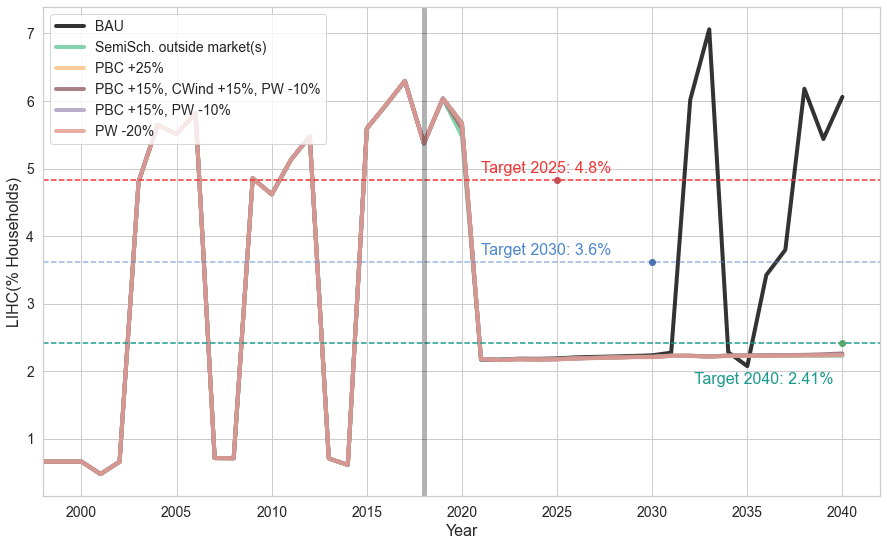

In [401]:
plt.figure(figsize=(15,9))
years = ev_results_BAU_df.T.index.values

plt.plot( years[:-10], ev_results_BAU_df.values[0][:-10] * 100, color='black', alpha = 0.8, linewidth=4, label='BAU')
plt.plot( years[:-10], ev_results_LCT_df.iloc[selected_indexLC1_5c1].values[:-10] * 100, color=colorLct15_1, alpha = 0.8, linewidth=4, label=labelLct15_1)
plt.plot( years[:-10], ev_results_LCT_df.iloc[selected_indexLC1_5c2].values[:-10] * 100, color=colorLct15_2, alpha = 0.8, linewidth=4, label=labelLct15_2)
plt.plot( years[:-10], ev_results_LCT_df.iloc[selected_indexLC1_5c3].values[:-10] * 100, color=colorLct15_3, alpha = 0.8, linewidth=4, label=labelLct15_3)
plt.plot( years[:-10], ev_results_LCT_df.iloc[selected_indexLC1_5c4].values[:-10] * 100, color=colorLct15_4, alpha = 0.8, linewidth=4, label=labelLct15_4)
plt.plot( years[:-10], ev_results_LCT_df.iloc[selected_indexLC1_5c5].values[:-10] * 100, color=colorLct15_5, alpha = 0.8, linewidth=4, label=labelLct15_5)

# Add dot and corresponding text

ooi = 'Energy Vulnerability Percentage'    

referenceYear = 2019
reference = ev_results_BAU_df[referenceYear].values * 100
reduction = 0.2

plt.axhline((reference - (reference * reduction)), ls='--',color='#f23535', alpha = 1)

plt.text(years[23], reference - (reference * reduction)+.1, f'Target 2025: {((reference - (reference * reduction))[0]):.1f}%',color='#f23535', size =16)
plt.plot(2025, (reference - (reference * reduction)), 'ro')

reduction = 0.4

plt.axhline((reference - (reference * reduction)), ls='--',color='#4e88cb', alpha = 0.6)

plt.text(years[23], reference - (reference * reduction)+.1, f'Target 2030: {((reference - (reference * reduction))[0]):.1f}%',color='#4e88cb', size=16)
plt.plot(2030, (reference - (reference * reduction)), 'bo')

reduction = 0.6
# ({reduction*100}%)
plt.axhline((reference - (reference * reduction)) ,ls='--',color='#1b9a8c', alpha = 1)
plt.text(years[34], reference - (reference * reduction)-.6, f' Target 2040: {((reference - (reference * reduction))[0]):.2f}%',color='#1b9a8c', size=16)
plt.plot(2040, (reference - (reference * reduction)), 'go')

plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.1, lw = 80)

plt.xlim([1998, 2042])
plt.xlabel('Year', size=16)
plt.ylabel('LIHC(% Households)', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(prop={'size':14}, loc='upper left')

## LCT graphs different key drivers

### ISP consumption scenarios in GR4SP's SE

In [407]:

incPAgenRetm5 = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/csv/LCTVIC/LCTVICSimDataYearSummary_seed_1629879749456.csv')

incPAgenRetm5 = incPAgenRetm5[incPAgenRetm5['Time (Year)'] > 1999]


""" Converts household data in tCO2e into total residential data in MtCO2e"""
incPAgenRetm5_GHG_residential_lct = (incPAgenRetm5['GHG Emissions (tCO2-e) per household'] * incPAgenRetm5['Number of Domestic Consumers (households)']) / 1000000.0

""" Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
incPAgenRetm5_GHG_total_lct =incPAgenRetm5_GHG_residential_lct / 0.3

"""Overwrite GHG with the data of interest"""
incPAgenRetm5['GHGYear'] = incPAgenRetm5_GHG_total_lct

# """ Converts household data in tCO2e into total residential data in MtCO2e"""
# incPAgenRetm4_GHG_residential_lct = (incPAgenRetm4['GHG Emissions (tCO2-e) per household'] * incPAgenRetm4['Number of Domestic Consumers (households)']) / 1000000.0

# """ Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
# incPAgenRetm4_GHG_total_lct =incPAgenRetm4_GHG_residential_lct / 0.3

# """Overwrite GHG with the data of interest"""
# incPAgenRetm4['GHGYear'] = incPAgenRetm4_GHG_total_lct


# """ Converts household data in tCO2e into total residential data in MtCO2e"""
# incPAgenRetm3_GHG_residential_lct = (incPAgenRetm3['GHG Emissions (tCO2-e) per household'] * incPAgenRetm3['Number of Domestic Consumers (households)']) / 1000000.0

# """ Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
# incPAgenRetm3_GHG_total_lct =incPAgenRetm3_GHG_residential_lct / 0.3

# """Overwrite GHG with the data of interest"""
# incPAgenRetm3['GHGYear'] = incPAgenRetm3_GHG_total_lct


# """ Converts household data in tCO2e into total residential data in MtCO2e"""
# incPAgenRetm2_GHG_residential_lct = (incPAgenRetm2['GHG Emissions (tCO2-e) per household'] * incPAgenRetm2['Number of Domestic Consumers (households)']) / 1000000.0

# """ Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
# incPAgenRetm2_GHG_total_lct =incPAgenRetm2_GHG_residential_lct / 0.3

# """Overwrite GHG with the data of interest"""
# incPAgenRetm2['GHGYear'] = incPAgenRetm2_GHG_total_lct


# """ Converts household data in tCO2e into total residential data in MtCO2e"""
# incPAgenRetm1_GHG_residential_lct = (incPAgenRetm1['GHG Emissions (tCO2-e) per household'] * incPAgenRetm1['Number of Domestic Consumers (households)']) / 1000000.0

# """ Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
# incPAgenRetm1_GHG_total_lct =incPAgenRetm1_GHG_residential_lct / 0.3

# """Overwrite GHG with the data of interest"""
# incPAgenRetm1['GHGYear'] = incPAgenRetm1_GHG_total_lct

# """ Converts household data in tCO2e into total residential data in MtCO2e"""
# incPAgenRet0_GHG_residential_lct = (incPAgenRet0['GHG Emissions (tCO2-e) per household'] * incPAgenRet0['Number of Domestic Consumers (households)']) / 1000000.0

# """ Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
# incPAgenRet0_GHG_total_lct =incPAgenRet0_GHG_residential_lct / 0.3

# """Overwrite GHG with the data of interest"""
# incPAgenRet0['GHGYear'] = incPAgenRet0_GHG_total_lct

# """ Converts household data in tCO2e into total residential data in MtCO2e"""
# incPAgenRet1_GHG_residential_lct = (incPAgenRet1['GHG Emissions (tCO2-e) per household'] * incPAgenRet1['Number of Domestic Consumers (households)']) / 1000000.0

# """ Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
# incPAgenRet1_GHG_total_lct =incPAgenRet1_GHG_residential_lct / 0.3

# """Overwrite GHG with the data of interest"""
# incPAgenRet1['GHGYear'] = incPAgenRet1_GHG_total_lct

# """ Converts household data in tCO2e into total residential data in MtCO2e"""
# incPAgenRet2_GHG_residential_lct = (incPAgenRet2['GHG Emissions (tCO2-e) per household'] * incPAgenRet2['Number of Domestic Consumers (households)']) / 1000000.0

# """ Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
# incPAgenRet2_GHG_total_lct =incPAgenRet2_GHG_residential_lct / 0.3

# """Overwrite GHG with the data of interest"""
# incPAgenRet2['GHGYear'] = incPAgenRet2_GHG_total_lct


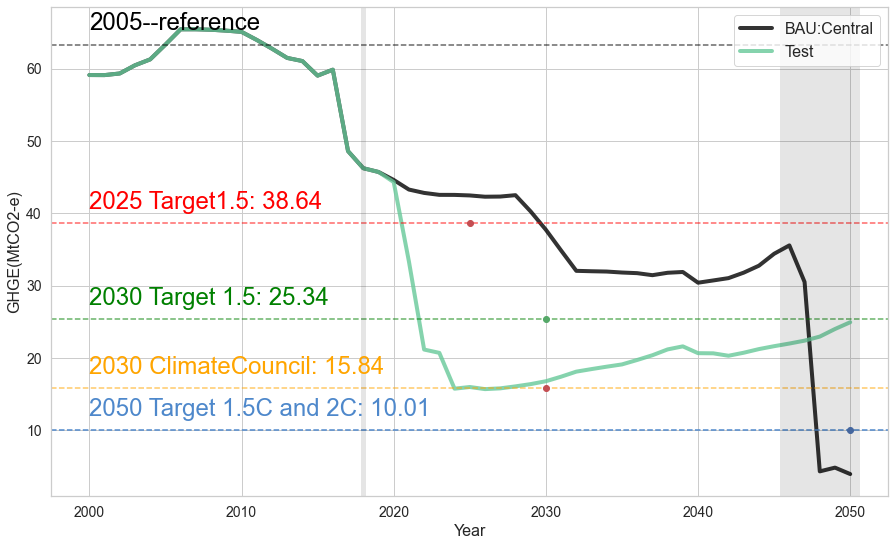

In [408]:
# Figures combinations from box 4 best cases PRIM. Include publically annonced in true and generation retirement changes from 2 to -5.
label1 = 'Test'#'Slow change' #'Decomm. 5 years earlier'
# label2 = 'Step change' #'Decomm. 4 years earlier'
# label3 = 'High DER' #'Decomm. 3 years earlier'
# label4 = 'Fast change'#'Decomm. 2 years earlier'
# label5 = #'Decomm. 1 year earlier'
# label6 = #'Decomm. as scheduled'
# label7 = #'Decomm. 1 year later'
# label8 = #'Decomm. 2 years later'


plt.figure(figsize=(15,9))
years = [DT.datetime.strptime(str(int(date)),'%Y') for date in bau_results_df['Time (Year)'].values]
years =  bau_results_df['Time (Year)'].values
plt.plot( years, bau_results_df['GHGYear'], color='black', alpha = 0.8, linewidth=4, label='BAU:Central')
plt.plot( years, incPAgenRetm5['GHGYear'],  color='#67c999', alpha = 0.8, linewidth=4, label=label1)
# plt.plot( years, incPAgenRetm4['GHGYear'],  color='#fcc081',  alpha = 0.8, linewidth=4, label=label2)
# plt.plot( years, incPAgenRetm3['GHGYear'],  color='#e39a8c', alpha = 0.8, linewidth=4, label=label3)
# plt.plot( years, incPAgenRetm2['GHGYear'],  color='#a899ba',  alpha = 0.8, linewidth=4, label=label4)
# plt.plot( years, incPAgenRetm1['GHGYear'],  color='#686ba5',  alpha = 0.8, linewidth=4, label=label5)
# plt.plot( years, incPAgenRet0['GHGYear'],  color='#925f66',  alpha = 0.8, linewidth=4, label=label6)
# plt.plot( years, incPAgenRet1['GHGYear'],  color='#d4644e',  alpha = 0.8, linewidth=4, label=label7)
# plt.plot( years, incPAgenRet2['GHGYear'],  color='#ac3f2a',  alpha = 0.8, linewidth=4, label=label8)

# Add dot and corresponding text
reference = bau_results_df[bau_results_df['Time (Year)'] == 2005]['GHGYear'].values

# reduction = 0.32

# plt.axhline((reference - (reference * reduction)), ls='--',color='#f23535', alpha = 1)

# plt.text(years[0], reference - (reference * reduction)+2, f'2025 Target 2C: {((reference - (reference * reduction))[0]):.2f}',color='#f23535')
# plt.plot(2025, (reference - (reference * reduction)), 'ro')

reduction = 0.39

plt.axhline((reference - (reference * reduction)), ls='--',color='red', alpha = 0.6)

plt.text(years[0], reference - (reference * reduction)+2, f'2025 Target1.5: {((reference - (reference * reduction))[0]):.2f}',color='red')
plt.plot(2025, (reference - (reference * reduction)), 'ro')

# reduction = 0.45

# plt.axhline((reference - (reference * reduction)) ,ls='--',color='#1b9a8c', alpha = 1)
# plt.text(years[0], reference - (reference * reduction)+2, f'2030 Target 2C: {((reference - (reference * reduction))[0]):.2f}',color='#1b9a8c')
# plt.plot(2030, (reference - (reference * reduction)), 'go')

reduction = 0.6

plt.axhline((reference - (reference * reduction)) ,ls='--',color='green', alpha = 0.6)
plt.text(years[0], reference - (reference * reduction)+2, f'2030 Target 1.5: {((reference - (reference * reduction))[0]):.2f}',color='green')
plt.plot(2030, (reference - (reference * reduction)), 'go')

reduction = 0.75

plt.axhline((reference - (reference * reduction)) ,ls='--',color='orange', alpha = 0.6)
plt.text(years[0], reference - (reference * reduction)+2, f'2030 ClimateCouncil: {((reference - (reference * reduction))[0]):.2f}',color='orange')
plt.plot(2030, (reference - (reference * reduction)), 'ro')

reduction = 0.842

plt.axhline((reference - (reference * reduction)) ,ls='--',color='#4e88cb', alpha = 1)
plt.text(years[0], reference - (reference * reduction)+2, f'2050 Target 1.5C and 2C: {((reference - (reference * reduction))[0]):.2f}',color='#4e88cb')
plt.plot(2050, (reference - (reference * reduction)), 'bo')

plt.axvline(2018, ls='-',color='black', alpha = 0.1, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.1, lw = 80)


plt.axhline((reference),ls='--',color='black', alpha = 0.6)
plt.text(years[0], reference+2, f'2005--reference',color='black')


#plt.grid( linestyle='-', linewidth=1)
plt.xlabel('Year', size=16)
plt.ylabel('GHGE(MtCO2-e)', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(prop={'size':16}, loc='upper right')

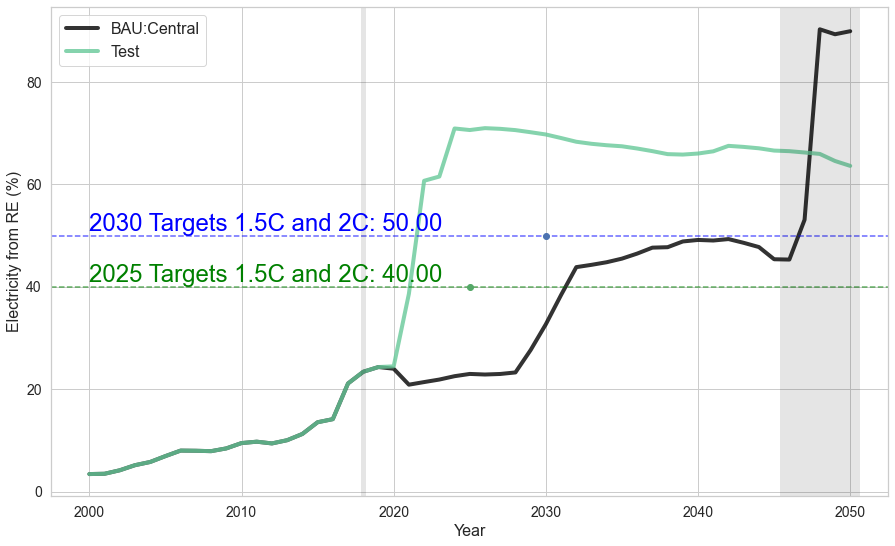

In [409]:
plt.figure(figsize=(15,9))
years = [DT.datetime.strptime(str(int(date)),'%Y') for date in bau_results_df['Time (Year)'].values]
years =  bau_results_df['Time (Year)'].values
plt.plot( years, bau_results_df['Percentage Renewable Production']*100, color='black', alpha = 0.8, linewidth=4, label='BAU:Central')
plt.plot( years, incPAgenRetm5['Percentage Renewable Production']*100,  color='#67c999', alpha = 0.8, linewidth=4, label=label1)
# plt.plot( years, incPAgenRetm4['Percentage Renewable Production']*100,  color='#fcc081',  alpha = 0.8, linewidth=4, label=label2)
# plt.plot( years, incPAgenRetm3['Percentage Renewable Production']*100,  color='#e39a8c', alpha = 0.8, linewidth=4, label=label3)
# plt.plot( years, incPAgenRetm2['Percentage Renewable Production']*100,  color='#a899ba',  alpha = 0.8, linewidth=4, label=label4)
# # plt.plot( years, incPAgenRetm1['Percentage Renewable Production']*100,  color='#686ba5',  alpha = 0.8, linewidth=4, label='Decomm. 1 year earlier')
# plt.plot( years, incPAgenRet0['Percentage Renewable Production']*100,  color='#925f66',  alpha = 0.8, linewidth=4, label='Decomm. as scheduled')
# plt.plot( years, incPAgenRet1['Percentage Renewable Production']*100,  color='#d4644e',  alpha = 0.8, linewidth=4, label='Decomm. 1 year later')
# plt.plot( years, incPAgenRet2['Percentage Renewable Production']*100,  color='#ac3f2a',  alpha = 0.8, linewidth=4, label='Decomm. 2 years later')

# Add dot and corresponding text

target = 40

plt.axhline(  target ,ls='--',color='green', alpha = 0.6)
plt.text(years[0], target+1, f'2025 Targets 1.5C and 2C: {target:.2f}',color='green')
plt.plot(2025, target, 'go')

target = 50
plt.axhline(  target ,ls='--',color='blue', alpha = 0.6)
plt.text(years[0], target+1, f'2030 Targets 1.5C and 2C: {target:.2f}',color='blue')
plt.plot(2030, target, 'bo')
plt.axvline(2018, ls='-',color='black', alpha = 0.1, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.1, lw = 80)


#plt.grid( linestyle='-', linewidth=1)
plt.xlabel('Year', size=16)
plt.ylabel('Electricity from RE (%)', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(prop={'size':16})

In [410]:
#Box 4 best-cases PRIM
#Decom. 5 years earlier
incPAgenRetm5LCTprimary = incPAgenRetm5['System Production Primary Spot']
incPAgenRetm5LCTunmetPrimary = incPAgenRetm5['Primary Total Unmet Demand (MWh)']
incPAgenRetm5LCToff = incPAgenRetm5['System Production Off Spot']

incPAgenRetm5LCTconsumptionPrimary = incPAgenRetm5LCTprimary + incPAgenRetm5LCToff + incPAgenRetm5LCTunmetPrimary
incPAgenRetm5LCTpercentageUnmetPrimary = (incPAgenRetm5LCTunmetPrimary/incPAgenRetm5LCTconsumptionPrimary)*100
incPAgenRetm5LCTwhere_are_NaNs = np.isnan(incPAgenRetm5LCTpercentageUnmetPrimary)
incPAgenRetm5LCTpercentageUnmetPrimary[incPAgenRetm5LCTwhere_are_NaNs] = 0
incPAgenRetm5['unmetPercentageConsumptionPrimary'] = incPAgenRetm5LCTpercentageUnmetPrimary

#Decom. 4 years earlier
# incPAgenRetm4LCTprimary = incPAgenRetm4['System Production Primary Spot']
# incPAgenRetm4LCTunmetPrimary = incPAgenRetm4['Primary Total Unmet Demand (MWh)']
# incPAgenRetm4LCToff = incPAgenRetm4['System Production Off Spot']

# incPAgenRetm4LCTconsumptionPrimary = incPAgenRetm4LCTprimary + incPAgenRetm4LCToff + incPAgenRetm4LCTunmetPrimary
# incPAgenRetm4LCTpercentageUnmetPrimary = (incPAgenRetm4LCTunmetPrimary/incPAgenRetm4LCTconsumptionPrimary)*100
# incPAgenRetm4LCTwhere_are_NaNs = np.isnan(incPAgenRetm4LCTpercentageUnmetPrimary)
# incPAgenRetm4LCTpercentageUnmetPrimary[incPAgenRetm4LCTwhere_are_NaNs] = 0
# incPAgenRetm4['unmetPercentageConsumptionPrimary'] = incPAgenRetm4LCTpercentageUnmetPrimary

# #Decom. 3 years earlier
# incPAgenRetm3LCTprimary = incPAgenRetm3['System Production Primary Spot']
# incPAgenRetm3LCTunmetPrimary = incPAgenRetm3['Primary Total Unmet Demand (MWh)']
# incPAgenRetm3LCToff = incPAgenRetm3['System Production Off Spot']

# incPAgenRetm3LCTconsumptionPrimary = incPAgenRetm3LCTprimary + incPAgenRetm3LCToff + incPAgenRetm3LCTunmetPrimary
# incPAgenRetm3LCTpercentageUnmetPrimary = (incPAgenRetm3LCTunmetPrimary/incPAgenRetm3LCTconsumptionPrimary)*100
# incPAgenRetm3LCTwhere_are_NaNs = np.isnan(incPAgenRetm3LCTpercentageUnmetPrimary)
# incPAgenRetm3LCTpercentageUnmetPrimary[incPAgenRetm3LCTwhere_are_NaNs] = 0
# incPAgenRetm3['unmetPercentageConsumptionPrimary'] = incPAgenRetm3LCTpercentageUnmetPrimary

# #Decom. 2 years earlier
# incPAgenRetm2LCTprimary = incPAgenRetm2['System Production Primary Spot']
# incPAgenRetm2LCTunmetPrimary = incPAgenRetm2['Primary Total Unmet Demand (MWh)']
# incPAgenRetm2LCToff = incPAgenRetm2['System Production Off Spot']

# incPAgenRetm2LCTconsumptionPrimary = incPAgenRetm2LCTprimary + incPAgenRetm2LCToff + incPAgenRetm2LCTunmetPrimary
# incPAgenRetm2LCTpercentageUnmetPrimary = (incPAgenRetm2LCTunmetPrimary/incPAgenRetm2LCTconsumptionPrimary)*100
# incPAgenRetm2LCTwhere_are_NaNs = np.isnan(incPAgenRetm2LCTpercentageUnmetPrimary)
# incPAgenRetm2LCTpercentageUnmetPrimary[incPAgenRetm2LCTwhere_are_NaNs] = 0
# incPAgenRetm2['unmetPercentageConsumptionPrimary'] = incPAgenRetm2LCTpercentageUnmetPrimary

# #Decom. 1 years earlier
# incPAgenRetm1LCTprimary = incPAgenRetm1['System Production Primary Spot']
# incPAgenRetm1LCTunmetPrimary = incPAgenRetm1['Primary Total Unmet Demand (MWh)']
# incPAgenRetm1LCToff = incPAgenRetm1['System Production Off Spot']

# incPAgenRetm1LCTconsumptionPrimary = incPAgenRetm1LCTprimary + incPAgenRetm1LCToff + incPAgenRetm1LCTunmetPrimary
# incPAgenRetm1LCTpercentageUnmetPrimary = (incPAgenRetm1LCTunmetPrimary/incPAgenRetm1LCTconsumptionPrimary)*100
# incPAgenRetm1LCTwhere_are_NaNs = np.isnan(incPAgenRetm1LCTpercentageUnmetPrimary)
# incPAgenRetm1LCTpercentageUnmetPrimary[incPAgenRetm1LCTwhere_are_NaNs] = 0
# incPAgenRetm1['unmetPercentageConsumptionPrimary'] = incPAgenRetm1LCTpercentageUnmetPrimary

# #Decom.as scheduled
# incPAgenRet0LCTprimary = incPAgenRet0['System Production Primary Spot']
# incPAgenRet0LCTunmetPrimary = incPAgenRet0['Primary Total Unmet Demand (MWh)']
# incPAgenRet0LCToff = incPAgenRet0['System Production Off Spot']

# incPAgenRet0LCTconsumptionPrimary = incPAgenRet0LCTprimary + incPAgenRet0LCToff + incPAgenRet0LCTunmetPrimary
# incPAgenRet0LCTpercentageUnmetPrimary = (incPAgenRet0LCTunmetPrimary/incPAgenRet0LCTconsumptionPrimary)*100
# incPAgenRet0LCTwhere_are_NaNs = np.isnan(incPAgenRet0LCTpercentageUnmetPrimary)
# incPAgenRet0LCTpercentageUnmetPrimary[incPAgenRet0LCTwhere_are_NaNs] = 0
# incPAgenRet0['unmetPercentageConsumptionPrimary'] = incPAgenRet0LCTpercentageUnmetPrimary

# #Decom. 1 year later
# incPAgenRet1LCTprimary = incPAgenRet1['System Production Primary Spot']
# incPAgenRet1LCTunmetPrimary = incPAgenRet1['Primary Total Unmet Demand (MWh)']
# incPAgenRet1LCToff = incPAgenRet1['System Production Off Spot']

# incPAgenRet1LCTconsumptionPrimary = incPAgenRet1LCTprimary + incPAgenRet1LCToff + incPAgenRet1LCTunmetPrimary
# incPAgenRet1LCTpercentageUnmetPrimary = (incPAgenRet1LCTunmetPrimary/incPAgenRet1LCTconsumptionPrimary)*100
# incPAgenRet1LCTwhere_are_NaNs = np.isnan(incPAgenRet1LCTpercentageUnmetPrimary)
# incPAgenRet1LCTpercentageUnmetPrimary[incPAgenRet1LCTwhere_are_NaNs] = 0
# incPAgenRet1['unmetPercentageConsumptionPrimary'] = incPAgenRet1LCTpercentageUnmetPrimary

# #Decom. 2 years later
# incPAgenRet2LCTprimary = incPAgenRet2['System Production Primary Spot']
# incPAgenRet2LCTunmetPrimary = incPAgenRet2['Primary Total Unmet Demand (MWh)']
# incPAgenRet2LCToff = incPAgenRet2['System Production Off Spot']

# incPAgenRet2LCTconsumptionPrimary = incPAgenRet2LCTprimary + incPAgenRet2LCToff + incPAgenRet2LCTunmetPrimary
# incPAgenRet2LCTpercentageUnmetPrimary = (incPAgenRet2LCTunmetPrimary/incPAgenRet2LCTconsumptionPrimary)*100
# incPAgenRet2LCTwhere_are_NaNs = np.isnan(incPAgenRet2LCTpercentageUnmetPrimary)
# incPAgenRet2LCTpercentageUnmetPrimary[incPAgenRet2LCTwhere_are_NaNs] = 0
# incPAgenRet2['unmetPercentageConsumptionPrimary'] = incPAgenRet2LCTpercentageUnmetPrimary

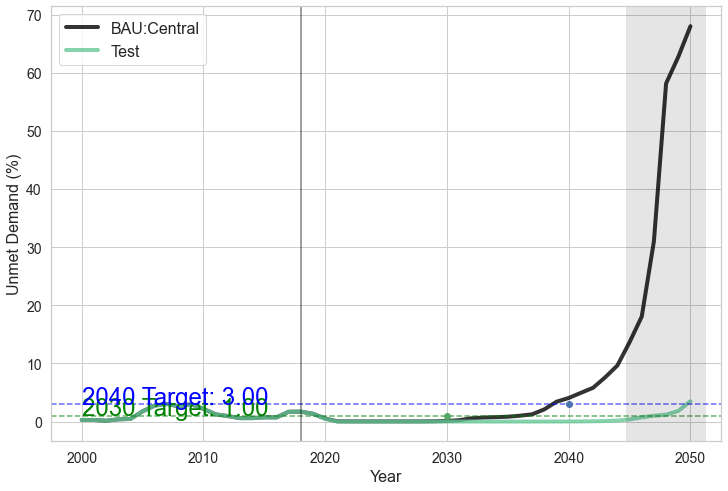

In [411]:
plt.figure(figsize=(12,8))
years = [DT.datetime.strptime(str(int(date)),'%Y') for date in bau_results_df['Time (Year)'].values]
years =  bau_results_df['Time (Year)'].values
plt.plot( years, bau_results_df['unmetPercentageConsumptionPrimary'], color='black', alpha = 0.8, linewidth=4, label='BAU:Central')
plt.plot( years, incPAgenRetm5['unmetPercentageConsumptionPrimary'],  color='#67c999', alpha = 0.8, linewidth=4, label=label1)
# plt.plot( years, incPAgenRetm4['unmetPercentageConsumptionPrimary'],  color='#fcc081',  alpha = 0.8, linewidth=4, label=label2)
# plt.plot( years, incPAgenRetm3['unmetPercentageConsumptionPrimary'],  color='#e39a8c', alpha = 0.8, linewidth=4, label=label3)
# plt.plot( years, incPAgenRetm2['unmetPercentageConsumptionPrimary'],  color='#a899ba',  alpha = 0.8, linewidth=4, label=label4)
# # plt.plot( years, incPAgenRetm1['unmetPercentageConsumptionPrimary'],  color='#686ba5',  alpha = 0.8, linewidth=4, label='Decomm. 1 year earlier')
# # plt.plot( years, incPAgenRet0['unmetPercentageConsumptionPrimary'],  color='#925f66',  alpha = 0.8, linewidth=4, label='Decomm. as scheduled')
# plt.plot( years, incPAgenRet1['unmetPercentageConsumptionPrimary'],  color='#d4644e',  alpha = 0.8, linewidth=4, label='Decomm. 1 year later')
# plt.plot( years, incPAgenRet2['unmetPercentageConsumptionPrimary'],  color='#ac3f2a',  alpha = 0.8, linewidth=4, label='Decomm. 2 years later')

# Add dot and corresponding text

target = 1

plt.axhline(  target ,ls='--',color='green', alpha = 0.6)
plt.text(years[0], target+0.01, f'2030 Target: {target:.2f}',color='green')
plt.plot(2030, target, 'go')

target = 3
plt.axhline(  target ,ls='--',color='blue', alpha = 0.6)
plt.text(years[0], target+0.01, f'2040 Target: {target:.2f}',color='blue')
plt.plot(2040, target, 'bo')
plt.axvline(2018, ls='-',color='black', alpha = 0.5)
plt.axvline(2048, ls='-',color='black', alpha = 0.1, lw = 80)


#plt.grid( linestyle='-', linewidth=1)
plt.xlabel('Year', size=16)
plt.ylabel('Unmet Demand (%)', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(prop={'size':16})

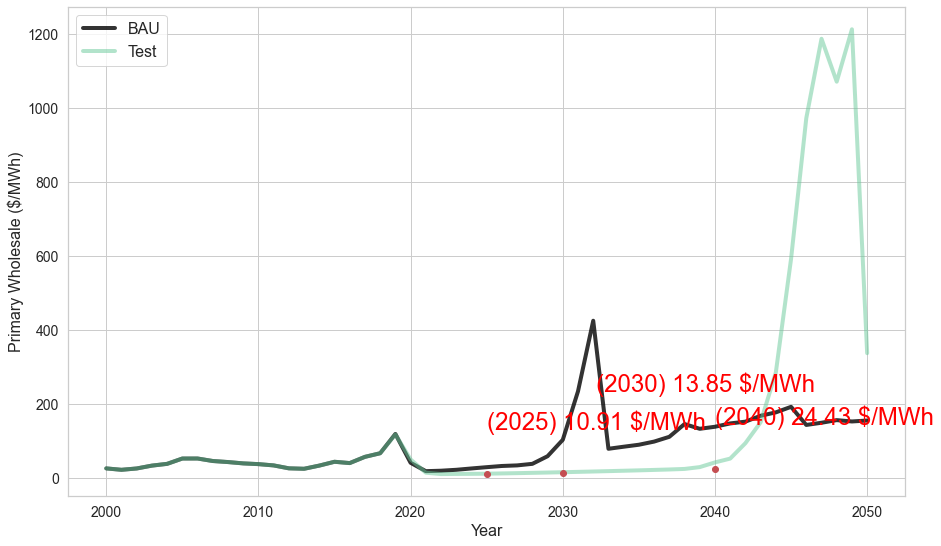

In [412]:
# Wholesale Prices
plt.figure(figsize=(15,9))
years = [DT.datetime.strptime(str(int(date)),'%Y') for date in bau_results_df['Time (Year)'].values]
years =  bau_results_df['Time (Year)'].values
plt.plot( years, bau_results_df['Primary Wholesale ($/MWh)'], color='black', alpha = 0.8, linewidth=4, label='BAU')
plt.plot( years, incPAgenRetm5['Primary Wholesale ($/MWh)'], color='#67C999', alpha = 0.5, linewidth=4, label=label1)
plt.xlabel('Year', size=16)
plt.ylabel('Primary Wholesale ($/MWh)', size=16)

val2025_1 = incPAgenRetm5['Primary Wholesale ($/MWh)'][2025 - startYear]
plt.text(2025, val2025_1+120, f'(2025) {(val2025_1):.2f} $/MWh     ',color='red')
plt.plot(2025, val2025_1, 'ro')

val2030_1 = incPAgenRetm5['Primary Wholesale ($/MWh)'][2030 - startYear]
plt.text(2030, val2030_1+220, f'     (2030) {(val2030_1):.2f} $/MWh',color='red')
plt.plot(2030, val2030_1, 'ro')

val2040_1= incPAgenRetm5['Primary Wholesale ($/MWh)'][2040 - startYear]
plt.text(2040, val2040_1+120, f'(2040) {(val2040_1):.2f} $/MWh',color='red')
plt.plot(2040, val2040_1, 'ro')

plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(prop={'size':16})

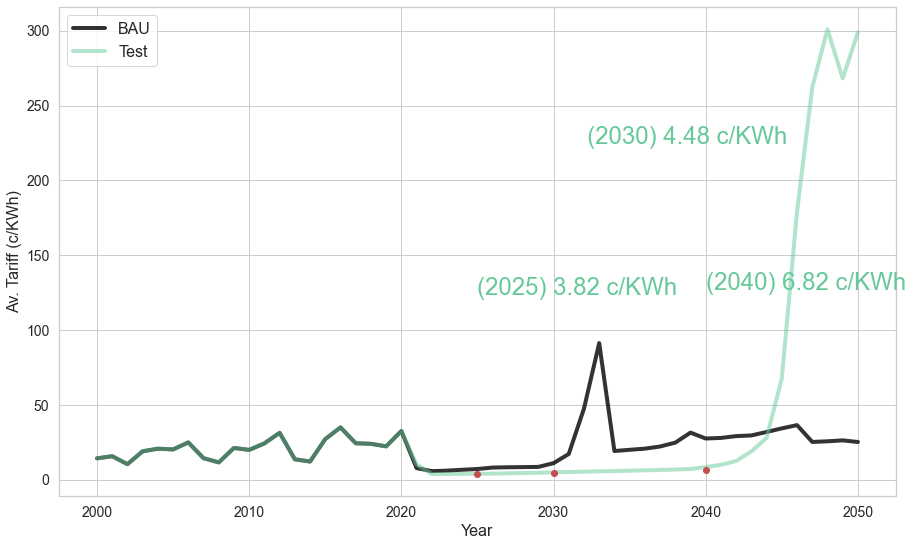

In [413]:
plt.figure(figsize=(15,9))
years = [DT.datetime.strptime(str(int(date)),'%Y') for date in bau_results_df['Time (Year)'].values]
years =  bau_results_df['Time (Year)'].values
plt.plot( years, bau_results_df['Avg Tariff (c/KWh) per household'], color='black', alpha = 0.8, linewidth=4, label='BAU')
plt.plot( years, incPAgenRetm5['Avg Tariff (c/KWh) per household'], color='#67C999', alpha = 0.5, linewidth=4, label=label1)


val2025_1 = incPAgenRetm5['Avg Tariff (c/KWh) per household'][2025 - startYear]
plt.text(2025, val2025_1+120, f'(2025) {(val2025_1):.2f} c/KWh     ',color=colorLct2_1)
plt.plot(2025, val2025_1, 'ro')

val2030_1 = incPAgenRetm5['Avg Tariff (c/KWh) per household'][2030 - startYear]
plt.text(2030, val2030_1+220, f'     (2030) {(val2030_1):.2f} c/KWh',color=colorLct2_1)
plt.plot(2030, val2030_1, 'ro')

val2040_1= incPAgenRetm5['Avg Tariff (c/KWh) per household'][2040 - startYear]
plt.text(2040, val2040_1+120, f'(2040) {(val2040_1):.2f} c/KWh',color=colorLct2_1)
plt.plot(2040, val2040_1, 'ro')

plt.xlabel('Year', size=16)
plt.ylabel('Av. Tariff (c/KWh)', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(prop={'size':16})


# Load FF JT and EVA


In [414]:
resultsJTff = load_results(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/gr4sp_JT2021-Aug-30.tar.gz')
resultsJT2ff = load_results(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/gr4sp_JT2021-Sep-06.tar.gz')
resultsJT3ff = load_results(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/gr4sp_JT2021-Sep-07.tar.gz')

In [415]:
ev_results_JT_df = pd.read_excel(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/notebookGr4sp/outputs/data/EV_JT2021-SEP-1_all.xlsx', index_col=[0])
ev_results_JT2_df = pd.read_excel(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/notebookGr4sp/outputs/data/EV_JT2021-SEP-6_all.xlsx', index_col=[0])
ev_results_JT3_df = pd.read_excel(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/notebookGr4sp/outputs/data/EV_JT2021-SEP-7_all.xlsx', index_col=[0])

ev_results_BAU_df = pd.read_excel(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/notebookGr4sp/outputs/data/EV_all_BAU.xlsx', index_col=[0])

In [416]:
# Duplicate results from 2040 into the years of 2040-2050
experimentsJTff, outcomesJTff = resultsJTff

ev_results_JT_df.insert(0, 1999, ev_results_JT_df[2000])
ev_results_JT_df.insert(0, 1998, ev_results_JT_df[2000])
for t in range(2041,2051):
     ev_results_JT_df[t] = ev_results_JT_df[2040]
        
# Add it to outcomes data structure
outcomesJTff['Energy Vulnerability Percentage'] = ev_results_JT_df.values

# Duplicate results from 2040 into the years of 2040-2050
experimentsJT2ff, outcomesJT2ff = resultsJT2ff

ev_results_JT2_df.insert(0, 1999, ev_results_JT2_df[2000])
ev_results_JT2_df.insert(0, 1998, ev_results_JT2_df[2000])
for t in range(2041,2051):
     ev_results_JT2_df[t] = ev_results_JT2_df[2040]
        
# Add it to outcomes data structure
outcomesJT2ff['Energy Vulnerability Percentage'] = ev_results_JT2_df.values

# Duplicate results from 2040 into the years of 2040-2050
experimentsJT3ff, outcomesJT3ff = resultsJT3ff

ev_results_JT3_df.insert(0, 1999, ev_results_JT3_df[2000])
ev_results_JT3_df.insert(0, 1998, ev_results_JT3_df[2000])
for t in range(2041,2051):
     ev_results_JT3_df[t] = ev_results_JT3_df[2040]
        
# Add it to outcomes data structure
outcomesJT3ff['Energy Vulnerability Percentage'] = ev_results_JT3_df.values

In [417]:
# Duplicate results BAU from 2040 into the years of 2040-2050
ev_results_BAU_df.insert(0, 1999, ev_results_BAU_df[2000])
ev_results_BAU_df.insert(0, 1998, ev_results_BAU_df[2000])
for t in range(2041,2051):
     ev_results_BAU_df[t] = ev_results_BAU_df[2040]
        
# Add it to outcomes data structure
outcomesJTff['Energy Vulnerability Percentage'] =  np.append(outcomesJTff['Energy Vulnerability Percentage'],
                                                         ev_results_BAU_df.values, axis=0)

# Add it to outcomes data structure
outcomesJT2ff['Energy Vulnerability Percentage'] =  np.append(outcomesJT2ff['Energy Vulnerability Percentage'],
                                                         ev_results_BAU_df.values, axis=0)


# Add it to outcomes data structure
outcomesJT3ff['Energy Vulnerability Percentage'] =  np.append(outcomesJT3ff['Energy Vulnerability Percentage'],
                                                         ev_results_BAU_df.values, axis=0)

In [418]:
for col in experimentsJTff:
    print(col, experimentsJTff[col].unique())
    
for col in experimentsJT2ff:
    print(col, experimentsJT2ff[col].unique())
    
for col in experimentsJT3ff:
    print(col, experimentsJT3ff[col].unique())

consumption [0. 1. 2. 3.]
generationRolloutPeriod [1, 2, 5, 6, 8, 10]
Categories (6, int64): [1, 2, 5, 6, 8, 10]
includePublicallyAnnouncedGen [0. 1.]
nameplateCapacityChangeBrownCoal [0, -30, -20, -15, 10]
Categories (5, int64): [-30, -20, -15, 0, 10]
nameplateCapacityChangeWind [0, -30, 30, 40]
Categories (4, int64): [-30, 0, 30, 40]
nonScheduleGenSpotMarket [ 9. 10.]
scheduleMinCapMarketGen [100, 150, 200, 250, 300]
Categories (5, int64): [100, 150, 200, 250, 300]
semiScheduleGenSpotMarket [ 8.  9. 10.]
scenario [0, 1, 2, 3, 4, ..., 28795, 28796, 28797, 28798, 28799]
Length: 28800
Categories (28800, int64): [0, 1, 2, 3, ..., 28796, 28797, 28798, 28799]
policy ['None']
Categories (1, object): ['None']
model ['Gr4sp']
Categories (1, object): ['Gr4sp']
generationRolloutPeriod [1, 2, 5, 6, 8, 10]
Categories (6, int64): [1, 2, 5, 6, 8, 10]
nameplateCapacityChangeBrownCoal [0, -30, -20, 10, 20]
Categories (5, int64): [-30, -20, 0, 10, 20]
nameplateCapacityChangeWind [0, -20, 30, 40]
Categ

In [427]:
# FF using the most influential factors for the JT scenario
uncertaintiesJTff = experimentsJTff.columns[:-3]

#from startYear
startYear = 2000
startYearShift = (startYear - 1998)

time = outcomesJTff['TIMEYear'][0, startYearShift:]


# Filter outcomes taking into account the startYear, and removing Seed Experiment info. 
# Seed it is useful if I want to retrieve more info from the csv files, or redo the experiments with the
# simulation parameters
outcomes_filteredJTff = {k:v[:, startYearShift:] for k,v in outcomesJTff.items() if k != 'seedExperimentCsv'}

# FF using the most influential factors for the JT scenario
uncertaintiesJT2ff = experimentsJT2ff.columns[:-3]

#from startYear
startYear = 2000
startYearShift = (startYear - 1998)

time = outcomesJT2ff['TIMEYear'][0, startYearShift:]


# Filter outcomes taking into account the startYear, and removing Seed Experiment info. 
# Seed it is useful if I want to retrieve more info from the csv files, or redo the experiments with the
# simulation parameters
outcomes_filteredJT2ff = {k:v[:, startYearShift:] for k,v in outcomesJT2ff.items() if k != 'seedExperimentCsv'}


# FF using the most influential factors for the JT scenario
uncertaintiesJT3ff = experimentsJT3ff.columns[:-3]

#from startYear
startYear = 2000
startYearShift = (startYear - 1998)

time = outcomesJT3ff['TIMEYear'][0, startYearShift:]


# Filter outcomes taking into account the startYear, and removing Seed Experiment info. 
# Seed it is useful if I want to retrieve more info from the csv files, or redo the experiments with the
# simulation parameters
outcomes_filteredJT3ff = {k:v[:, startYearShift:] for k,v in outcomesJT3ff.items() if k != 'seedExperimentCsv'}

In [428]:
ooi = 'GHGYear'
data_GHG_household = outcomes_filteredJTff[ooi]

""" Converts household data in tCO2e into total residential data in MtCO2e"""
data_GHG_residential = (data_GHG_household * outcomes_filteredJTff['numConsumersYear']) / 1000000.0

""" Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
data_GHG_total = data_GHG_residential / 0.3


"""Overwrite GHG with the data of interest"""
outcomes_filteredJTff[ooi] = data_GHG_total


ooi = 'consumptionYear'
data_consumption_household = outcomes_filteredJTff[ooi]

""" Converts household data in KWh into total residential data in MWh"""
data_consumption_residential = (data_consumption_household * outcomes_filteredJTff['numConsumersYear']) / 1000.0

""" Applies scaling factor used in simulation, so that data represents total consumption, not only residential"""
data_consumption_total = data_consumption_residential / 0.3

"""Overwrite Consumption with the data of interest"""
outcomes_filteredJTff[ooi] = data_consumption_total

primary = outcomes_filteredJTff['primarySpotProductionYear']
secondary = outcomes_filteredJTff['secondarySpotProductionYear']
off = outcomes_filteredJTff['offSpotProductionYear']
unmetPrimary = outcomes_filteredJTff['primaryUnmetDemandMwh']
unmetSecondary = outcomes_filteredJTff['secondaryUnmetDemandMwh']

consumptionPrimary = primary + off + unmetPrimary
consumptionSecondary = secondary + off + unmetSecondary

percentageUnmetPrimary = (unmetPrimary/consumptionPrimary)*100
percentageUnmetSecondary = np.divide(unmetSecondary, consumptionSecondary, 
                                     out=np.zeros_like(unmetSecondary), where=consumptionSecondary!=0) *100

where_are_NaNs = np.isnan(percentageUnmetPrimary)
percentageUnmetPrimary[where_are_NaNs] = 0

where_are_NaNs = np.isnan(percentageUnmetSecondary)
percentageUnmetSecondary[where_are_NaNs] = 0

outcomes_filteredJTff['unmetPercentageConsumptionPrimary'] = percentageUnmetPrimary
outcomes_filteredJTff['unmetPercentageConsumptionSecondary'] = percentageUnmetSecondary

In [429]:
ooi = 'GHGYear'
data_GHG_household = outcomes_filteredJT2ff[ooi]

""" Converts household data in tCO2e into total residential data in MtCO2e"""
data_GHG_residential = (data_GHG_household * outcomes_filteredJT2ff['numConsumersYear']) / 1000000.0

""" Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
data_GHG_total = data_GHG_residential / 0.3


"""Overwrite GHG with the data of interest"""
outcomes_filteredJT2ff[ooi] = data_GHG_total


ooi = 'consumptionYear'
data_consumption_household = outcomes_filteredJT2ff[ooi]

""" Converts household data in KWh into total residential data in MWh"""
data_consumption_residential = (data_consumption_household * outcomes_filteredJT2ff['numConsumersYear']) / 1000.0

""" Applies scaling factor used in simulation, so that data represents total consumption, not only residential"""
data_consumption_total = data_consumption_residential / 0.3

"""Overwrite Consumption with the data of interest"""
outcomes_filteredJT2ff[ooi] = data_consumption_total

primary = outcomes_filteredJT2ff['primarySpotProductionYear']
secondary = outcomes_filteredJT2ff['secondarySpotProductionYear']
off = outcomes_filteredJT2ff['offSpotProductionYear']
unmetPrimary = outcomes_filteredJT2ff['primaryUnmetDemandMwh']
unmetSecondary = outcomes_filteredJT2ff['secondaryUnmetDemandMwh']

consumptionPrimary = primary + off + unmetPrimary
consumptionSecondary = secondary + off + unmetSecondary

percentageUnmetPrimary = (unmetPrimary/consumptionPrimary)*100
percentageUnmetSecondary = np.divide(unmetSecondary, consumptionSecondary, 
                                     out=np.zeros_like(unmetSecondary), where=consumptionSecondary!=0) *100

where_are_NaNs = np.isnan(percentageUnmetPrimary)
percentageUnmetPrimary[where_are_NaNs] = 0

where_are_NaNs = np.isnan(percentageUnmetSecondary)
percentageUnmetSecondary[where_are_NaNs] = 0

outcomes_filteredJT2ff['unmetPercentageConsumptionPrimary'] = percentageUnmetPrimary
outcomes_filteredJT2ff['unmetPercentageConsumptionSecondary'] = percentageUnmetSecondary

In [430]:
ooi = 'GHGYear'
data_GHG_household = outcomes_filteredJT3ff[ooi]

""" Converts household data in tCO2e into total residential data in MtCO2e"""
data_GHG_residential = (data_GHG_household * outcomes_filteredJT3ff['numConsumersYear']) / 1000000.0

""" Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
data_GHG_total = data_GHG_residential / 0.3


"""Overwrite GHG with the data of interest"""
outcomes_filteredJT3ff[ooi] = data_GHG_total


ooi = 'consumptionYear'
data_consumption_household = outcomes_filteredJT3ff[ooi]

""" Converts household data in KWh into total residential data in MWh"""
data_consumption_residential = (data_consumption_household * outcomes_filteredJT3ff['numConsumersYear']) / 1000.0

""" Applies scaling factor used in simulation, so that data represents total consumption, not only residential"""
data_consumption_total = data_consumption_residential / 0.3

"""Overwrite Consumption with the data of interest"""
outcomes_filteredJT3ff[ooi] = data_consumption_total

primary = outcomes_filteredJT3ff['primarySpotProductionYear']
secondary = outcomes_filteredJT3ff['secondarySpotProductionYear']
off = outcomes_filteredJT3ff['offSpotProductionYear']
unmetPrimary = outcomes_filteredJT3ff['primaryUnmetDemandMwh']
unmetSecondary = outcomes_filteredJT3ff['secondaryUnmetDemandMwh']

consumptionPrimary = primary + off + unmetPrimary
consumptionSecondary = secondary + off + unmetSecondary

percentageUnmetPrimary = (unmetPrimary/consumptionPrimary)*100
percentageUnmetSecondary = np.divide(unmetSecondary, consumptionSecondary, 
                                     out=np.zeros_like(unmetSecondary), where=consumptionSecondary!=0) *100

where_are_NaNs = np.isnan(percentageUnmetPrimary)
percentageUnmetPrimary[where_are_NaNs] = 0

where_are_NaNs = np.isnan(percentageUnmetSecondary)
percentageUnmetSecondary[where_are_NaNs] = 0

outcomes_filteredJT3ff['unmetPercentageConsumptionPrimary'] = percentageUnmetPrimary
outcomes_filteredJT3ff['unmetPercentageConsumptionSecondary'] = percentageUnmetSecondary

## Policy mixes JT

JT1
- consumption [0. 1. 2. 3.]
- generationRolloutPeriod [1, 2, 5, 6, 8, 10]
- includePublicallyAnnouncedGen [0. 1.]
- nameplateCapacityChangeBrownCoal [0, -30, -20, -15, 10]
- nameplateCapacityChangeWind [0, -30, 30, 40]
- nonScheduleGenSpotMarket [ 9. 10.]
- scheduleMinCapMarketGen [100, 150, 200, 250, 300]
- semiScheduleGenSpotMarket [ 8.  9. 10.]


Length: 28800
model [Gr4sp]


Second set of inputs (JT2)

- generationRolloutPeriod [1, 2, 5, 6, 8, 10]
- nameplateCapacityChangeBrownCoal [0, -30, -20, 10, 20]
- nameplateCapacityChangeWind [0, -20, 30, 40]
- nonScheduleGenSpotMarket [ 9. 10.]
- scheduleMinCapMarketGen [150, 250, 300]
- semiScheduleGenSpotMarket [ 8.  9. 10.]

Length: 2160
model [Gr4sp]

Third set of inputs (JT3)

- generationRolloutPeriod [1, 4, 6, 8, 10]
- nameplateCapacityChangeBrownCoal [0, -30, -20, 10, 20]
- nameplateCapacityChangeWind [0, -20, -10, 30, 40]
- nonScheduleGenSpotMarket [ 9. 10.]
- scheduleMinCapMarketGen [150, 250, 300]
- semiScheduleGenSpotMarket [ 8.  9. 10.]
- wholesaleTariffContribution [10, 20, 30, 40, 50]

Length: 11250

In [431]:
def filter_ff_JT(includePublicallyAnnouncedGen,
                 consumption,
                 generationRolloutPeriod,
                 nameplateCapacityChangeBrownCoal,
                 nonScheduleGenSpotMarket,
                 scheduleMinCapMarketGen,
                 semiScheduleGenSpotMarket, 
                 nameplateCapacityChangeWind
             ):

    q1 = experimentsJTff['includePublicallyAnnouncedGen'] == includePublicallyAnnouncedGen
    q2 = experimentsJTff['consumption'] == consumption
    q3 = experimentsJTff['generationRolloutPeriod'] == generationRolloutPeriod
    q4 = experimentsJTff['nameplateCapacityChangeBrownCoal'] == nameplateCapacityChangeBrownCoal
    q5 = experimentsJTff['nonScheduleGenSpotMarket'] == nonScheduleGenSpotMarket
    q6 = experimentsJTff['scheduleMinCapMarketGen'] == scheduleMinCapMarketGen
    q7 = experimentsJTff['semiScheduleGenSpotMarket'] == semiScheduleGenSpotMarket
    q8 = experimentsJTff['nameplateCapacityChangeWind'] == nameplateCapacityChangeWind
    query = q1 & q2 & q3 & q4 & q5 & q6 & q7 & q8
    
    print(np.unique( query , return_counts=True))
    print(experimentsJTff[ query ])
    
    return experimentsJTff[ query ].index.values[0]

def filter_ff_JT2(generationRolloutPeriod,
                 nameplateCapacityChangeBrownCoal,
                 nonScheduleGenSpotMarket,
                 scheduleMinCapMarketGen,
                 semiScheduleGenSpotMarket, 
                 nameplateCapacityChangeWind
             ):

    q3 = experimentsJT2ff['generationRolloutPeriod'] == generationRolloutPeriod
    q4 = experimentsJT2ff['nameplateCapacityChangeBrownCoal'] == nameplateCapacityChangeBrownCoal
    q5 = experimentsJT2ff['nonScheduleGenSpotMarket'] == nonScheduleGenSpotMarket
    q6 = experimentsJT2ff['scheduleMinCapMarketGen'] == scheduleMinCapMarketGen
    q7 = experimentsJT2ff['semiScheduleGenSpotMarket'] == semiScheduleGenSpotMarket
    q8 = experimentsJT2ff['nameplateCapacityChangeWind'] == nameplateCapacityChangeWind
    query = q3 & q4 & q5 & q6 & q7 & q8
    
    print(np.unique( query , return_counts=True))
    print(experimentsJT2ff[ query ])
    
    return experimentsJT2ff[ query ].index.values[0]

def filter_ff_JT3(generationRolloutPeriod,
                  nameplateCapacityChangeBrownCoal,
                  nameplateCapacityChangeWind,
                  nonScheduleGenSpotMarket,
                  scheduleMinCapMarketGen,
                  semiScheduleGenSpotMarket, 
                  wholesaleTariffContribution                 
             ):
    q2 = experimentsJT3ff['wholesaleTariffContribution'] == wholesaleTariffContribution
    q3 = experimentsJT3ff['generationRolloutPeriod'] == generationRolloutPeriod
    q4 = experimentsJT3ff['nameplateCapacityChangeBrownCoal'] == nameplateCapacityChangeBrownCoal
    q5 = experimentsJT3ff['nonScheduleGenSpotMarket'] == nonScheduleGenSpotMarket
    q6 = experimentsJT3ff['scheduleMinCapMarketGen'] == scheduleMinCapMarketGen
    q7 = experimentsJT3ff['semiScheduleGenSpotMarket'] == semiScheduleGenSpotMarket
    q8 = experimentsJT3ff['nameplateCapacityChangeWind'] == nameplateCapacityChangeWind
    query = q2 & q3 & q4 & q5 & q6 & q7 & q8
    
    print(np.unique( query , return_counts=True))
    print(experimentsJT3ff[ query ])
    
    return experimentsJT3ff[ query ].index.values[0]

In [432]:
selected_indexJT1 = filter_ff_JT(includePublicallyAnnouncedGen = 1,
                                  consumption = 0,
                                  generationRolloutPeriod = 1,
                                  nameplateCapacityChangeBrownCoal = 0,
                                  nonScheduleGenSpotMarket= 9,
                                  scheduleMinCapMarketGen = 300,
                                  semiScheduleGenSpotMarket = 10,
                                 nameplateCapacityChangeWind = 0)

# selected_indexJT2 = filter_ff_JT(includePublicallyAnnouncedGen = 0,
#                                   consumption = 0,
#                                   generationRolloutPeriod = 8,
#                                   nameplateCapacityChangeBrownCoal = 10,
#                                   nonScheduleGenSpotMarket= 10,
#                                   scheduleMinCapMarketGen = 300,
#                                   semiScheduleGenSpotMarket = 9,
#                                  nameplateCapacityChangeWind = 30)

# selected_indexJT3 = filter_ff_JT(includePublicallyAnnouncedGen = 0,
#                                   consumption = 0,
#                                   generationRolloutPeriod = 8,
#                                   nameplateCapacityChangeBrownCoal = 10,
#                                   nonScheduleGenSpotMarket= 9,
#                                   scheduleMinCapMarketGen = 300,
#                                   semiScheduleGenSpotMarket = 8,
#                                  nameplateCapacityChangeWind = 30)

### Successful when includePublicallyAnnounced = true:

# selected_indexJT2 = filter_ff_JT(includePublicallyAnnouncedGen = 1,
#                                   consumption = 0,
#                                   generationRolloutPeriod = 6,
#                                   nameplateCapacityChangeBrownCoal = 0,
#                                   nonScheduleGenSpotMarket= 9,
#                                   scheduleMinCapMarketGen = 300,
#                                   semiScheduleGenSpotMarket = 8,
#                                 nameplateCapacityChangeWind = 0)

selected_indexJT3 = filter_ff_JT(includePublicallyAnnouncedGen = 1,
                                  consumption = 0,
                                  generationRolloutPeriod = 6,
                                  nameplateCapacityChangeBrownCoal = 10,
                                  nonScheduleGenSpotMarket= 9,
                                  scheduleMinCapMarketGen = 300,
                                  semiScheduleGenSpotMarket = 8,
                                nameplateCapacityChangeWind = 0)

# selected_indexJT4 = filter_ff_JT(includePublicallyAnnouncedGen = 1,
#                                   consumption = 0,
#                                   generationRolloutPeriod = 6,
#                                   nameplateCapacityChangeBrownCoal = 0,
#                                   nonScheduleGenSpotMarket= 9,
#                                   scheduleMinCapMarketGen = 300,
#                                   semiScheduleGenSpotMarket = 9,
#                                 nameplateCapacityChangeWind = 0)

# selected_indexJT5 = filter_ff_JT(includePublicallyAnnouncedGen = 1,
#                                   consumption = 0,
#                                   generationRolloutPeriod = 6,
#                                   nameplateCapacityChangeBrownCoal = 0,
#                                   nonScheduleGenSpotMarket= 9,
#                                   scheduleMinCapMarketGen = 300,
#                                   semiScheduleGenSpotMarket = 8,
#                                   nameplateCapacityChangeWind = 0)

# selected_indexJT6 = filter_ff_JT(includePublicallyAnnouncedGen = 1,
#                                   consumption = 0,
#                                   generationRolloutPeriod = 6,
#                                   nameplateCapacityChangeBrownCoal = 0,
#                                   nonScheduleGenSpotMarket= 9,
#                                   scheduleMinCapMarketGen = 300,
#                                   semiScheduleGenSpotMarket = 8,
#                                 nameplateCapacityChangeWind = 0)

selected_indexJT7 = filter_ff_JT(includePublicallyAnnouncedGen = 1,
                                  consumption = 0,
                                  generationRolloutPeriod = 10,
                                  nameplateCapacityChangeBrownCoal = 0,
                                  nonScheduleGenSpotMarket= 10,
                                  scheduleMinCapMarketGen = 300,
                                  semiScheduleGenSpotMarket = 9,
                                nameplateCapacityChangeWind = 0)

####### Results with second set of input values (includePublicallyAnnounced = false, and consumption `Central scenario')

selected_indexJT21 = filter_ff_JT2(generationRolloutPeriod=10,
                                   nameplateCapacityChangeBrownCoal=10,
                                   nonScheduleGenSpotMarket=9,
                                   scheduleMinCapMarketGen=300,                                   
                                   semiScheduleGenSpotMarket=9, 
                                   nameplateCapacityChangeWind=30)

selected_indexJT22 = filter_ff_JT2(generationRolloutPeriod=8,
                                   nameplateCapacityChangeBrownCoal=20,
                                   nonScheduleGenSpotMarket=10,
                                   scheduleMinCapMarketGen=250,
                                   semiScheduleGenSpotMarket=9, 
                                   nameplateCapacityChangeWind=30)

selected_indexJT23 = filter_ff_JT2(generationRolloutPeriod=8,
                                   nameplateCapacityChangeBrownCoal=10,
                                   nonScheduleGenSpotMarket=10,
                                   scheduleMinCapMarketGen=300,
                                   semiScheduleGenSpotMarket=9, 
                                   nameplateCapacityChangeWind=30)

## Results with third set of inputs (including the input wholesaleTariffContribution)

selected_indexJT31 = filter_ff_JT3(generationRolloutPeriod= 8,
                                   nameplateCapacityChangeBrownCoal=10,
                                   nonScheduleGenSpotMarket=10,
                                   scheduleMinCapMarketGen=150,                                   
                                   semiScheduleGenSpotMarket=9, 
                                   nameplateCapacityChangeWind=30,
                                   wholesaleTariffContribution = 30
                                  )


(array([False,  True]), array([28799,     1], dtype=int64))
     consumption generationRolloutPeriod  includePublicallyAnnouncedGen  \
614          0.0                       1                            1.0   

    nameplateCapacityChangeBrownCoal nameplateCapacityChangeWind  \
614                                0                           0   

     nonScheduleGenSpotMarket scheduleMinCapMarketGen  \
614                       9.0                     300   

     semiScheduleGenSpotMarket scenario policy  model  
614                       10.0      614   None  Gr4sp  
(array([False,  True]), array([28799,     1], dtype=int64))
      consumption generationRolloutPeriod  includePublicallyAnnouncedGen  \
4692          0.0                       6                            1.0   

     nameplateCapacityChangeBrownCoal nameplateCapacityChangeWind  \
4692                               10                           0   

      nonScheduleGenSpotMarket scheduleMinCapMarketGen  \
4692           

(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

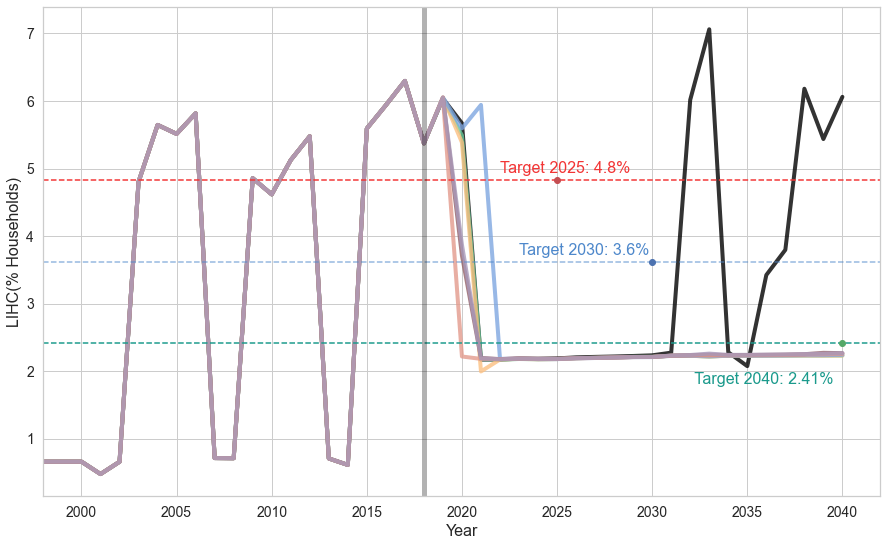

In [433]:
labelJT_1 = 'Semi-sched. outside market(s), Non-sched. 2nd market'
labelJT_2 = 'Only commited gen., CWind +30%, CBC +10%, Semi-sched. 2nd market, 8y deployment'
labelJT_3 = 'Non-sched. 2nd market, CBC +10%, 6y deployment'
labelJT_4 = 'Semi-sched and Non-sched. 2nd market, 6y deployment'
labelJT_5 = 'Non-sched. 2nd market, CWind +30%, 6y deployment'
labelJT_6 = 'Non-sched. 2nd market, minCapSched. 0.1 MW'
labelJT_7 = 'Semi-sched. 2nd market, 10y deployment'

colorJT_1 = '#67C999' #Green
colorJT_2 = '#A899BA' #Lilac
colorJT_3 = '#FCC081' #light orance (piel)
colorJT_4 = '#925F66' #palo de rosa oscuro
colorJT_5 = '#E39A8C' #pink
colorJT_6 = '#FF8000' #orange
colorJT_7 = '#7EA6E0' #blue

labelJT_11 = 'Only commited gen., Semi-sched and Non-sched. 2nd market, CWind +30%, CBC +10%, 10y deployment'

labelJT_21 = 'Only commited gen., Semi-sched and non-sched. 2nd market, CWind +30%, CBC +10%, 10y deployment'
labelJT_22 = 'Only commited gen., Semi-sched. 2nd market, CWind +30%, CBC +20%, SchedMinCap 25MW, 8y deployment'

colorJT_21 = '#925F66'
colorJT_22 = '#E39A8C'

labelJT_31 = 'test'

labelJT_23 = 'Only commited gen., Semi-sched. 2nd market, CWind +30%, CBC +10%, 8y deployment'
colorJT_23 = '#A899BA'

# Figures combinations from box 4 best cases PRIM. Include publically annonced in true and generation retirement changes from 2 to -5.
plt.figure(figsize=(15,9))
years = ev_results_BAU_df.T.index.values

plt.plot( years[:-10], ev_results_BAU_df.values[0][:-10] * 100, color='black', alpha = 0.8, linewidth=4, label='BAU')
plt.plot( years[:-10], ev_results_JT_df.iloc[selected_indexJT1].values[:-10] * 100, color=colorJT_1, alpha = 0.8, linewidth=4, label=labelJT_1)
#plt.plot( years[:-10], ev_results_JT_df.iloc[selected_indexJT2].values[:-10] * 100, color=colorJT_2, alpha = 0.8, linewidth=4, label=labelJT_2)
plt.plot( years[:-10], ev_results_JT_df.iloc[selected_indexJT3].values[:-10] * 100, color=colorJT_3, alpha = 0.8, linewidth=4, label=labelJT_3)
#plt.plot( years[:-10], ev_results_JT_df.iloc[selected_indexJT4].values[:-10] * 100, color=colorJT_4, alpha = 0.8, linewidth=4, label=labelJT_4)
#plt.plot( years[:-10], ev_results_JT_df.iloc[selected_indexJT5].values[:-10] * 100, color=colorJT_5, alpha = 0.8, linewidth=4, label=labelJT_5)
#plt.plot( years[:-10], ev_results_JT_df.iloc[selected_indexJT6].values[:-10] * 100, color=colorJT_6, alpha = 0.8, linewidth=4, label=labelJT_6)
plt.plot( years[:-10], ev_results_JT_df.iloc[selected_indexJT7].values[:-10] * 100, color=colorJT_7, alpha = 0.8, linewidth=4, label=labelJT_7)

#### test with second set of input values

plt.plot( years[:-10], ev_results_JT2_df.iloc[selected_indexJT21].values[:-10] * 100, color=colorJT_21, alpha = 0.8, linewidth=4, label=labelJT_21)
plt.plot( years[:-10], ev_results_JT2_df.iloc[selected_indexJT22].values[:-10] * 100, color=colorJT_22, alpha = 0.8, linewidth=4, label=labelJT_22)
plt.plot( years[:-10], ev_results_JT2_df.iloc[selected_indexJT23].values[:-10] * 100, color=colorJT_23, alpha = 0.8, linewidth=4, label=labelJT_23)


## Plots with third set of inputs

#plt.plot( years[:-10], ev_results_JT3_df.iloc[selected_indexJT31].values[:-10] * 100, color='red', alpha = 0.8, linewidth=4, label=labelJT_31)

# Add dot and corresponding text

ooi = 'Energy Vulnerability Percentage'    

referenceYear = 2019
reference = ev_results_BAU_df[referenceYear].values * 100
reduction = 0.2

plt.axhline((reference - (reference * reduction)), ls='--',color='#f23535', alpha = 1)

plt.text(years[24], reference - (reference * reduction)+.1, f'Target 2025: {((reference - (reference * reduction))[0]):.1f}%',color='#f23535', size =16)
plt.plot(2025, (reference - (reference * reduction)), 'ro')

reduction = 0.4

plt.axhline((reference - (reference * reduction)), ls='--',color='#4e88cb', alpha = 0.6)

plt.text(years[25], reference - (reference * reduction)+.1, f'Target 2030: {((reference - (reference * reduction))[0]):.1f}%',color='#4e88cb', size=16)
plt.plot(2030, (reference - (reference * reduction)), 'bo')

reduction = 0.6
# ({reduction*100}%)
plt.axhline((reference - (reference * reduction)) ,ls='--',color='#1b9a8c', alpha = 1)
plt.text(years[34], reference - (reference * reduction)-.6, f' Target 2040: {((reference - (reference * reduction))[0]):.2f}%',color='#1b9a8c', size=16)
plt.plot(2040, (reference - (reference * reduction)), 'go')

plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.1, lw = 80)

plt.xlim([1998, 2042])
plt.xlabel('Year', size=16)
plt.ylabel('LIHC(% Households)', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
#plt.legend(prop={'size':10}, loc='lower left')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

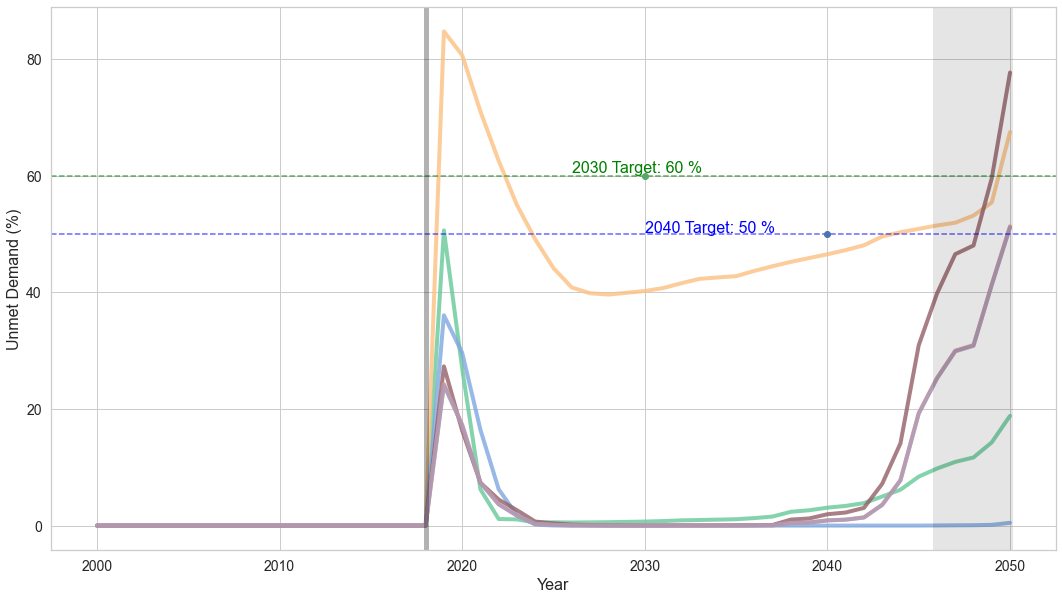

In [434]:
plt.figure(figsize=(18,10))
years = [DT.datetime.strptime(str(int(date)),'%Y') for date in bau_results_df['Time (Year)'].values]
years =  bau_results_df['Time (Year)'].values
#plt.plot( years, bau_results_df['unmetPercentageConsumptionSecondary'], color='black', alpha = 0.8, linewidth=4, label='BAU')
plt.plot( years, outcomes_filteredJTff['unmetPercentageConsumptionSecondary'][selected_indexJT1], color=colorJT_1, alpha = 0.8, linewidth=4, label=labelJT_1)
#plt.plot( years, outcomes_filteredJTff['unmetPercentageConsumptionSecondary'][selected_indexJT2], color=colorJT_2, alpha = 0.8, linewidth=4, label=labelJT_2)
plt.plot( years, outcomes_filteredJTff['unmetPercentageConsumptionSecondary'][selected_indexJT3], color=colorJT_3, alpha = 0.8, linewidth=4, label=labelJT_3)
#plt.plot( years, outcomes_filteredJTff['unmetPercentageConsumptionSecondary'][selected_indexJT4], color=colorJT_4, alpha = 0.8, linewidth=4, label=labelJT_4)
#plt.plot( years, outcomes_filteredJTff['unmetPercentageConsumptionSecondary'][selected_indexJT5], color=colorJT_5, alpha = 0.8, linewidth=4, label=labelJT_5)
#plt.plot( years, outcomes_filteredJTff['unmetPercentageConsumptionSecondary'][selected_indexJT6], color=colorJT_6, alpha = 0.8, linewidth=4, label=labelJT_6)
plt.plot( years, outcomes_filteredJTff['unmetPercentageConsumptionSecondary'][selected_indexJT7], color=colorJT_7, alpha = 0.8, linewidth=4, label=labelJT_7)

## results with second set of input values
plt.plot( years, outcomes_filteredJT2ff['unmetPercentageConsumptionSecondary'][selected_indexJT21], color=colorJT_21, alpha = 0.8, linewidth=4, label=labelJT_21)
plt.plot( years, outcomes_filteredJT2ff['unmetPercentageConsumptionSecondary'][selected_indexJT22], color=colorJT_22, alpha = 0.8, linewidth=4, label=labelJT_22)
plt.plot( years, outcomes_filteredJT2ff['unmetPercentageConsumptionSecondary'][selected_indexJT23], color=colorJT_23, alpha = 0.8, linewidth=4, label=labelJT_23)


# Add dot and corresponding text

target = 60

plt.axhline(  target ,ls='--',color='green', alpha = 0.6)
plt.text(2026, target+0.5, f'2030 Target: {target:.0f} %',color='green', size=16)
plt.plot(2030, target, 'go')

target = 50
plt.axhline(  target ,ls='--',color='blue', alpha = 0.6)
plt.text(2030, target+0.3, f'2040 Target: {target:.0f} %',color='blue', size=16)
plt.plot(2040, target, 'bo')
plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.1, lw = 80)

#plt.grid( linestyle='-', linewidth=1)
plt.xlabel('Year', size=16)
plt.ylabel('Unmet Demand (%)', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
#plt.legend(prop={'size':11}, loc='upper left')

## Other outputs from the selected JT

### Wholesale prices

3.816717386245728 4.479633808135986 6.819169044494629
4.560239791870117 5.60949182510376 9.973535537719728
4.124744892120361 4.937454700469972 15.052196502685549
4.129705905914307 4.87465763092041 9.24257469177246
3.649305820465088 4.1676082611083975 8.03892993927002


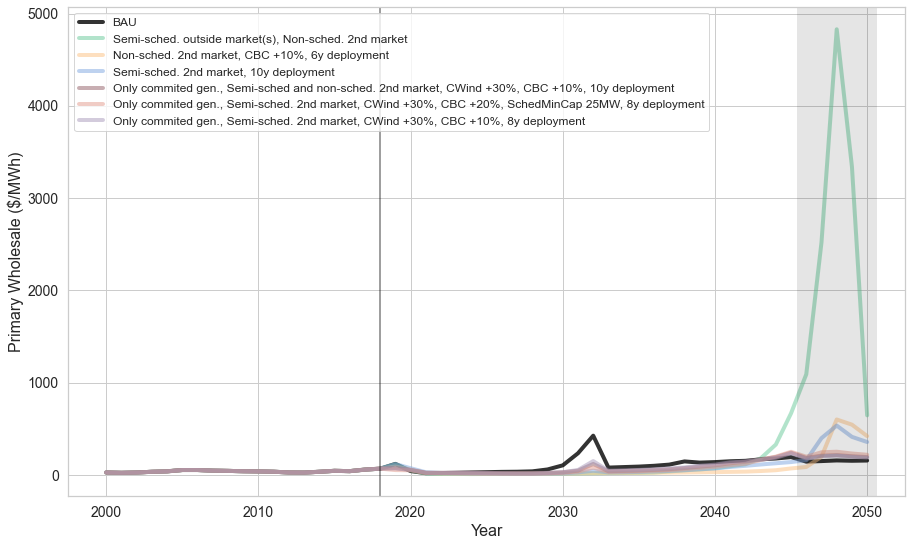

In [435]:
# Wholesale Prices
plt.figure(figsize=(15,9))
years = [DT.datetime.strptime(str(int(date)),'%Y') for date in bau_results_df['Time (Year)'].values]
years =  bau_results_df['Time (Year)'].values

plt.plot( years, bau_results_df['Primary Wholesale ($/MWh)'], color='black', alpha = 0.8, linewidth=4, label='BAU')
plt.plot( years, outcomes_filteredJTff['primaryWholesalePriceYear'][selected_indexJT1], color=colorJT_1, alpha = 0.5, linewidth=4, label=labelJT_1)
#plt.plot( years, outcomes_filteredJTff['primaryWholesalePriceYear'][selected_indexJT2], color=colorJT_2, alpha = 0.5, linewidth=4, label=labelJT_2)
plt.plot( years, outcomes_filteredJTff['primaryWholesalePriceYear'][selected_indexJT3], color=colorJT_3, alpha = 0.5, linewidth=4, label=labelJT_3)
#plt.plot( years, outcomes_filteredJTff['primaryWholesalePriceYear'][selected_indexJT4], color=colorJT_4, alpha = 0.5, linewidth=4, label=labelJT_4)
#plt.plot( years, outcomes_filteredJTff['primaryWholesalePriceYear'][selected_indexJT5], color=colorJT_5, alpha = 0.5, linewidth=4, label=labelJT_5)
#plt.plot( years, outcomes_filteredJTff['primaryWholesalePriceYear'][selected_indexJT6], color=colorJT_6, alpha = 0.5, linewidth=4, label=labelJT_6)
plt.plot( years, outcomes_filteredJTff['primaryWholesalePriceYear'][selected_indexJT7], color=colorJT_7, alpha = 0.5, linewidth=4, label=labelJT_7)

## plots with second set of input values

plt.plot( years, outcomes_filteredJT2ff['primaryWholesalePriceYear'][selected_indexJT21], color=colorJT_21, alpha = 0.5, linewidth=4, label=labelJT_21)
plt.plot( years, outcomes_filteredJT2ff['primaryWholesalePriceYear'][selected_indexJT22], color=colorJT_22, alpha = 0.5, linewidth=4, label=labelJT_22)
plt.plot( years, outcomes_filteredJT2ff['primaryWholesalePriceYear'][selected_indexJT23], color=colorJT_23, alpha = 0.5, linewidth=4, label=labelJT_23)

# val2025_1 = outcomes_filteredJTff['primaryWholesalePriceYear'][selected_indexJT1][2025 - startYear]
# plt.text(2025, val2025_1+120, f'(2025) {(val2025_1):.2f} c/KWh     ',color=colorJT_1)
# plt.plot(2025, val2025_1, 'ro')

# val2030_1 = outcomes_filteredJTff['primaryWholesalePriceYear'][selected_indexJT1][2030 - startYear]
# plt.text(2030, val2030_1+220, f'     (2030) {(val2030_1):.2f} c/KWh',color=colorJT_1)
# plt.plot(2030, val2030_1, 'ro')

# val2040_1= outcomes_filteredJTff['primaryWholesalePriceYear'][selected_indexJT1][2040 - startYear]
# plt.text(2040, val2040_1+120, f'(2040) {(val2040_1):.2f} c/KWh',color=colorJT_1)
# plt.plot(2040, val2040_1, 'ro')

# val2025_2 = outcomes_filteredJTff['primaryWholesalePriceYear'][selected_indexJT2][2025 - startYear]
# plt.text(2025, val2025_2+100, f'(2025) {(val2025_2):.2f} c/KWh     ',color=colorJT_2)
# plt.plot(2025, val2025_2)

# val2030_2 = outcomes_filteredJTff['primaryWholesalePriceYear'][selected_indexJT2][2030 - startYear]
# plt.text(2030, val2030_2+200, f'     (2030) {(val2030_2):.2f} c/KWh',color=colorJT_2)
# plt.plot(2030, val2030_2)

# val2040_2 = outcomes_filteredJTff['primaryWholesalePriceYear'][selected_indexJT2][2040 - startYear]
# plt.text(2040, val2040_2+100, f'(2040) {(val2040_2):.2f} c/KWh',color=colorJT_2)
# plt.plot(2040, val2040_2)

# val2025_3 = outcomes_filteredJTff['primaryWholesalePriceYear'][selected_indexJT3][2025 - startYear]
# plt.text(2025, val2025_3+80, f'(2025) {(val2025_3):.2f} c/KWh     ',color=colorJT_3)
# plt.plot(2025, val2025_3)

# val2030_3 = outcomes_filteredJTff['primaryWholesalePriceYear'][selected_indexJT3][2030 - startYear]
# plt.text(2030, val2030_3+180, f'     (2030) {(val2030_3):.2f} c/KWh',color=colorJT_3)
# plt.plot(2030, val2030_3)

# val2040_3 = outcomes_filteredJTff['primaryWholesalePriceYear'][selected_indexJT3][2040 - startYear]
# plt.text(2040, val2040_3+80, f'(2040) {(val2040_3):.2f} c/KWh',color=colorJT_3)
# plt.plot(2040, val2040_3)

# val2025_4 = outcomes_filteredJTff['primaryWholesalePriceYear'][selected_indexJT4][2025 - startYear]
# plt.text(2025, val2025_4+60, f'(2025) {(val2025_4):.2f} c/KWh     ',color=colorJT_4)
# plt.plot(2025, val2025_4)

# val2030_4 = outcomes_filteredJTff['primaryWholesalePriceYear'][selected_indexJT4][2030 - startYear]
# plt.text(2030, val2030_4+160, f'     (2030) {(val2030_4):.2f} c/KWh',color=colorJT_4)
# plt.plot(2030, val2030_4)

# val2040_4 = outcomes_filteredJTff['primaryWholesalePriceYear'][selected_indexJT4][2040 - startYear]
# plt.text(2040, val2040_4+60, f'(2040) {(val2040_4):.2f} c/KWh',color=colorJT_4)
# plt.plot(2040, val2040_4)

# val2025_5 = outcomes_filteredJTff['primaryWholesalePriceYear'][selected_indexJT5][2025 - startYear]
# plt.text(2025, val2025_5+40, f'(2025) {(val2025_5):.2f} c/KWh     ',color=colorJT_5)
# plt.plot(2025, val2025_5)

# val2030_5 = outcomes_filteredJTff['primaryWholesalePriceYear'][selected_indexJT5][2030 - startYear]
# plt.text(2030, val2030_5+140, f'     (2030) {(val2030_5):.2f} c/KWh',color=colorJT_5)
# plt.plot(2030, val2030_5)

# val2040_5 = outcomes_filteredJTff['primaryWholesalePriceYear'][selected_indexJT5][2040 - startYear]
# plt.text(2040, val2040_5+40, f'(2040) {(val2040_5):.2f} c/KWh',color=colorJT_5)
# plt.plot(2040, val2040_5)

plt.axvline(2018, ls='-',color='black', alpha = 0.5)
plt.axvline(2048, ls='-',color='black', alpha = 0.1, lw = 80)
#plt.ylim([0, 5000])
#plt.grid( linestyle='-', linewidth=1)

print(val2025_1, val2030_1, val2040_1)

print(val2025_2, val2030_2, val2040_2)

print(val2025_3, val2030_3, val2040_3)

print(val2025_4, val2030_4, val2040_4)

print(val2025_5, val2030_5, val2040_5)

plt.xlabel('Year', size=16)
plt.ylabel('Primary Wholesale ($/MWh)', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(prop={'size':12}, loc='upper left')

### Tariffs

3.816717386245728 4.479633808135986 6.819169044494629
4.560239791870117 5.60949182510376 9.973535537719728
4.124744892120361 4.937454700469972 15.052196502685549


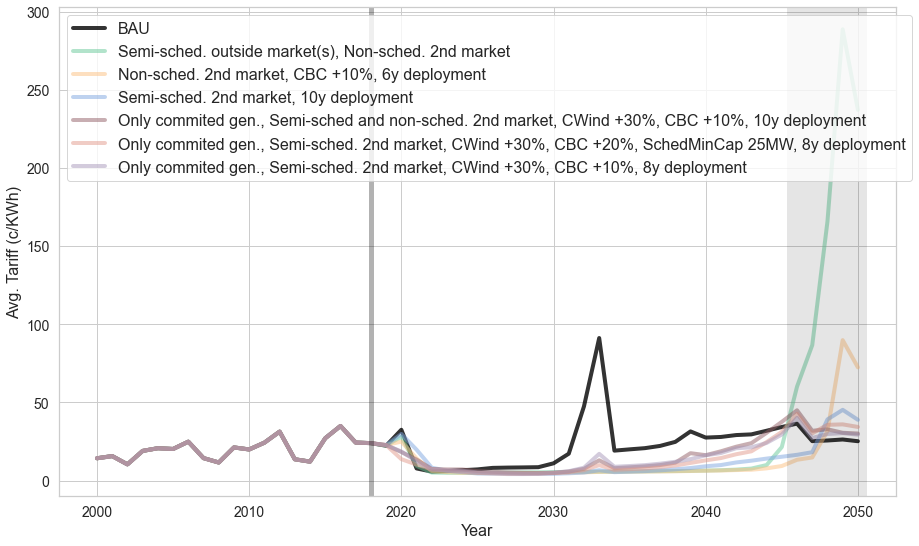

In [436]:
# Tariffs
plt.figure(figsize=(15,9))
years = [DT.datetime.strptime(str(int(date)),'%Y') for date in bau_results_df['Time (Year)'].values]
years =  bau_results_df['Time (Year)'].values
plt.plot( years, bau_results_df['Avg Tariff (c/KWh) per household'], color='black', alpha = 0.8, linewidth=4, label='BAU')
plt.plot( years, outcomes_filteredJTff['tariffsYear'][selected_indexJT1], color=colorJT_1, alpha = 0.5, linewidth=4, label=labelJT_1)
#plt.plot( years, outcomes_filteredJTff['tariffsYear'][selected_indexJT2], color=colorJT_2, alpha = 0.5, linewidth=4, label=labelJT_2)
plt.plot( years, outcomes_filteredJTff['tariffsYear'][selected_indexJT3], color=colorJT_3, alpha = 0.5, linewidth=4, label=labelJT_3)
#plt.plot( years, outcomes_filteredJTff['tariffsYear'][selected_indexJT4], color=colorJT_4, alpha = 0.5, linewidth=4, label=labelJT_4)
#plt.plot( years, outcomes_filteredJTff['tariffsYear'][selected_indexJT5], color=colorJT_5, alpha = 0.5, linewidth=4, label=labelJT_5)
#plt.plot( years, outcomes_filteredJTff['tariffsYear'][selected_indexJT6], color=colorJT_6, alpha = 0.5, linewidth=4, label=labelJT_6)
plt.plot( years, outcomes_filteredJTff['tariffsYear'][selected_indexJT7], color=colorJT_7, alpha = 0.5, linewidth=4, label=labelJT_7)


## results from second set of input values
plt.plot( years, outcomes_filteredJT2ff['tariffsYear'][selected_indexJT21], color=colorJT_21, alpha = 0.5, linewidth=4, label=labelJT_21)
plt.plot( years, outcomes_filteredJT2ff['tariffsYear'][selected_indexJT22], color=colorJT_22, alpha = 0.5, linewidth=4, label=labelJT_22)
plt.plot( years, outcomes_filteredJT2ff['tariffsYear'][selected_indexJT23], color=colorJT_23, alpha = 0.5, linewidth=4, label=labelJT_23)

# val2025_1 = outcomes_filteredJTff['tariffsYear'][selected_indexJT1][2025 - startYear]
# plt.text(2025, val2025_1+120, f'(2025) {(val2025_1):.2f} c/KWh     ',color=colorJT_1)
# plt.plot(2025, val2025_1, 'ro')

# val2030_1 = outcomes_filteredJTff['tariffsYear'][selected_indexJT1][2030 - startYear]
# plt.text(2030, val2030_1+220, f'     (2030) {(val2030_1):.2f} c/KWh',color=colorJT_1)
# plt.plot(2030, val2030_1, 'ro')

# val2040_1= outcomes_filteredJTff['tariffsYear'][selected_indexJT1][2040 - startYear]
# plt.text(2040, val2040_1+120, f'(2040) {(val2040_1):.2f} c/KWh',color=colorJT_1)
# plt.plot(2040, val2040_1, 'ro')

# val2025_2 = outcomes_filteredJTff['tariffsYear'][selected_indexJT2][2025 - startYear]
# plt.text(2025, val2025_2+100, f'(2025) {(val2025_2):.2f} c/KWh     ',color=colorJT_2)
# plt.plot(2025, val2025_2)

# val2030_2 = outcomes_filteredJTff['tariffsYear'][selected_indexJT2][2030 - startYear]
# plt.text(2030, val2030_2+200, f'     (2030) {(val2030_2):.2f} c/KWh',color=colorJT_2)
# plt.plot(2030, val2030_2)

# val2040_2 = outcomes_filteredJTff['tariffsYear'][selected_indexJT2][2040 - startYear]
# plt.text(2040, val2040_2+100, f'(2040) {(val2040_2):.2f} c/KWh',color=colorJT_2)
# plt.plot(2040, val2040_2)

# val2025_3 = outcomes_filteredJTff['tariffsYear'][selected_indexJT3][2025 - startYear]
# plt.text(2025, val2025_3+80, f'(2025) {(val2025_3):.2f} c/KWh     ',color=colorJT_3)
# plt.plot(2025, val2025_3)

# val2030_3 = outcomes_filteredJTff['tariffsYear'][selected_indexJT3][2030 - startYear]
# plt.text(2030, val2030_3+180, f'     (2030) {(val2030_3):.2f} c/KWh',color=colorJT_3)
# plt.plot(2030, val2030_3)

# val2040_3 = outcomes_filteredJTff['tariffsYear'][selected_indexJT3][2040 - startYear]
# plt.text(2040, val2040_3+80, f'(2040) {(val2040_3):.2f} c/KWh',color=colorJT_3)
# plt.plot(2040, val2040_3)

# val2025_4 = outcomes_filteredJTff['tariffsYear'][selected_indexJT4][2025 - startYear]
# plt.text(2025, val2025_4+60, f'(2025) {(val2025_4):.2f} c/KWh     ',color=colorJT_4)
# plt.plot(2025, val2025_4)

# val2030_4 = outcomes_filteredJTff['tariffsYear'][selected_indexJT4][2030 - startYear]
# plt.text(2030, val2030_4+160, f'     (2030) {(val2030_4):.2f} c/KWh',color=colorJT_4)
# plt.plot(2030, val2030_4)

# val2040_4 = outcomes_filteredJTff['tariffsYear'][selected_indexJT4][2040 - startYear]
# plt.text(2040, val2040_4+60, f'(2040) {(val2040_4):.2f} c/KWh',color=colorJT_4)
# plt.plot(2040, val2040_4)

# val2025_5 = outcomes_filteredJTff['tariffsYear'][selected_indexJT5][2025 - startYear]
# plt.text(2025, val2025_5+40, f'(2025) {(val2025_5):.2f} c/KWh     ',color=colorJT_5)
# plt.plot(2025, val2025_5)

# val2030_5 = outcomes_filteredJTff['tariffsYear'][selected_indexJT5][2030 - startYear]
# plt.text(2030, val2030_5+140, f'     (2030) {(val2030_5):.2f} c/KWh',color=colorJT_5)
# plt.plot(2030, val2030_5)

# val2040_5 = outcomes_filteredJTff['tariffsYear'][selected_indexJT5][2040 - startYear]
# plt.text(2040, val2040_5+40, f'(2040) {(val2040_5):.2f} c/KWh',color=colorJT_5)
# plt.plot(2040, val2040_5)

# val2025_6= outcomes_filteredJTff['tariffsYear'][selected_indexJT6][2025 - startYear]
# plt.text(2025, val2025_6+20, f'(2025) {(val2025_6):.2f} c/KWh     ',color=colorJT_6)
# plt.plot(2025, val2025_6)

# val2030_6 = outcomes_filteredJTff['tariffsYear'][selected_indexJT6][2030 - startYear]
# plt.text(2030, val2030_6+120, f'     (2030) {(val2030_6):.2f} c/KWh',color=colorJT_6)
# plt.plot(2030, val2030_6)

# val2040_6 = outcomes_filteredJTff['tariffsYear'][selected_indexJT6][2040 - startYear]
# plt.text(2040, val2040_6+20, f'(2040) {(val2040_6):.2f} c/KWh',color=colorJT_6)
# plt.plot(2040, val2040_6)

# val2025_7= outcomes_filteredJTff['tariffsYear'][selected_indexJT7][2025 - startYear]
# plt.text(2025, val2025_7+0.5, f'(2025) {(val2025_7):.2f} c/KWh     ',color=colorJT_7)
# plt.plot(2025, val2025_7)

# val2030_7 = outcomes_filteredJTff['tariffsYear'][selected_indexJT7][2030 - startYear]
# plt.text(2030, val2030_7+50, f'     (2030) {(val2030_7):.2f} c/KWh',color=colorJT_7)
# plt.plot(2030, val2030_7)

# val2040_7 = outcomes_filteredJTff['tariffsYear'][selected_indexJT7][2040 - startYear]
# plt.text(2040, val2040_7+0.5, f'(2040) {(val2040_7):.2f} c/KWh',color=colorJT_7)
# plt.plot(2040, val2040_7)

plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.1, lw = 80)

#plt.xlim([1998, 2040])
#plt.ylim([0, 20])
#plt.grid( linestyle='-', linewidth=1)
plt.xlabel('Year', size=16)
plt.ylabel('Avg. Tariff (c/KWh)', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(prop={'size':16}, loc='upper left')


print(val2025_1, val2030_1, val2040_1)

print(val2025_2, val2030_2, val2040_2)

print(val2025_3, val2030_3, val2040_3)

# print(val2025_4, val2030_4, val2040_4)

# print(val2025_5, val2030_5, val2040_5)

# print(val2025_6, val2030_6, val2040_6)

# print(val2025_7, val2030_7, val2040_7)


### GHGE

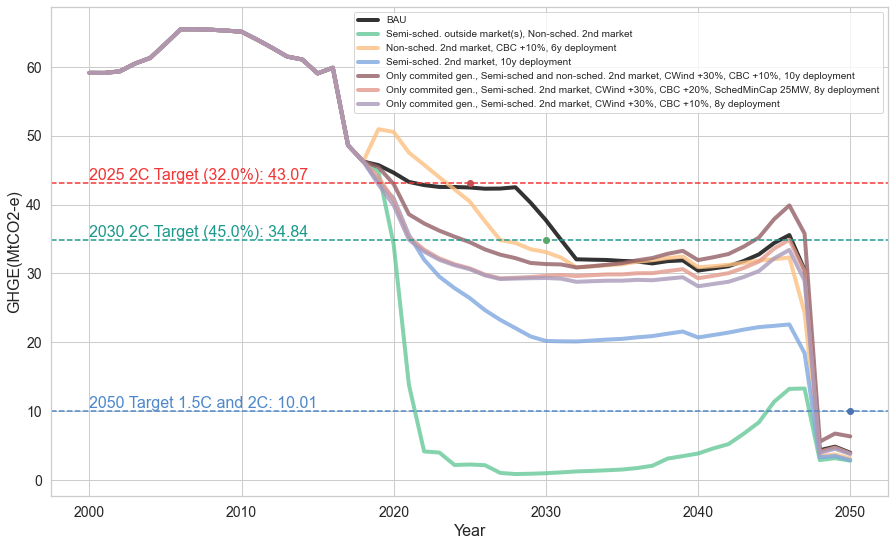

In [437]:
# Figures combinations from box 4 best cases PRIM. Include publically annonced in true and generation retirement changes from 2 to -5.
plt.figure(figsize=(15,9))
years = [DT.datetime.strptime(str(int(date)),'%Y') for date in bau_results_df['Time (Year)'].values]
years =  bau_results_df['Time (Year)'].values

plt.plot( years, bau_results_df['GHGYear'], color='black', alpha = 0.8, linewidth=4, label='BAU')
plt.plot( years, outcomes_filteredJTff['GHGYear'][selected_indexJT1], color=colorJT_1, alpha = 0.8, linewidth=4, label=labelJT_1)
#plt.plot( years, outcomes_filteredJTff['GHGYear'][selected_indexJT2], color=colorJT_2, alpha = 0.8, linewidth=4, label=labelJT_2)
plt.plot( years, outcomes_filteredJTff['GHGYear'][selected_indexJT3], color=colorJT_3, alpha = 0.8, linewidth=4, label=labelJT_3)
#plt.plot( years, outcomes_filteredJTff['GHGYear'][selected_indexJT4], color=colorJT_4, alpha = 0.8, linewidth=4, label=labelJT_4)
#plt.plot( years, outcomes_filteredJTff['GHGYear'][selected_indexJT5], color=colorJT_5, alpha = 0.8, linewidth=4, label=labelJT_5)
#plt.plot( years, outcomes_filteredJTff['GHGYear'][selected_indexJT6], color=colorJT_6, alpha = 0.8, linewidth=4, label=labelJT_6)
plt.plot( years, outcomes_filteredJTff['GHGYear'][selected_indexJT7], color=colorJT_7, alpha = 0.8, linewidth=4, label=labelJT_7)


## results from second set of input values

plt.plot( years, outcomes_filteredJT2ff['GHGYear'][selected_indexJT21], color=colorJT_21, alpha = 0.8, linewidth=4, label=labelJT_21)
plt.plot( years, outcomes_filteredJT2ff['GHGYear'][selected_indexJT22], color=colorJT_22, alpha = 0.8, linewidth=4, label=labelJT_22)
plt.plot( years, outcomes_filteredJT2ff['GHGYear'][selected_indexJT23], color=colorJT_23, alpha = 0.8, linewidth=4, label=labelJT_23)


# Add dot and corresponding text
reference = bau_results_df[bau_results_df['Time (Year)'] == 2005]['GHGYear'].values

reduction = 0.32

plt.axhline((reference - (reference * reduction)), ls='--',color='#f23535', alpha = 1)

plt.text(years[0], reference - (reference * reduction)+.5, f'2025 2C Target ({reduction*100}%): {((reference - (reference * reduction))[0]):.2f}',color='#f23535', size=16)
plt.plot(2025, (reference - (reference * reduction)), 'ro')

# reduction = 0.39

# plt.axhline((reference - (reference * reduction)), ls='--',color='red', alpha = 0.6)

# plt.text(years[0], reference - (reference * reduction)+2, f'2025 Target1.5: {((reference - (reference * reduction))[0]):.2f}',color='red')
# plt.plot(2025, (reference - (reference * reduction)), 'ro')

reduction = 0.45

plt.axhline((reference - (reference * reduction)) ,ls='--',color='#1b9a8c', alpha = 1)
plt.text(years[0], reference - (reference * reduction)+.5, f'2030 2C Target ({reduction*100}%): {((reference - (reference * reduction))[0]):.2f}',color='#1b9a8c', size=16)
plt.plot(2030, (reference - (reference * reduction)), 'go')

# reduction = 0.60

# plt.axhline((reference - (reference * reduction)) ,ls='--',color='green', alpha = 0.6)
# plt.text(years[0], reference - (reference * reduction)+2, f'2030 Target 1.5: {((reference - (reference * reduction))[0]):.2f}',color='green')
# plt.plot(2030, (reference - (reference * reduction)), 'go')

reduction = 0.842

plt.axhline((reference - (reference * reduction)) ,ls='--',color='#4e88cb', alpha = 1)
plt.text(years[0], reference - (reference * reduction)+.5, f'2050 Target 1.5C and 2C: {((reference - (reference * reduction))[0]):.2f}',color='#4e88cb', size=16)
plt.plot(2050, (reference - (reference * reduction)), 'bo')


#plt.grid( linestyle='-', linewidth=1)
plt.xlabel('Year', size=16)
plt.ylabel('GHGE(MtCO2-e)', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(prop={'size':10}, loc='upper right')

### RE

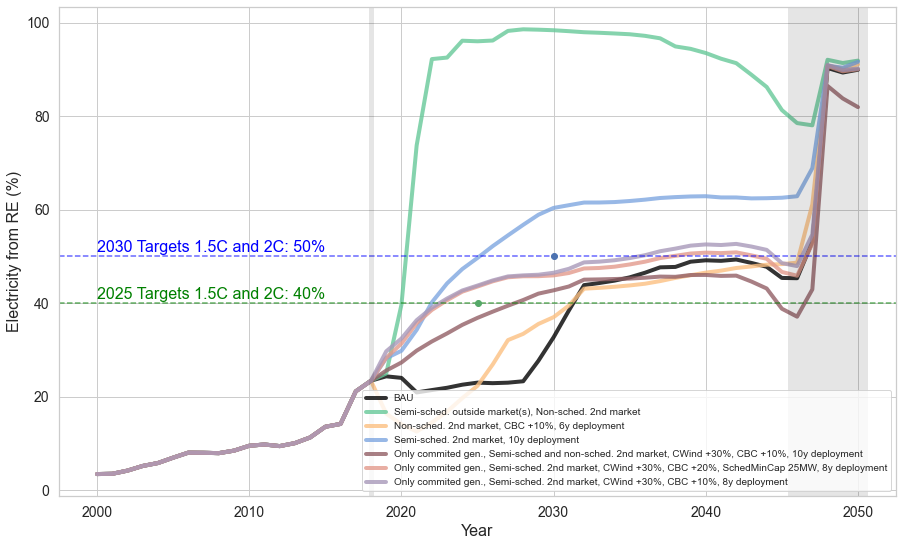

In [438]:
plt.figure(figsize=(15,9))

plt.plot( years, bau_results_df['Percentage Renewable Production']*100, color='black', alpha = 0.8, linewidth=4, label='BAU')
plt.plot( years, outcomes_filteredJTff['renewableContributionYear'][selected_indexJT1]*100, color=colorJT_1, alpha = 0.8, linewidth=4, label=labelJT_1)
#plt.plot( years, outcomes_filteredJTff['renewableContributionYear'][selected_indexJT2]*100, color=colorJT_2, alpha = 0.8, linewidth=4, label=labelJT_2)
plt.plot( years, outcomes_filteredJTff['renewableContributionYear'][selected_indexJT3]*100, color=colorJT_3, alpha = 0.8, linewidth=4, label=labelJT_3)
#plt.plot( years, outcomes_filteredJTff['renewableContributionYear'][selected_indexJT4]*100, color=colorJT_4, alpha = 0.8, linewidth=4, label=labelJT_4)
#plt.plot( years, outcomes_filteredJTff['renewableContributionYear'][selected_indexJT5]*100, color=colorJT_5, alpha = 0.8, linewidth=4, label=labelJT_5)
#plt.plot( years, outcomes_filteredJTff['renewableContributionYear'][selected_indexJT6]*100, color=colorJT_6, alpha = 0.8, linewidth=4, label=labelJT_6)
plt.plot( years, outcomes_filteredJTff['renewableContributionYear'][selected_indexJT7]*100, color=colorJT_7, alpha = 0.8, linewidth=4, label=labelJT_7)

## results from second set of input values
plt.plot( years, outcomes_filteredJT2ff['renewableContributionYear'][selected_indexJT21]*100, color=colorJT_21, alpha = 0.8, linewidth=4, label=labelJT_21)
plt.plot( years, outcomes_filteredJT2ff['renewableContributionYear'][selected_indexJT22]*100, color=colorJT_22, alpha = 0.8, linewidth=4, label=labelJT_22)
plt.plot( years, outcomes_filteredJT2ff['renewableContributionYear'][selected_indexJT23]*100, color=colorJT_23, alpha = 0.8, linewidth=4, label=labelJT_23)


# Add dot and corresponding text

target = 40

plt.axhline(  target ,ls='--',color='green', alpha = 0.6)
plt.text(years[0], target+1, f'2025 Targets 1.5C and 2C: {target:}%',color='green', size=16)
plt.plot(2025, target, 'go')

target = 50
plt.axhline(  target ,ls='--',color='blue', alpha = 0.6)
plt.text(years[0], target+1, f'2030 Targets 1.5C and 2C: {target:}%',color='blue', size=16)
plt.plot(2030, target, 'bo')
plt.axvline(2018, ls='-',color='black', alpha = 0.1, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.1, lw = 80)


#plt.grid( linestyle='-', linewidth=1)
plt.xlabel('Year', size=16)
plt.ylabel('Electricity from RE (%)', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(prop={'size':10}, loc='lower right')

### GA primary market

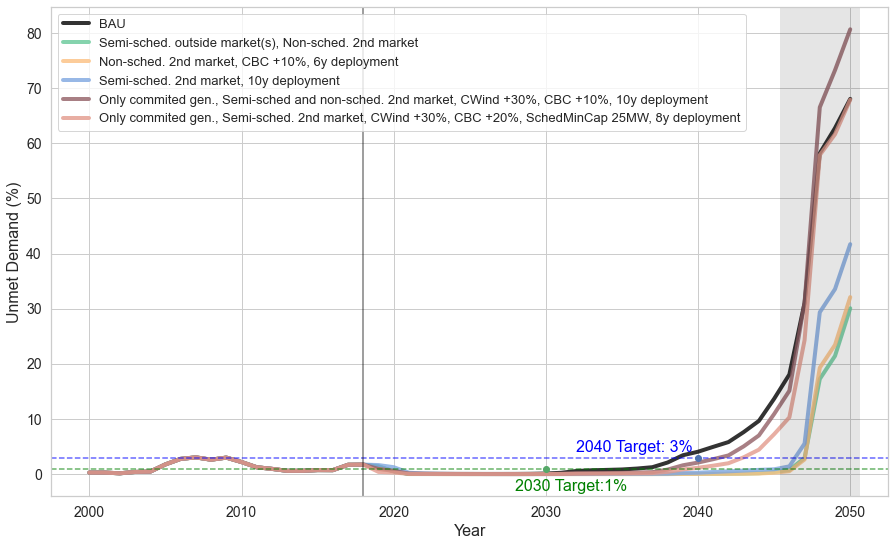

In [439]:
plt.figure(figsize=(15,9))

plt.plot( years, bau_results_df['unmetPercentageConsumptionPrimary'], color='black', alpha = 0.8, linewidth=4, label='BAU')
plt.plot( years, outcomes_filteredJTff['unmetPercentageConsumptionPrimary'][selected_indexJT1], color=colorJT_1, alpha = 0.8, linewidth=4, label=labelJT_1)
#plt.plot( years, outcomes_filteredJTff['unmetPercentageConsumptionPrimary'][selected_indexJT2], color=colorJT_2, alpha = 0.8, linewidth=4, label=labelJT_2)
plt.plot( years, outcomes_filteredJTff['unmetPercentageConsumptionPrimary'][selected_indexJT3], color=colorJT_3, alpha = 0.8, linewidth=4, label=labelJT_3)
#plt.plot( years, outcomes_filteredJTff['unmetPercentageConsumptionPrimary'][selected_indexJT4], color=colorJT_4, alpha = 0.8, linewidth=4, label=labelJT_4)
#plt.plot( years, outcomes_filteredJTff['unmetPercentageConsumptionPrimary'][selected_indexJT5], color=colorJT_5, alpha = 0.8, linewidth=4, label=labelJT_5)
#plt.plot( years, outcomes_filteredJTff['unmetPercentageConsumptionPrimary'][selected_indexJT6], color=colorJT_6, alpha = 0.8, linewidth=4, label=labelJT_6)
plt.plot( years, outcomes_filteredJTff['unmetPercentageConsumptionPrimary'][selected_indexJT7], color=colorJT_7, alpha = 0.8, linewidth=4, label=labelJT_7)

# Results from second set of input values

plt.plot( years, outcomes_filteredJT2ff['unmetPercentageConsumptionPrimary'][selected_indexJT21], color=colorJT_21, alpha = 0.8, linewidth=4, label=labelJT_21)
plt.plot( years, outcomes_filteredJT2ff['unmetPercentageConsumptionPrimary'][selected_indexJT22], color=colorJT_22, alpha = 0.8, linewidth=4, label=labelJT_22)

# Add dot and corresponding text

target = 1

plt.axhline(  target ,ls='--',color='green', alpha = 0.6)
plt.text(years[28], target-4, f'2030 Target:{target:}%',color='green', size=16)
plt.plot(2030, target, 'go')

target = 3
plt.axhline(  target ,ls='--',color='blue', alpha = 0.6)
plt.text(years[32], target+1, f'2040 Target: {target:}%',color='blue', size=16)
plt.plot(2040, target, 'bo')
plt.axvline(2018, ls='-',color='black', alpha = 0.5)
plt.axvline(2048, ls='-',color='black', alpha = 0.1, lw = 80)


#plt.grid( linestyle='-', linewidth=1)
plt.xlabel('Year', size=16)
plt.ylabel('Unmet Demand (%)', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(prop={'size':13}, loc='upper left')

# Load FF ST and EVA


In [440]:
resultsST1ff = load_results(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/gr4sp_ST2021-Aug-31.tar.gz')

resultsST2ff = load_results(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/gr4sp_ST2021-Sep-01.tar.gz')

resultsST3ff = load_results(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/gr4sp_ST2021-Sep-04.tar.gz')

ev_results_ST1_df = pd.read_excel(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/notebookGr4sp/outputs/data/EV_ST2021-Sep-1_all.xlsx', index_col=[0])
ev_results_ST2_df = pd.read_excel(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/notebookGr4sp/outputs/data/EV_ST2021-Sep-2_all.xlsx', index_col=[0])
ev_results_ST3_df = pd.read_excel(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/notebookGr4sp/outputs/data/EV_ST2021-Sep-5_all.xlsx', index_col=[0])

ev_results_BAU_df = pd.read_excel(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/notebookGr4sp/outputs/data/EV_all_BAU.xlsx', index_col=[0])

In [441]:
# Duplicate results from 2040 into the years of 2040-2050
experimentsST1ff, outcomesST1ff = resultsST1ff

ev_results_ST1_df.insert(0, 1999, ev_results_ST1_df[2000])
ev_results_ST1_df.insert(0, 1998, ev_results_ST1_df[2000])


for t in range(2041,2051):
     ev_results_ST1_df[t] = ev_results_ST1_df[2040]
        
# Add it to outcomes data structure
outcomesST1ff['Energy Vulnerability Percentage'] = ev_results_ST1_df.values

# Duplicate results from 2040 into the years of 2040-2050
experimentsST2ff, outcomesST2ff = resultsST2ff

ev_results_ST2_df.insert(0, 1999, ev_results_ST2_df[2000])
ev_results_ST2_df.insert(0, 1998, ev_results_ST2_df[2000])

for t in range(2041,2051):
     ev_results_ST2_df[t] = ev_results_ST2_df[2040]
        
# Add it to outcomes data structure
outcomesST2ff['Energy Vulnerability Percentage'] = ev_results_ST2_df.values

# Duplicate results from 2040 into the years of 2040-2050
experimentsST3ff, outcomesST3ff = resultsST3ff

ev_results_ST3_df.insert(0, 1999, ev_results_ST3_df[2000])
ev_results_ST3_df.insert(0, 1998, ev_results_ST3_df[2000])


for t in range(2041,2051):
     ev_results_ST3_df[t] = ev_results_ST3_df[2040]
        
# Add it to outcomes data structure
outcomesST3ff['Energy Vulnerability Percentage'] = ev_results_ST3_df.values

In [442]:
# Duplicate results BAU from 2040 into the years of 2040-2050
ev_results_BAU_df.insert(0, 1999, ev_results_BAU_df[2000])
ev_results_BAU_df.insert(0, 1998, ev_results_BAU_df[2000])
for t in range(2041,2051):
     ev_results_BAU_df[t] = ev_results_BAU_df[2040]
        
# Add it to outcomes data structure
outcomesST1ff['Energy Vulnerability Percentage'] =  np.append(outcomesST1ff['Energy Vulnerability Percentage'],
                                                         ev_results_BAU_df.values, axis=0)

# Add it to outcomes data structure
outcomesST2ff['Energy Vulnerability Percentage'] =  np.append(outcomesST2ff['Energy Vulnerability Percentage'],
                                                         ev_results_BAU_df.values, axis=0)

# Add it to outcomes data structure
outcomesST3ff['Energy Vulnerability Percentage'] =  np.append(outcomesST3ff['Energy Vulnerability Percentage'],
                                                         ev_results_BAU_df.values, axis=0)

In [443]:
for col in experimentsST1ff:
    print(col, experimentsST1ff[col].unique())

for col in experimentsST2ff:
    print(col, experimentsST2ff[col].unique())
    
for col in experimentsST3ff:
    print(col, experimentsST3ff[col].unique())

consumption [0. 1. 2. 3.]
generatorRetirement [-5, -4, -3, -2, -1, 0, 1]
Categories (7, int64): [-5, -4, -3, -2, -1, 0, 1]
nameplateCapacityChangeWind [-20, -10, 0, 30, 40, 50]
Categories (6, int64): [-20, -10, 0, 30, 40, 50]
nonScheduleGenSpotMarket [ 8.  9. 10.]
priceChangePercentageBrownCoal [-10, 0, 20, 25, 35]
Categories (5, int64): [-10, 0, 20, 25, 35]
priceChangePercentageWind [-50, -20, -15, 0, 10, 30]
Categories (6, int64): [-50, -20, -15, 0, 10, 30]
semiScheduleGenSpotMarket [ 8.  9. 10.]
scenario [0, 1, 2, 3, 4, ..., 45355, 45356, 45357, 45358, 45359]
Length: 45360
Categories (45360, int64): [0, 1, 2, 3, ..., 45356, 45357, 45358, 45359]
policy ['None']
Categories (1, object): ['None']
model ['Gr4sp']
Categories (1, object): ['Gr4sp']
generationRolloutPeriod [1, 3, 5, 7, 10]
Categories (5, int64): [1, 3, 5, 7, 10]
generatorRetirement [-5, -2, 0, 1]
Categories (4, int64): [-5, -2, 0, 1]
nameplateCapacityChangeWater [-10, 0, 20, 45]
Categories (4, int64): [-10, 0, 20, 45]
namep

In [444]:
# FF using the most influential factors for the ST scenario
uncertaintiesST1ff = experimentsST1ff.columns[:-3]

#from startYear
startYear = 2000
startYearShift = (startYear - 1998)

time = outcomesST1ff['TIMEYear'][0, startYearShift:]


# Filter outcomes taking into account the startYear, and removing Seed Experiment info. 
# Seed it is useful if I want to retrieve more info from the csv files, or redo the experiments with the
# simulation parameters
outcomes_filteredST1ff = {k:v[:, startYearShift:] for k,v in outcomesST1ff.items() if k != 'seedExperimentCsv'}


# FF using the most influential factors for the ST scenario
uncertaintiesST2ff = experimentsST2ff.columns[:-3]

#from startYear
startYear = 2000
startYearShift = (startYear - 1998)

time = outcomesST2ff['TIMEYear'][0, startYearShift:]

# Filter outcomes taking into account the startYear, and removing Seed Experiment info. 
# Seed it is useful if I want to retrieve more info from the csv files, or redo the experiments with the
# simulation parameters
outcomes_filteredST2ff = {k:v[:, startYearShift:] for k,v in outcomesST2ff.items() if k != 'seedExperimentCsv'}

# FF using the most influential factors for the ST scenario
uncertaintiesST3ff = experimentsST3ff.columns[:-3]

#from startYear
startYear = 2000
startYearShift = (startYear - 1998)

time = outcomesST3ff['TIMEYear'][0, startYearShift:]


# Filter outcomes taking into account the startYear, and removing Seed Experiment info. 
# Seed it is useful if I want to retrieve more info from the csv files, or redo the experiments with the
# simulation parameters
outcomes_filteredST3ff = {k:v[:, startYearShift:] for k,v in outcomesST3ff.items() if k != 'seedExperimentCsv'}

In [445]:
ooi = 'GHGYear'
data_GHG_household = outcomes_filteredST1ff[ooi]

""" Converts household data in tCO2e into total residential data in MtCO2e"""
data_GHG_residential = (data_GHG_household * outcomes_filteredST1ff['numConsumersYear']) / 1000000.0

""" Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
data_GHG_total = data_GHG_residential / 0.3


"""Overwrite GHG with the data of interest"""
outcomes_filteredST1ff[ooi] = data_GHG_total


ooi = 'consumptionYear'
data_consumption_household = outcomes_filteredST1ff[ooi]

""" Converts household data in KWh into total residential data in MWh"""
data_consumption_residential = (data_consumption_household * outcomes_filteredST1ff['numConsumersYear']) / 1000.0

""" Applies scaling factor used in simulation, so that data represents total consumption, not only residential"""
data_consumption_total = data_consumption_residential / 0.3

"""Overwrite Consumption with the data of interest"""
outcomes_filteredST1ff[ooi] = data_consumption_total

primary = outcomes_filteredST1ff['primarySpotProductionYear']
secondary = outcomes_filteredST1ff['secondarySpotProductionYear']
off = outcomes_filteredST1ff['offSpotProductionYear']
unmetPrimary = outcomes_filteredST1ff['primaryUnmetDemandMwh']
unmetSecondary = outcomes_filteredST1ff['secondaryUnmetDemandMwh']

consumptionPrimary = primary + off + unmetPrimary
consumptionSecondary = secondary + off + unmetSecondary

percentageUnmetPrimary = (unmetPrimary/consumptionPrimary)*100
percentageUnmetSecondary = np.divide(unmetSecondary, consumptionSecondary, 
                                     out=np.zeros_like(unmetSecondary), where=consumptionSecondary!=0) *100

where_are_NaNs = np.isnan(percentageUnmetPrimary)
percentageUnmetPrimary[where_are_NaNs] = 0

where_are_NaNs = np.isnan(percentageUnmetSecondary)
percentageUnmetSecondary[where_are_NaNs] = 0

outcomes_filteredST1ff['unmetPercentageConsumptionPrimary'] = percentageUnmetPrimary
outcomes_filteredST1ff['unmetPercentageConsumptionSecondary'] = percentageUnmetSecondary

In [446]:
ooi = 'GHGYear'
data_GHG_household = outcomes_filteredST2ff[ooi]

""" Converts household data in tCO2e into total residential data in MtCO2e"""
data_GHG_residential = (data_GHG_household * outcomes_filteredST2ff['numConsumersYear']) / 1000000.0

""" Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
data_GHG_total = data_GHG_residential / 0.3


"""Overwrite GHG with the data of interest"""
outcomes_filteredST2ff[ooi] = data_GHG_total


ooi = 'consumptionYear'
data_consumption_household = outcomes_filteredST2ff[ooi]

""" Converts household data in KWh into total residential data in MWh"""
data_consumption_residential = (data_consumption_household * outcomes_filteredST2ff['numConsumersYear']) / 1000.0

""" Applies scaling factor used in simulation, so that data represents total consumption, not only residential"""
data_consumption_total = data_consumption_residential / 0.3

"""Overwrite Consumption with the data of interest"""
outcomes_filteredST2ff[ooi] = data_consumption_total

primary = outcomes_filteredST2ff['primarySpotProductionYear']
secondary = outcomes_filteredST2ff['secondarySpotProductionYear']
off = outcomes_filteredST2ff['offSpotProductionYear']
unmetPrimary = outcomes_filteredST2ff['primaryUnmetDemandMwh']
unmetSecondary = outcomes_filteredST2ff['secondaryUnmetDemandMwh']

consumptionPrimary = primary + off + unmetPrimary
consumptionSecondary = secondary + off + unmetSecondary

percentageUnmetPrimary = (unmetPrimary/consumptionPrimary)*100
percentageUnmetSecondary = np.divide(unmetSecondary, consumptionSecondary, 
                                     out=np.zeros_like(unmetSecondary), where=consumptionSecondary!=0) *100

where_are_NaNs = np.isnan(percentageUnmetPrimary)
percentageUnmetPrimary[where_are_NaNs] = 0

where_are_NaNs = np.isnan(percentageUnmetSecondary)
percentageUnmetSecondary[where_are_NaNs] = 0

outcomes_filteredST2ff['unmetPercentageConsumptionPrimary'] = percentageUnmetPrimary
outcomes_filteredST2ff['unmetPercentageConsumptionSecondary'] = percentageUnmetSecondary

In [447]:
ooi = 'GHGYear'
data_GHG_household = outcomes_filteredST3ff[ooi]

""" Converts household data in tCO2e into total residential data in MtCO2e"""
data_GHG_residential = (data_GHG_household * outcomes_filteredST3ff['numConsumersYear']) / 1000000.0

""" Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
data_GHG_total = data_GHG_residential / 0.3


"""Overwrite GHG with the data of interest"""
outcomes_filteredST3ff[ooi] = data_GHG_total

ooi = 'consumptionYear'
data_consumption_household = outcomes_filteredST3ff[ooi]

""" Converts household data in KWh into total residential data in MWh"""
data_consumption_residential = (data_consumption_household * outcomes_filteredST3ff['numConsumersYear']) / 1000.0

""" Applies scaling factor used in simulation, so that data represents total consumption, not only residential"""
data_consumption_total = data_consumption_residential / 0.3

"""Overwrite Consumption with the data of interest"""
outcomes_filteredST3ff[ooi] = data_consumption_total

primary = outcomes_filteredST3ff['primarySpotProductionYear']
secondary = outcomes_filteredST3ff['secondarySpotProductionYear']
off = outcomes_filteredST3ff['offSpotProductionYear']
unmetPrimary = outcomes_filteredST3ff['primaryUnmetDemandMwh']
unmetSecondary = outcomes_filteredST3ff['secondaryUnmetDemandMwh']

consumptionPrimary = primary + off + unmetPrimary
consumptionSecondary = secondary + off + unmetSecondary

percentageUnmetPrimary = (unmetPrimary/consumptionPrimary)*100
percentageUnmetSecondary = np.divide(unmetSecondary, consumptionSecondary, 
                                     out=np.zeros_like(unmetSecondary), where=consumptionSecondary!=0) *100

where_are_NaNs = np.isnan(percentageUnmetPrimary)
percentageUnmetPrimary[where_are_NaNs] = 0

where_are_NaNs = np.isnan(percentageUnmetSecondary)
percentageUnmetSecondary[where_are_NaNs] = 0

outcomes_filteredST3ff['unmetPercentageConsumptionPrimary'] = percentageUnmetPrimary
outcomes_filteredST3ff['unmetPercentageConsumptionSecondary'] = percentageUnmetSecondary

## Policy mixes ST

- consumption [0. 1. 2. 3.]
- generatorRetirement [-5, -4, -3, -2, -1, 0, 1]
- nameplateCapacityChangeWind [-20, -10, 0, 30, 40, 50]
- nonScheduleGenSpotMarket [ 8.  9. 10.]
- priceChangePercentageBrownCoal [-10, 0, 20, 25, 35]
- priceChangePercentageWind [-50, -20, -15, 0, 10, 30]
- semiScheduleGenSpotMarket [ 8.  9. 10.]

Length: 45360
model [Gr4sp]


Second try with another set of inputs and values (ST2):

- generationRolloutPeriod [1, 3, 5, 7, 10]
- generatorRetirement [-5, -2, 0, 1]
- nameplateCapacityChangeWater [-10, 0, 20, 45]
- nameplateCapacityChangeWind [-20, -10, 0, 35, 50]
- nonScheduleGenSpotMarket [ 9. 10.]
- priceChangePercentageWater [-45, -20, 0, 10, 35]
- semiScheduleGenSpotMarket [ 8.  9. 10.]

Length: 12000
model [Gr4sp]
Categories (1, object): [Gr4sp]

Third try with another set of inputs and values (ST3)
- generationRolloutPeriod [1, 3, 5, 7, 10]
- generatorRetirement [-5, -2, 0, 1]
- nameplateCapacityChangeBrownCoal [-30, -20, -10, 0, 20]
- nameplateCapacityChangeWind [-20, -10, 0, 35, 50]
- nonScheduleGenSpotMarket [ 9. 10.]
- priceChangePercentageWater [-45, -20, 0, 10, 35]
- semiScheduleGenSpotMarket [ 8.  9. 10.]

Length: 15000
model [Gr4sp]
Categories (1, object): [Gr4sp]

In [448]:
def filter_ff_ST1(consumption, 
                 generatorRetirement,
                 nameplateCapacityChangeWind,
                 nonScheduleGenSpotMarket,
                 priceChangePercentageBrownCoal,
                 priceChangePercentageWind, 
                 semiScheduleGenSpotMarket 
                ):

    q1 = experimentsST1ff['nonScheduleGenSpotMarket'] == nonScheduleGenSpotMarket
    q2 = experimentsST1ff['consumption'] == consumption
    q3 = experimentsST1ff['generatorRetirement'] == generatorRetirement
    q4 = experimentsST1ff['nameplateCapacityChangeWind'] == nameplateCapacityChangeWind
    q5 = experimentsST1ff['priceChangePercentageWind'] == priceChangePercentageWind
    q6 = experimentsST1ff['priceChangePercentageBrownCoal'] == priceChangePercentageBrownCoal
    q7 = experimentsST1ff['semiScheduleGenSpotMarket'] == semiScheduleGenSpotMarket

    query = q1 & q2 & q3 & q4 & q5 & q6 & q7
    
    print(np.unique( query , return_counts=True))
    print(experimentsST1ff[ query ])
    
    return experimentsST1ff[ query ].index.values[0]


def filter_ff_ST2(generationRolloutPeriod , 
                 generatorRetirement,
                 nameplateCapacityChangeWind,
                 nameplateCapacityChangeWater ,
                 priceChangePercentageWater, 
                 nonScheduleGenSpotMarket, 
                 semiScheduleGenSpotMarket 
                ):

    q1 = experimentsST2ff['generationRolloutPeriod'] == generationRolloutPeriod
    q2 = experimentsST2ff['generatorRetirement'] == generatorRetirement
    q3 = experimentsST2ff['nameplateCapacityChangeWind'] == nameplateCapacityChangeWind
    q4 = experimentsST2ff['nameplateCapacityChangeWater'] == nameplateCapacityChangeWater
    q5 = experimentsST2ff['priceChangePercentageWater'] == priceChangePercentageWater
    q6 = experimentsST2ff['nonScheduleGenSpotMarket'] == nonScheduleGenSpotMarket
    q7 = experimentsST2ff['semiScheduleGenSpotMarket'] == semiScheduleGenSpotMarket

    query = q1 & q2 & q3 & q4 & q5 & q6 & q7
    
    print(np.unique( query , return_counts=True))
    print(experimentsST2ff[ query ])
    
    return experimentsST2ff[ query ].index.values[0]

def filter_ff_ST3(generationRolloutPeriod , 
                 generatorRetirement,
                 nameplateCapacityChangeBrownCoal,
                 nameplateCapacityChangeWind,
                 priceChangePercentageWater, 
                 nonScheduleGenSpotMarket, 
                 semiScheduleGenSpotMarket 
                ):

    q1 = experimentsST3ff['generationRolloutPeriod'] == generationRolloutPeriod
    q2 = experimentsST3ff['generatorRetirement'] == generatorRetirement
    q3 = experimentsST3ff['nameplateCapacityChangeWind'] == nameplateCapacityChangeWind
    q4 = experimentsST3ff['nameplateCapacityChangeBrownCoal'] == nameplateCapacityChangeBrownCoal
    q5 = experimentsST3ff['priceChangePercentageWater'] == priceChangePercentageWater
    q6 = experimentsST3ff['nonScheduleGenSpotMarket'] == nonScheduleGenSpotMarket
    q7 = experimentsST3ff['semiScheduleGenSpotMarket'] == semiScheduleGenSpotMarket

    query = q1 & q2 & q3 & q4 & q5 & q6 & q7
    
    print(np.unique( query , return_counts=True))
    print(experimentsST3ff[ query ])
    
    return experimentsST3ff[ query ].index.values[0]

In [449]:
selected_indexST11 = filter_ff_ST1(consumption = 0,
                                 generatorRetirement = 0,
                                 nameplateCapacityChangeWind = 0,
                                 priceChangePercentageBrownCoal = 0,
                                 priceChangePercentageWind = 0, 
                                 semiScheduleGenSpotMarket = 10,
                                 nonScheduleGenSpotMarket = 9,
                                )

# selected_indexST12 = filter_ff_ST1(consumption = 0,
#                                  generatorRetirement = 1,
#                                  nameplateCapacityChangeWind = -20,
#                                  priceChangePercentageBrownCoal = 35,
#                                  priceChangePercentageWind = 0, 
#                                  semiScheduleGenSpotMarket = 8,
#                                  nonScheduleGenSpotMarket = 9,
#                                 )

selected_indexST13 = filter_ff_ST1(consumption = 0,
                                 generatorRetirement = 0,
                                 nameplateCapacityChangeWind = 0,
                                 priceChangePercentageBrownCoal = 20,
                                 priceChangePercentageWind = -15, 
                                 semiScheduleGenSpotMarket = 8,
                                 nonScheduleGenSpotMarket = 9,
                                )

# selected_indexST14 = filter_ff_ST1(consumption = 0,
#                                  generatorRetirement = 0,
#                                  nameplateCapacityChangeWind = 30,
#                                  priceChangePercentageBrownCoal = 20,
#                                  priceChangePercentageWind = -15, 
#                                  semiScheduleGenSpotMarket = 8,
#                                  nonScheduleGenSpotMarket = 9,
#                                 )

# selected_indexST15 = filter_ff_ST1(consumption = 0,
#                                  generatorRetirement = 0,
#                                  nameplateCapacityChangeWind = 0,
#                                  priceChangePercentageBrownCoal = 0,
#                                  priceChangePercentageWind = -20, 
#                                  semiScheduleGenSpotMarket = 8,
#                                  nonScheduleGenSpotMarket = 9,
#                                 )

# selected_indexST21 = filter_ff_ST2(generationRolloutPeriod = 1,
#                                  generatorRetirement = 0,
#                                  nameplateCapacityChangeWind = 0,
#                                  nameplateCapacityChangeWater = 0,
#                                  priceChangePercentageWater = 0, 
#                                  semiScheduleGenSpotMarket = 10,
#                                  nonScheduleGenSpotMarket = 9,
#                                 )

# if genRollout in ST22 is changed from 3 to 1 it increments the electricity tariffs and LIHC, however it achieves GHGE and RE targets
selected_indexST22 = filter_ff_ST2(generationRolloutPeriod = 3,
                                 generatorRetirement = 0,
                                 nameplateCapacityChangeWind =0,
                                 nameplateCapacityChangeWater = 45,
                                 priceChangePercentageWater = -20, 
                                 semiScheduleGenSpotMarket = 9,
                                 nonScheduleGenSpotMarket = 10,
                                )

# selected_indexST23 = filter_ff_ST2(generationRolloutPeriod = 5,
#                                  generatorRetirement = -5,
#                                  nameplateCapacityChangeWind =35,
#                                  nameplateCapacityChangeWater = 45,
#                                  priceChangePercentageWater = -45, 
#                                  semiScheduleGenSpotMarket = 8,
#                                  nonScheduleGenSpotMarket = 9,
#                                 )

selected_indexST24 = filter_ff_ST2(generationRolloutPeriod= 7,
                                 generatorRetirement = 0,
                                 nameplateCapacityChangeWind = 0,
                                 nameplateCapacityChangeWater = 20,
                                 priceChangePercentageWater = -20, 
                                 semiScheduleGenSpotMarket = 8,
                                 nonScheduleGenSpotMarket = 9,
                                )

# selected_indexST25 = filter_ff_ST2(generationRolloutPeriod = 7,
#                                  generatorRetirement = -5,
#                                  nameplateCapacityChangeWind = 0,
#                                  nameplateCapacityChangeWater = 0,
#                                  priceChangePercentageWater = -20, 
#                                  semiScheduleGenSpotMarket = 8,
#                                  nonScheduleGenSpotMarket = 9,
#                                 )

# selected_indexST31 = filter_ff_ST3(generationRolloutPeriod = 5,
#                                  generatorRetirement = 0,
#                                  nameplateCapacityChangeWind = 35,
#                                  nameplateCapacityChangeBrownCoal = -30,
#                                  priceChangePercentageWater = -45, 
#                                  semiScheduleGenSpotMarket = 8,
#                                  nonScheduleGenSpotMarket = 9,
#                                 )

selected_indexST32 = filter_ff_ST3(generationRolloutPeriod = 7,
                                 generatorRetirement = 0,
                                 nameplateCapacityChangeWind = 0,
                                 nameplateCapacityChangeBrownCoal = -20,
                                 priceChangePercentageWater = -20, 
                                 semiScheduleGenSpotMarket = 8,
                                 nonScheduleGenSpotMarket = 9,
                                )

# selected_indexST33 = filter_ff_ST3(generationRolloutPeriod = 5,
#                                  generatorRetirement = -2,
#                                  nameplateCapacityChangeWind = 0,
#                                  nameplateCapacityChangeBrownCoal = -30,
#                                  priceChangePercentageWater = -20, 
#                                  semiScheduleGenSpotMarket = 8,
#                                  nonScheduleGenSpotMarket = 9,
#                                 )

selected_indexST34 = filter_ff_ST3(generationRolloutPeriod = 5,
                                 generatorRetirement = -5,
                                 nameplateCapacityChangeWind = 0,
                                 nameplateCapacityChangeBrownCoal = -20,
                                 priceChangePercentageWater = -20, 
                                 semiScheduleGenSpotMarket = 8,
                                 nonScheduleGenSpotMarket = 9,
                                )

# selected_indexST35 = filter_ff_ST3(generationRolloutPeriod = 7,
#                                  generatorRetirement = -2,
#                                  nameplateCapacityChangeWind = -10,
#                                  nameplateCapacityChangeBrownCoal = -20,
#                                  priceChangePercentageWater = -20, 
#                                  semiScheduleGenSpotMarket = 9,
#                                  nonScheduleGenSpotMarket = 10,
#                                 )




(array([False,  True]), array([45359,     1], dtype=int64))
      consumption generatorRetirement nameplateCapacityChangeWind  \
8759          0.0                   0                           0   

      nonScheduleGenSpotMarket priceChangePercentageBrownCoal  \
8759                       9.0                              0   

     priceChangePercentageWind  semiScheduleGenSpotMarket scenario policy  \
8759                         0                       10.0     8759   None   

      model  
8759  Gr4sp  
(array([False,  True]), array([45359,     1], dtype=int64))
      consumption generatorRetirement nameplateCapacityChangeWind  \
8772          0.0                   0                           0   

      nonScheduleGenSpotMarket priceChangePercentageBrownCoal  \
8772                       9.0                             20   

     priceChangePercentageWind  semiScheduleGenSpotMarket scenario policy  \
8772                       -15                        8.0     8772   None   

  

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

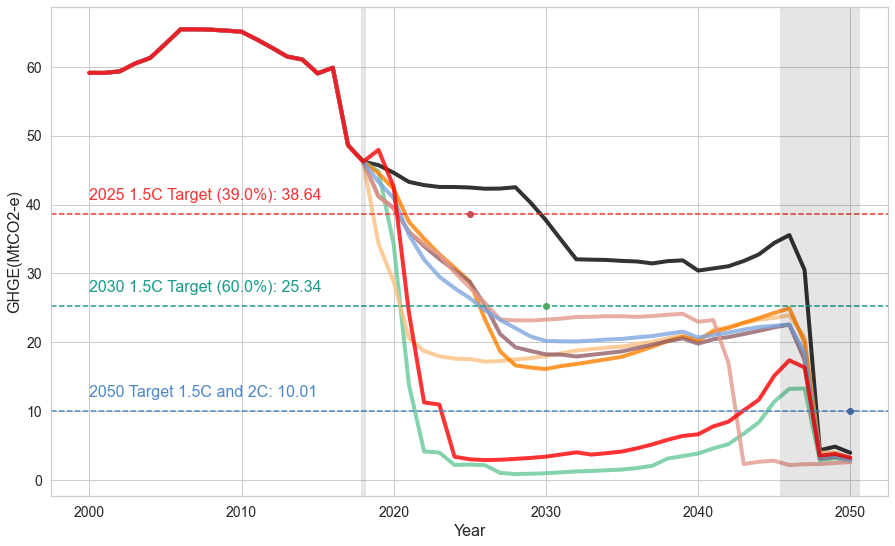

In [450]:
labelST_1 = 'Semi-sched. outside market(s), non-sched. 2nd market'
labelST_2 = 'Semi-sched. 2nd market, CWater +45%, PWater -20%, GentRoll +3y'
labelST_3 = 'Non-sched. 2nd market, CWater +20%, PWater -20%, GentRoll +10y'
labelST_4 = 'Non-sched. 2nd market, CBC -20%, PWater -20%, GentRoll +7y'
labelST_5 = 'Non-sched. 2nd market, CBC -20%, PWater -20%, GentRoll +5y, GenRet -5y'

colorSt_1 = '#67C999' #Green
colorSt_2 = '#FCC081' #Light yellow/orange
colorSt_3 = '#FF8000' #orange
colorSt_4 = '#925F66' #palo de rosa
colorSt_5 = '#E39A8C' # Pink

labelSTwoutSecMarkTarg = 'Non-sched. 2nd market, PBC +20%, PWind -15%'
plt.figure(figsize=(15,9))
years = [DT.datetime.strptime(str(int(date)),'%Y') for date in bau_results_df['Time (Year)'].values]
years =  bau_results_df['Time (Year)'].values

plt.plot( years, bau_results_df['GHGYear'], color='black', alpha = 0.8, linewidth=4, label='BAU')

plt.plot( years, outcomes_filteredST1ff['GHGYear'][selected_indexST11], color=colorSt_1, alpha = 0.8, linewidth=4, label=labelST_1)
plt.plot( years, outcomes_filteredST2ff['GHGYear'][selected_indexST22], color=colorSt_2, alpha = 0.8, linewidth=4, label=labelST_2)
plt.plot( years, outcomes_filteredST2ff['GHGYear'][selected_indexST24], color=colorSt_3, alpha = 0.8, linewidth=4, label=labelST_3)
plt.plot( years, outcomes_filteredST3ff['GHGYear'][selected_indexST32], color=colorSt_4, alpha = 0.8, linewidth=4, label=labelST_4)
plt.plot( years, outcomes_filteredST3ff['GHGYear'][selected_indexST34], color=colorSt_5, alpha = 0.8, linewidth=4, label=labelST_5)
#plt.plot( years, outcomes_filteredSTff['GHGYear'][selected_indexST5], color=colorSt_5, alpha = 0.8, linewidth=4, label=labelST_5)
plt.plot( years, outcomes_filteredJTff['GHGYear'][selected_indexJT7], color=colorJT_7, alpha = 0.8, linewidth=4, label=labelJT_7)
## test

plt.plot( years, outcomes_filteredST1ff['GHGYear'][selected_indexST13], color='red', alpha = 0.8, linewidth=4, label=labelSTwoutSecMarkTarg)


# Add dot and corresponding text
reference = bau_results_df[bau_results_df['Time (Year)'] == 2005]['GHGYear'].values

reduction = 0.39

plt.axhline((reference - (reference * reduction)), ls='--',color='#f23535', alpha = 1)

plt.text(years[0], reference - (reference * reduction)+2, f'2025 1.5C Target ({reduction*100}%): {((reference - (reference * reduction))[0]):.2f}',color='#f23535', size=16)
plt.plot(2025, (reference - (reference * reduction)), 'ro')

# reduction = 0.32

# plt.axhline((reference - (reference * reduction)), ls='--',color='red', alpha = 0.6)

# plt.text(years[0], reference - (reference * reduction)+2, f'2025 Target1.5: {((reference - (reference * reduction))[0]):.2f}',color='red')
# plt.plot(2025, (reference - (reference * reduction)), 'ro')

reduction = 0.6

plt.axhline((reference - (reference * reduction)) ,ls='--',color='#1b9a8c', alpha = 1)
plt.text(years[0], reference - (reference * reduction)+2, f'2030 1.5C Target ({reduction*100}%): {((reference - (reference * reduction))[0]):.2f}',color='#1b9a8c', size=16)
plt.plot(2030, (reference - (reference * reduction)), 'go')

# reduction = 0.45

# plt.axhline((reference - (reference * reduction)) ,ls='--',color='green', alpha = 0.6)
# plt.text(years[0], reference - (reference * reduction)+2, f'2030 Target 1.5: {((reference - (reference * reduction))[0]):.2f}',color='green')
# plt.plot(2030, (reference - (reference * reduction)), 'go')

reduction = 0.842

plt.axhline((reference - (reference * reduction)) ,ls='--',color='#4e88cb', alpha = 1)
plt.text(years[0], reference - (reference * reduction)+2, f'2050 Target 1.5C and 2C: {((reference - (reference * reduction))[0]):.2f}',color='#4e88cb', size=16)
plt.plot(2050, (reference - (reference * reduction)), 'bo')

plt.axvline(2018, ls='-',color='black', alpha = 0.1, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.1, lw = 80)

#plt.grid( linestyle='-', linewidth=1)
plt.xlabel('Year', size=16)
plt.ylabel('GHGE(MtCO2-e)', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
#plt.legend(prop={'size':12}, loc='upper right')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

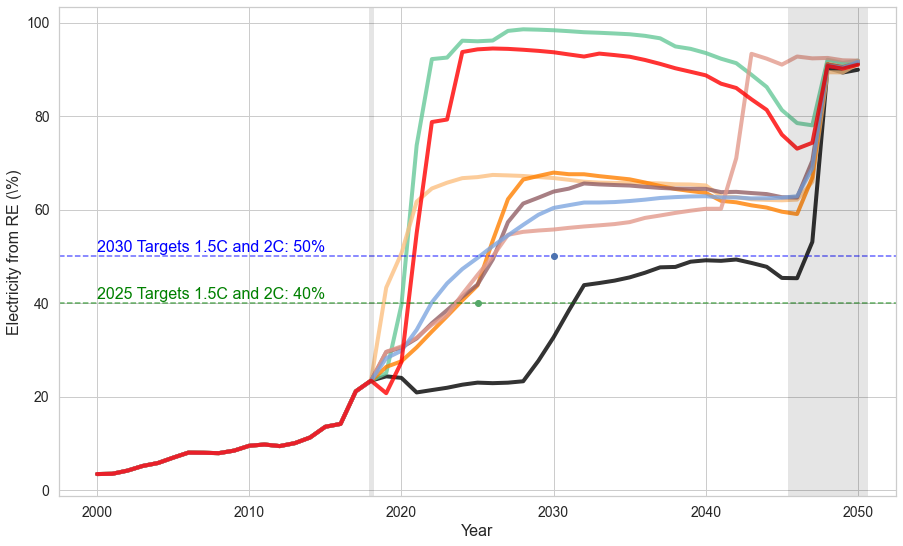

In [451]:
plt.figure(figsize=(15,9))

plt.plot( years, bau_results_df['Percentage Renewable Production']*100, color='black', alpha = 0.8, linewidth=4, label='BAU')
plt.plot( years, outcomes_filteredST1ff['renewableContributionYear'][selected_indexST11]*100, color=colorSt_1, alpha = 0.8, linewidth=4, label=labelST_1)
plt.plot( years, outcomes_filteredST2ff['renewableContributionYear'][selected_indexST22]*100, color=colorSt_2, alpha = 0.8, linewidth=4, label=labelST_2)
plt.plot( years, outcomes_filteredST2ff['renewableContributionYear'][selected_indexST24]*100, color=colorSt_3, alpha = 0.8, linewidth=4, label=labelST_3)
plt.plot( years, outcomes_filteredST3ff['renewableContributionYear'][selected_indexST32]*100, color=colorSt_4, alpha = 0.8, linewidth=4, label=labelST_4)
plt.plot( years, outcomes_filteredST3ff['renewableContributionYear'][selected_indexST34]*100, color=colorSt_5, alpha = 0.8, linewidth=4, label=labelST_5)
plt.plot( years, outcomes_filteredJTff['renewableContributionYear'][selected_indexJT7]*100, color=colorJT_7, alpha = 0.8, linewidth=4, label=labelJT_7)

# Add dot and corresponding text
# test
plt.plot( years, outcomes_filteredST1ff['renewableContributionYear'][selected_indexST13]*100, color='red', alpha = 0.8, linewidth=4, label=labelSTwoutSecMarkTarg)


target = 40

plt.axhline(  target ,ls='--',color='green', alpha = 0.6)
plt.text(years[0], target+1, f'2025 Targets 1.5C and 2C: {target:}%',color='green',size=16)
plt.plot(2025, target, 'go')

target = 50
plt.axhline(  target ,ls='--',color='blue', alpha = 0.6)
plt.text(years[0], target+1, f'2030 Targets 1.5C and 2C: {target:}%',color='blue', size=16)
plt.plot(2030, target, 'bo')
plt.axvline(2018, ls='-',color='black', alpha = 0.1, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.1, lw = 80)


#plt.grid( linestyle='-', linewidth=1)
plt.xlabel('Year', size=16)
plt.ylabel('Electricity from RE (\%)', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)

#plt.legend(prop={'size':12}, loc="upper left")

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

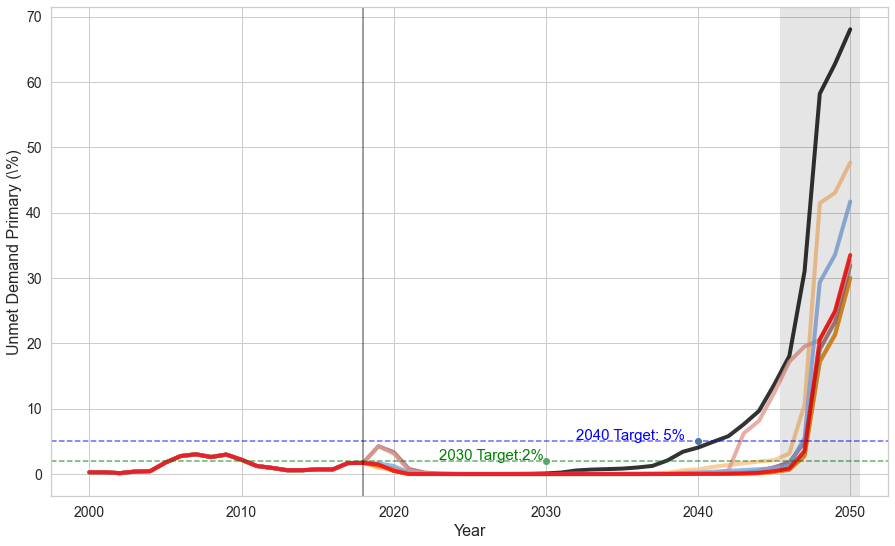

In [452]:
plt.figure(figsize=(15,9))

plt.plot( years, bau_results_df['unmetPercentageConsumptionPrimary'], color='black', alpha = 0.8, linewidth=4, label='BAU')
plt.plot( years, outcomes_filteredST1ff['unmetPercentageConsumptionPrimary'][selected_indexST11], color=colorSt_1, alpha = 0.8, linewidth=4, label=labelST_1)
plt.plot( years, outcomes_filteredST2ff['unmetPercentageConsumptionPrimary'][selected_indexST22], color=colorSt_2, alpha = 0.8, linewidth=4, label=labelST_2)
plt.plot( years, outcomes_filteredST2ff['unmetPercentageConsumptionPrimary'][selected_indexST24], color=colorSt_3, alpha = 0.8, linewidth=4, label=labelST_3)
plt.plot( years, outcomes_filteredST3ff['unmetPercentageConsumptionPrimary'][selected_indexST32], color=colorSt_4, alpha = 0.8, linewidth=4, label=labelST_4)
plt.plot( years, outcomes_filteredST3ff['unmetPercentageConsumptionPrimary'][selected_indexST34], color=colorSt_5, alpha = 0.8, linewidth=4, label=labelST_5)
plt.plot( years, outcomes_filteredJTff['unmetPercentageConsumptionPrimary'][selected_indexJT7], color=colorJT_7, alpha = 0.8, linewidth=4, label=labelJT_7)

# Add dot and corresponding text
# test 
plt.plot( years, outcomes_filteredST1ff['unmetPercentageConsumptionPrimary'][selected_indexST13], color='red', alpha = 0.8, linewidth=4, label=labelSTwoutSecMarkTarg)

target = 2

plt.axhline(  target ,ls='--',color='green', alpha = 0.6)
plt.text(years[23], target+0.1, f'2030 Target:{target:}%',color='green', size=15)
plt.plot(2030, target, 'go')

target = 5
plt.axhline( target ,ls='--',color='blue', alpha = 0.6)
plt.text(years[32], target+0.2, f'2040 Target: {target:}%',color='blue', size=15)
plt.plot(2040, target, 'bo')
plt.axvline(2018, ls='-',color='black', alpha = 0.5)
plt.axvline(2048, ls='-',color='black', alpha = 0.1, lw = 80)


#plt.grid( linestyle='-', linewidth=1)
plt.xlabel('Year', size=16)
plt.ylabel('Unmet Demand Primary (\%)', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
#plt.legend(prop={'size':16}, loc='upper left')

(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

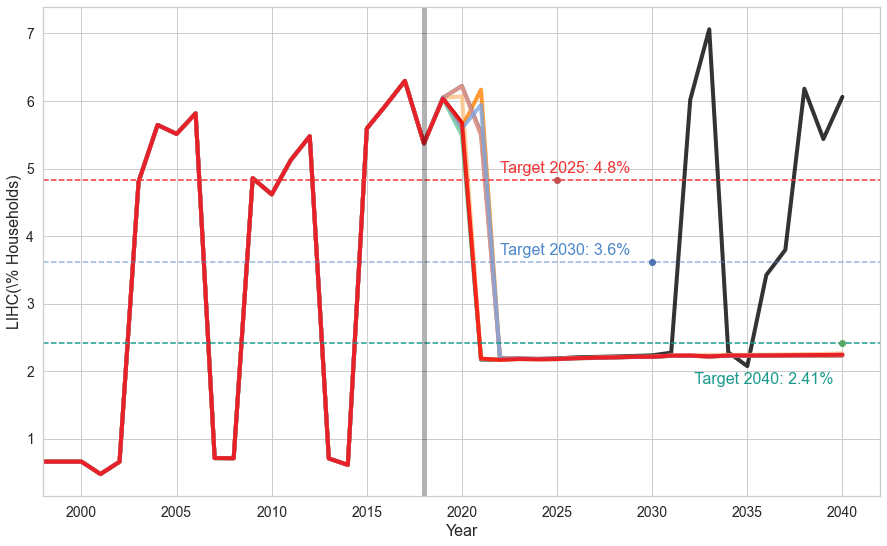

In [453]:
# Figures combinations from box 4 best cases PRIM. Include publically annonced in true and generation retirement changes from 2 to -5.
plt.figure(figsize=(15,9))
years = ev_results_BAU_df.T.index.values

plt.plot( years[:-10], ev_results_BAU_df.values[0][:-10] * 100, color='black', alpha = 0.8, linewidth=4, label='BAU')
plt.plot( years[:-10], ev_results_ST1_df.iloc[selected_indexST11].values[:-10] * 100, color=colorSt_1, alpha = 0.8, linewidth=4, label=labelST_1)
plt.plot( years[:-10], ev_results_ST2_df.iloc[selected_indexST22].values[:-10] * 100, color=colorSt_2, alpha = 0.8, linewidth=4, label=labelST_2)
plt.plot( years[:-10], ev_results_ST2_df.iloc[selected_indexST24].values[:-10] * 100, color=colorSt_3, alpha = 0.8, linewidth=4, label=labelST_3)
plt.plot( years[:-10], ev_results_ST3_df.iloc[selected_indexST32].values[:-10] * 100, color=colorSt_4, alpha = 0.8, linewidth=4, label=labelST_4)
plt.plot( years[:-10], ev_results_ST3_df.iloc[selected_indexST34].values[:-10] * 100, color=colorSt_5, alpha = 0.8, linewidth=4, label=labelST_5)
plt.plot( years[:-10], ev_results_JT_df.iloc[selected_indexJT7].values[:-10] * 100, color=colorJT_7, alpha = 0.8, linewidth=4, label=labelJT_7)

# Add dot and corresponding text
#test
plt.plot( years[:-10], ev_results_ST1_df.iloc[selected_indexST13].values[:-10] * 100, color='red', alpha = 0.8, linewidth=4, label=labelSTwoutSecMarkTarg)


ooi = 'Energy Vulnerability Percentage'    

referenceYear = 2019
reference = ev_results_BAU_df[referenceYear].values * 100
reduction = 0.2

plt.axhline((reference - (reference * reduction)), ls='--',color='#f23535', alpha = 1)

plt.text(years[24], reference - (reference * reduction)+.1, f'Target 2025: {((reference - (reference * reduction))[0]):.1f}%',color='#f23535', size =16)
plt.plot(2025, (reference - (reference * reduction)), 'ro')

reduction = 0.4

plt.axhline((reference - (reference * reduction)), ls='--',color='#4e88cb', alpha = 0.6)

plt.text(years[24], reference - (reference * reduction)+.1, f'Target 2030: {((reference - (reference * reduction))[0]):.1f}%',color='#4e88cb', size=16)
plt.plot(2030, (reference - (reference * reduction)), 'bo')

reduction = 0.6
# ({reduction*100}%)
plt.axhline((reference - (reference * reduction)) ,ls='--',color='#1b9a8c', alpha = 1)
plt.text(years[34], reference - (reference * reduction)-.6, f' Target 2040: {((reference - (reference * reduction))[0]):.2f}%',color='#1b9a8c', size=16)
plt.plot(2040, (reference - (reference * reduction)), 'go')

plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.1, lw = 80)

plt.xlim([1998, 2042])
plt.xlabel('Year', size=16)
plt.ylabel('LIHC(\% Households)', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
#plt.legend(prop={'size':12}, loc='upper left')

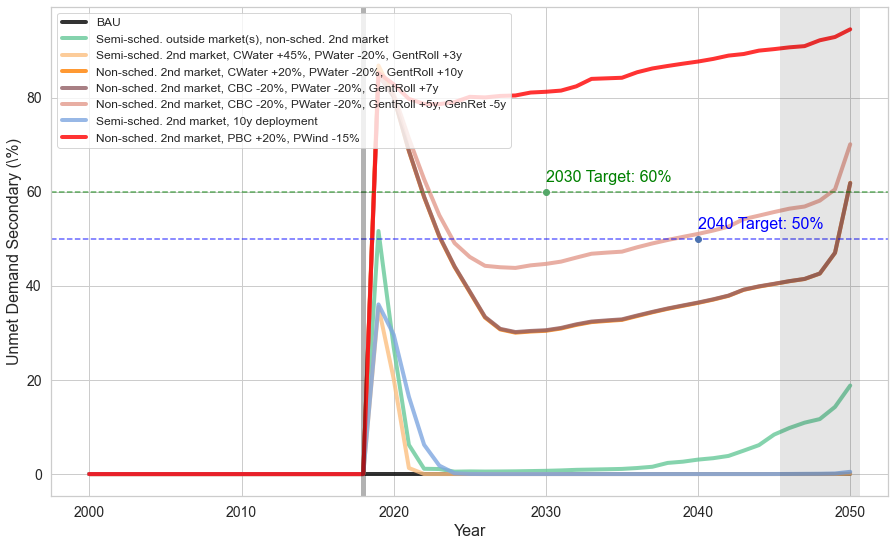

In [454]:
plt.figure(figsize=(15,9))
#15,8 
years = [DT.datetime.strptime(str(int(date)),'%Y') for date in bau_results_df['Time (Year)'].values]
years =  bau_results_df['Time (Year)'].values
plt.plot( years, bau_results_df['unmetPercentageConsumptionSecondary'], color='black', alpha = 0.8, linewidth=4, label='BAU')
plt.plot( years, outcomes_filteredST1ff['unmetPercentageConsumptionSecondary'][selected_indexST11], color=colorSt_1, alpha = 0.8, linewidth=4, label=labelST_1)
plt.plot( years, outcomes_filteredST2ff['unmetPercentageConsumptionSecondary'][selected_indexST22], color=colorSt_2, alpha = 0.8, linewidth=4, label=labelST_2)
plt.plot( years, outcomes_filteredST2ff['unmetPercentageConsumptionSecondary'][selected_indexST24], color=colorSt_3, alpha = 0.8, linewidth=4, label=labelST_3)
plt.plot( years, outcomes_filteredST3ff['unmetPercentageConsumptionSecondary'][selected_indexST32], color=colorSt_4, alpha = 0.8, linewidth=4, label=labelST_4)
plt.plot( years, outcomes_filteredST3ff['unmetPercentageConsumptionSecondary'][selected_indexST34], color=colorSt_5, alpha = 0.8, linewidth=4, label=labelST_5)
#scenario for ST fromt the JT search
plt.plot( years, outcomes_filteredJTff['unmetPercentageConsumptionSecondary'][selected_indexJT7], color=colorJT_7, alpha = 0.8, linewidth=4, label=labelJT_7)

# Add dot and corresponding text
# test
plt.plot( years, outcomes_filteredST1ff['unmetPercentageConsumptionSecondary'][selected_indexST13], color='red', alpha = 0.8, linewidth=4, label=labelSTwoutSecMarkTarg)

target = 60

plt.axhline( target ,ls='--',color='green', alpha = 0.6)
plt.text(2030, target+2, f'2030 Target: {target:.0f}%',color='green',size=16)
plt.plot(2030, target, 'go')

target = 50
plt.axhline( target ,ls='--',color='blue', alpha = 0.6)
plt.text(2040, target+2, f'2040 Target: {target:.0f}%',color='blue',size=16)
plt.plot(2040, target, 'bo')

plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.1, lw = 80)

#plt.grid( linestyle='-', linewidth=1)
plt.xlabel('Year', size=16)
plt.ylabel('Unmet Demand Secondary (\%)', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(prop={'size':12}, loc = "upper left")

## Other outputs from the selected ST

### Wholesale Prices

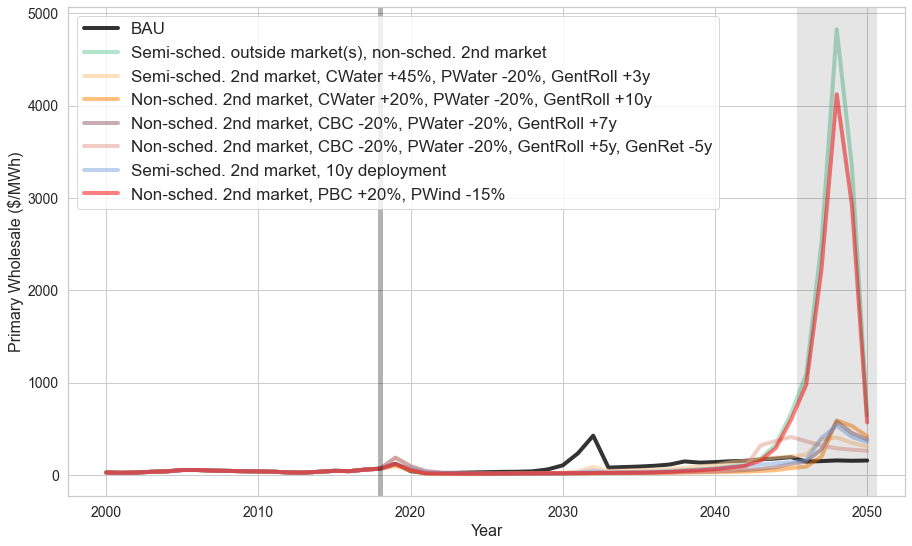

In [455]:
# Wholesale Prices
plt.figure(figsize=(15,9))
years = [DT.datetime.strptime(str(int(date)),'%Y') for date in bau_results_df['Time (Year)'].values]
years =  bau_results_df['Time (Year)'].values

plt.plot( years, bau_results_df['Primary Wholesale ($/MWh)'], color='black', alpha = 0.8, linewidth=4, label='BAU')
plt.plot( years, outcomes_filteredST1ff['primaryWholesalePriceYear'][selected_indexST11], color=colorSt_1, alpha = 0.5, linewidth=4, label=labelST_1)
plt.plot( years, outcomes_filteredST2ff['primaryWholesalePriceYear'][selected_indexST22], color=colorSt_2, alpha = 0.5, linewidth=4, label=labelST_2)
plt.plot( years, outcomes_filteredST2ff['primaryWholesalePriceYear'][selected_indexST24], color=colorSt_3, alpha = 0.5, linewidth=4, label=labelST_3)
plt.plot( years, outcomes_filteredST3ff['primaryWholesalePriceYear'][selected_indexST32], color=colorSt_4, alpha = 0.5, linewidth=4, label=labelST_4)
plt.plot( years, outcomes_filteredST3ff['primaryWholesalePriceYear'][selected_indexST34], color=colorSt_5, alpha = 0.5, linewidth=4, label=labelST_5)

# scenario for ST from JT search

plt.plot( years, outcomes_filteredJTff['primaryWholesalePriceYear'][selected_indexJT7], color=colorJT_7, alpha = 0.5, linewidth=4, label=labelJT_7)
# scenario without considering secondary market target
plt.plot( years, outcomes_filteredST1ff['primaryWholesalePriceYear'][selected_indexST13], color='red', alpha = 0.5, linewidth=4, label=labelSTwoutSecMarkTarg)


# val2025_1 = outcomes_filteredSTff['primaryWholesalePriceYear'][selected_indexST1][2025 - startYear]
# plt.text(2025, val2025_1+120, f'(2025) {(val2025_1):.2f} $/MWh     ',color=colorLct2_1)
# plt.plot(2025, val2025_1, 'ro')

# val2030_1 = outcomes_filteredSTff['primaryWholesalePriceYear'][selected_indexST1][2030 - startYear]
# plt.text(2030, val2030_1+120, f'     (2030) {(val2030_1):.2f} $/MWh',color=colorLct2_1)
# plt.plot(2030, val2030_1, 'ro')

# val2040_1= outcomes_filteredSTff['primaryWholesalePriceYear'][selected_indexST1][2040 - startYear]
# plt.text(2040, val2040_1+120, f'(2040) {(val2040_1):.2f} $/MWh',color=colorLct2_1)
# plt.plot(2040, val2040_1, 'ro')

# val2025_2 = outcomes_filteredSTff['primaryWholesalePriceYear'][selected_indexST2][2025 - startYear]
# plt.text(2025, val2025_2+100, f'(2025) {(val2025_2):.2f} $/MWh     ',color=colorLct2_2)
# plt.plot(2025, val2025_2, 'ro')

# val2030_2 = outcomes_filteredSTff['primaryWholesalePriceYear'][selected_indexST2][2030 - startYear]
# plt.text(2030, val2030_2+100, f'     (2030) {(val2030_2):.2f} $/MWh',color=colorLct2_2)
# plt.plot(2030, val2030_2, 'ro')

# val2040_2 = outcomes_filteredSTff['primaryWholesalePriceYear'][selected_indexST2][2040 - startYear]
# plt.text(2040, val2040_2+100, f'(2040) {(val2040_2):.2f} $/MWh',color=colorLct2_2)
# plt.plot(2040, val2040_2, 'ro')

# val2025_3 = outcomes_filteredSTff['primaryWholesalePriceYear'][selected_indexST3][2025 - startYear]
# plt.text(2025, val2025_3+80, f'(2025) {(val2025_3):.2f} $/MWh     ',color=colorLct2_3)
# plt.plot(2025, val2025_3, 'ro')

# val2030_3 = outcomes_filteredSTff['primaryWholesalePriceYear'][selected_indexST3][2030 - startYear]
# plt.text(2030, val2030_3+80, f'     (2030) {(val2030_3):.2f} $/MWh',color=colorLct2_3)
# plt.plot(2030, val2030_3, 'ro')

# val2040_3 = outcomes_filteredSTff['primaryWholesalePriceYear'][selected_indexST3][2040 - startYear]
# plt.text(2040, val2040_3+80, f'(2040) {(val2040_3):.2f} $/MWh',color=colorLct2_3)
# plt.plot(2040, val2040_3, 'ro')


# val2025_4 = outcomes_filteredSTff['primaryWholesalePriceYear'][selected_indexST4][2025 - startYear]
# plt.text(2025, val2025_4+60, f'(2025) {(val2025_4):.2f} $/MWh     ',color=colorLct2_4)
# plt.plot(2025, val2025_4, 'bo')

# val2030_4 = outcomes_filteredSTff['primaryWholesalePriceYear'][selected_indexST4][2030 - startYear]
# plt.text(2030, val2030_4+60, f'     (2030) {(val2030_4):.2f} $/MWh',color=colorLct2_4)
# plt.plot(2030, val2030_4, 'bo')

# val2040_4 = outcomes_filteredSTff['primaryWholesalePriceYear'][selected_indexST4][2040 - startYear]
# plt.text(2040, val2040_4+60, f'(2040) {(val2040_4):.2f} $/MWh',color=colorLct2_4)
# plt.plot(2040, val2040_4, 'bo')

# val2025_5 = outcomes_filteredSTff['primaryWholesalePriceYear'][selected_indexST5][2025 - startYear]
# plt.text(2025, val2025_5+40, f'(2025) {(val2025_5):.2f} $/MWh     ',color=colorLct2_5)
# plt.plot(2025, val2025_5, 'bo')

# val2030_5 = outcomes_filteredSTff['primaryWholesalePriceYear'][selected_indexST5][2030 - startYear]
# plt.text(2030, val2030_5+40, f'    (2030) {(val2030_5):.2f} $/MWh',color=colorLct2_5)
# plt.plot(2030, val2030_5, 'bo')

# val2040_5 = outcomes_filteredSTff['primaryWholesalePriceYear'][selected_indexST5][2040 - startYear]
# plt.text(2040, val2040_5+40, f'(2040) {(val2040_5):.2f} $/MWh',color=colorLct2_5)
# plt.plot(2040, val2040_5, 'bo')


plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.1, lw = 80)

#plt.xlim([1998, 2040])
#plt.ylim([0, 1000])
#plt.grid( linestyle='-', linewidth=1)
plt.xlabel('Year', size=16)
plt.ylabel('Primary Wholesale (\$/MWh)', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(prop={'size':17})

# print(val2025_1, val2030_1, val2040_1)

# print(val2025_2, val2030_2, val2040_2)

# print(val2025_3, val2030_3, val2040_3)

# print(val2025_4, val2030_4, val2040_4)

# print(val2025_5, val2030_5, val2040_5)

### Tariffs

3.816717386245728 4.479633808135986 6.819169044494629
4.560239791870117 5.60949182510376 9.973535537719728
4.124744892120361 4.937454700469972 15.052196502685549
4.129705905914307 4.87465763092041 9.24257469177246
3.649305820465088 4.1676082611083975 8.03892993927002


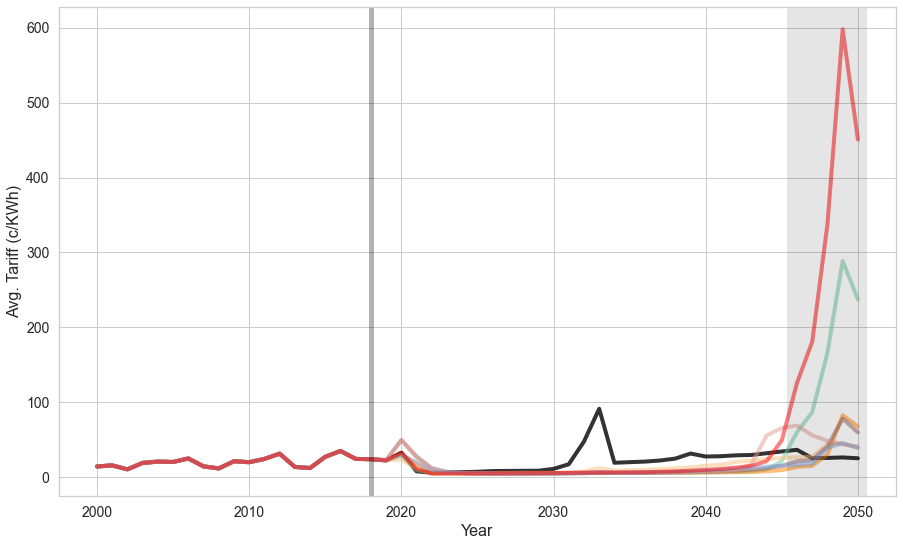

In [456]:
# Wholesale Prices
plt.figure(figsize=(15,9))
years = [DT.datetime.strptime(str(int(date)),'%Y') for date in bau_results_df['Time (Year)'].values]
years =  bau_results_df['Time (Year)'].values

plt.plot( years, bau_results_df['Avg Tariff (c/KWh) per household'], color='black', alpha = 0.8, linewidth=4, label='BAU')
plt.plot( years, outcomes_filteredST1ff['tariffsYear'][selected_indexST11], color=colorSt_1, alpha = 0.5, linewidth=4, label=labelST_1)
plt.plot( years, outcomes_filteredST2ff['tariffsYear'][selected_indexST22], color=colorSt_2, alpha = 0.5, linewidth=4, label=labelST_2)
plt.plot( years, outcomes_filteredST2ff['tariffsYear'][selected_indexST24], color=colorSt_3, alpha = 0.5, linewidth=4, label=labelST_3)
plt.plot( years, outcomes_filteredST3ff['tariffsYear'][selected_indexST32], color=colorSt_4, alpha = 0.5, linewidth=4, label=labelST_4)
plt.plot( years, outcomes_filteredST3ff['tariffsYear'][selected_indexST34], color=colorSt_5, alpha = 0.5, linewidth=4, label=labelST_5)

#scenario for ST from JT search
plt.plot( years, outcomes_filteredJTff['tariffsYear'][selected_indexJT7], color=colorJT_7, alpha = 0.5, linewidth=4, label=labelJT_7)

# scenarios without considering secondary market target
plt.plot( years, outcomes_filteredST1ff['tariffsYear'][selected_indexST13], color='red', alpha = 0.5, linewidth=4, label=labelSTwoutSecMarkTarg)


# val2025_1 = outcomes_filteredSTff['tariffsYear'][selected_indexST1][2025 - startYear]
# plt.text(2025, val2025_1+120, f'(2025) {(val2025_1):.2f} c/KWh     ',color=colorSt_1)
# plt.plot(2025, val2025_1, 'ro')

# val2030_1 = outcomes_filteredSTff['tariffsYear'][selected_indexST1][2030 - startYear]
# plt.text(2030, val2030_1+220, f'     (2030) {(val2030_1):.2f} c/KWh',color=colorSt_1)
# plt.plot(2030, val2030_1, 'ro')

# val2040_1= outcomes_filteredSTff['tariffsYear'][selected_indexST1][2040 - startYear]
# plt.text(2040, val2040_1+120, f'(2040) {(val2040_1):.2f} c/KWh',color=colorSt_1)
# plt.plot(2040, val2040_1, 'ro')

# val2025_2 = outcomes_filteredSTff['tariffsYear'][selected_indexST2][2025 - startYear]
# plt.text(2025, val2025_2+100, f'(2025) {(val2025_2):.2f} c/KWh     ',color=colorSt_2)
# plt.plot(2025, val2025_2)

# val2030_2 = outcomes_filteredSTff['tariffsYear'][selected_indexST2][2030 - startYear]
# plt.text(2030, val2030_2+200, f'     (2030) {(val2030_2):.2f} c/KWh',color=colorSt_2)
# plt.plot(2030, val2030_2)

# val2040_2 = outcomes_filteredSTff['tariffsYear'][selected_indexST2][2040 - startYear]
# plt.text(2040, val2040_2+100, f'(2040) {(val2040_2):.2f} c/KWh',color=colorSt_2)
# plt.plot(2040, val2040_2)

# val2025_3 = outcomes_filteredSTff['tariffsYear'][selected_indexST3][2025 - startYear]
# plt.text(2025, val2025_3+80, f'(2025) {(val2025_3):.2f} c/KWh     ',color=colorSt_3)
# plt.plot(2025, val2025_3)

# val2030_3 = outcomes_filteredSTff['tariffsYear'][selected_indexST3][2030 - startYear]
# plt.text(2030, val2030_3+180, f'     (2030) {(val2030_3):.2f} c/KWh',color=colorSt_3)
# plt.plot(2030, val2030_3)

# val2040_3 = outcomes_filteredSTff['tariffsYear'][selected_indexST3][2040 - startYear]
# plt.text(2040, val2040_3+80, f'(2040) {(val2040_3):.2f} c/KWh',color=colorSt_3)
# plt.plot(2040, val2040_3)


# val2025_4 = outcomes_filteredSTff['tariffsYear'][selected_indexST4][2025 - startYear]
# plt.text(2025, val2025_4+60, f'(2025) {(val2025_4):.2f} c/KWh     ',color=colorSt_4)
# plt.plot(2025, val2025_4)

# val2030_4 = outcomes_filteredSTff['tariffsYear'][selected_indexST4][2030 - startYear]
# plt.text(2030, val2030_4+160, f'     (2030) {(val2030_4):.2f} c/KWh',color=colorSt_4)
# plt.plot(2030, val2030_4)

# val2040_4 = outcomes_filteredSTff['tariffsYear'][selected_indexST4][2040 - startYear]
# plt.text(2040, val2040_4+60, f'(2040) {(val2040_4):.2f} c/KWh',color=colorSt_4)
# plt.plot(2040, val2040_4)

# val2025_5 = outcomes_filteredSTff['tariffsYear'][selected_indexST5][2025 - startYear]
# plt.text(2025, val2025_5+40, f'(2025) {(val2025_5):.2f} c/KWh     ',color=colorSt_5)
# plt.plot(2025, val2025_5)

# val2030_5 = outcomes_filteredSTff['tariffsYear'][selected_indexST5][2030 - startYear]
# plt.text(2030, val2030_5+140, f'     (2030) {(val2030_5):.2f} c/KWh',color=colorSt_5)
# plt.plot(2030, val2030_5)

# val2040_5 = outcomes_filteredSTff['tariffsYear'][selected_indexST5][2040 - startYear]
# plt.text(2040, val2040_5+40, f'(2040) {(val2040_5):.2f} c/KWh',color=colorSt_5)
# plt.plot(2040, val2040_5)

plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.1, lw = 80)

#plt.xlim([1998, 2040])
#plt.ylim([0, 1000])
#plt.grid( linestyle='-', linewidth=1)
plt.xlabel('Year', size=16)
plt.ylabel('Avg. Tariff (c/KWh)', size=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
#plt.legend(prop={'size':16})


print(val2025_1, val2030_1, val2040_1)

print(val2025_2, val2030_2, val2040_2)

print(val2025_3, val2030_3, val2040_3)

print(val2025_4, val2030_4, val2040_4)

print(val2025_5, val2030_5, val2040_5)

# System production

## BAU production

In [458]:
bau_results_df
bau_results_df['Percentage Renewable Production'] = bau_results_df['Percentage Renewable Production']*100

In [459]:
mwh_to_gwh = 1/1000

# Production per fuel and technology type
coalProdBau = bau_results_df['System Production Coal'] * mwh_to_gwh
waterProdBau = bau_results_df['System Production Water'] * mwh_to_gwh
solarRooftopProdBau = bau_results_df['System Production Rooftop PV'] * mwh_to_gwh
windProdBau = bau_results_df['System Production Wind'] * mwh_to_gwh
gasProdBau = bau_results_df['System Production Gas'] * mwh_to_gwh
solarProdBau = bau_results_df['System Production Solar'] * mwh_to_gwh
battProdBau = bau_results_df['System Production Battery'] * mwh_to_gwh


brown = '#8a572b'
orange = '#f48e1b'
blue = '#4685b5'
green = '#417404'
lightYellow = '#ffdc73'
mustard = '#ffbf00'
skyBlue = '#6dc3f1'
purple = '#6a329f'

In [460]:
# Production per market type

spotMarketProdBau = bau_results_df['System Production Primary Spot'] * mwh_to_gwh
secondSpotMarketProdBau = bau_results_df['System Production Secondary Spot'] * mwh_to_gwh
offSpotBau = bau_results_df['System Production Off Spot'] * mwh_to_gwh

consumptionBau = bau_results_df['Consumption (KWh) per household'] * 1/1000000 \
* bau_results_df['Number of Domestic Consumers (households)'] / 0.3

importProdBau = consumptionBau -  spotMarketProdBau - secondSpotMarketProdBau - offSpotBau

primary = '#e3533d'
secondary = '#a3ff84'
off = '#8ad3e3'


Text(0, 0.5, 'Electricity Production (GWh)')

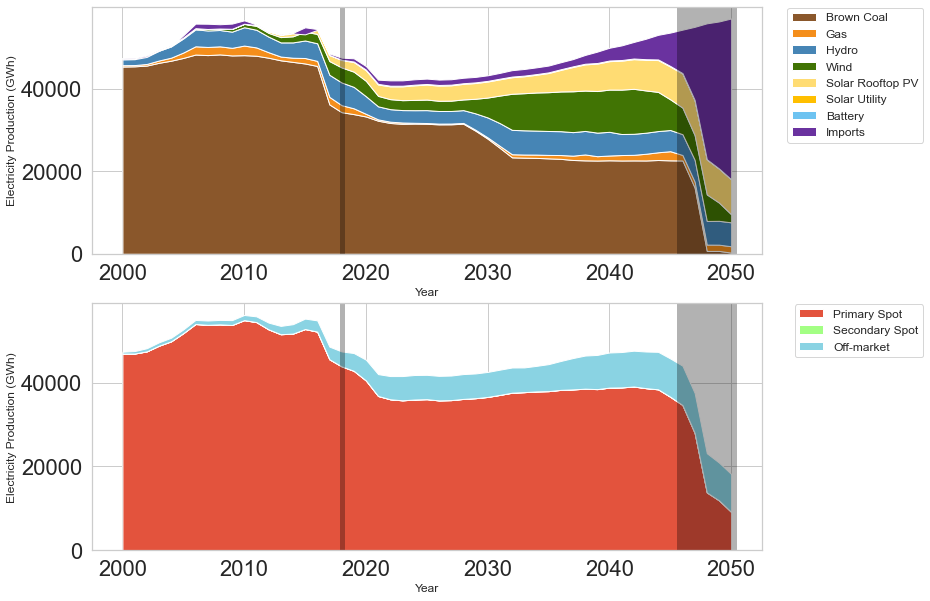

In [461]:
plt.subplots(1, 2, figsize = (12,10), sharex=True)
plt.subplot(2,1,1)

x = bau_results_df['Time (Year)']
yBau = ([coalProdBau, gasProdBau, waterProdBau, windProdBau, solarRooftopProdBau, solarProdBau, battProdBau, importProdBau])

plt.stackplot(x,yBau, colors=[brown,orange,blue, green, lightYellow, mustard, skyBlue, purple ], 
              labels=['Brown Coal', 'Gas', 'Hydro', 'Wind', 'Solar Rooftop PV', 'Solar Utility','Battery', 'Imports'])

plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.3, lw = 60)
#plt.title("Electricity Production (GWh) per Technology (top) and Market (bottom) Type")
plt.legend(prop={'size':12}, loc = 'upper right',  bbox_to_anchor  = (1.25, 1.02))

plt.xlabel('Year', size=12)
plt.ylabel('Electricity Production (GWh)', size=12)

plt.subplot(2,1,2) 

yMBau = ([spotMarketProdBau, secondSpotMarketProdBau, offSpotBau])


plt.stackplot(x,yMBau, colors=[primary, secondary, off], 
              labels=['Primary Spot', 'Secondary Spot', 'Off-market'])

plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.3, lw = 60)

#plt.title("Electricity Production (GWh) per Market type")
plt.legend(prop={'size':12}, loc = 'upper right', bbox_to_anchor  = (1.25, 1.02))

plt.xlabel('Year', size=12)
plt.ylabel('Electricity Production (GWh)', size=12)

## Transition Scenario Production

In [462]:
#resultsST1 = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/csv/VIC/VICSimDataYearSummary_seed_1630638009499.csv')

#LCT, JT, and ST 1: green line: non-schedule in secondary marekt, and semi-schedule outside markets

# indexST1 = selected_indexST11
# experimentsST1ff.iloc[indexST1]

index1 = selected_indexLC2c1
experimentsLCTff.iloc[index1]
outcomes1 = outcomes_filteredLCTff 
#ST: red line: semi in primary spot, non-schedule in secondary spot, 
# increase 20% electricity price generated with brown coal and decrease 15% electricity generated with wind.
# selected_indexST13  from ST1ff

# indexST2 = selected_indexST13
# experimentsST1ff.iloc[indexST2]

# JT non-schedule in secondary, GenRoll 6 years, 10% increase in brown coal capacity
# filter_ff_JT
index2 = selected_indexJT3
experimentsJTff.iloc[index2]
outcomes2 = outcomes_filteredJTff

# Another option: pink line: non-sched in second. market, CBC -20%, Pwater -20%, GenRoll +5 years, GenRet -5 years
# selected_indexST34 from ST3ff

index3 = selected_indexST34
experimentsST3ff.iloc[index3]
outcomes3 = outcomes_filteredST3ff


In [463]:
# Production per market type

spotMarketProd1 = outcomes1['primarySpotProductionYear'][index1] * mwh_to_gwh
secondSpotMarketProd1 = outcomes1['secondarySpotProductionYear'][index1] * mwh_to_gwh
offSpot1 = outcomes1['offSpotProductionYear'][index1] * mwh_to_gwh
imports1 = consumptionBau - spotMarketProd1 - secondSpotMarketProd1 - offSpot1



In [464]:
# Production per fuel and technology type
coalProd1 = outcomes1['coalProductionYear'][index1] * mwh_to_gwh
waterProd1 = outcomes1['waterProductionYear'][index1] * mwh_to_gwh
solarRooftopProd1 = outcomes1['rooftopPVProductionYear'][index1] * mwh_to_gwh
windProd1 = outcomes1['windProductionYear'][index1] * mwh_to_gwh
gasProd1 = outcomes1['gasProductionYear'][index1] * mwh_to_gwh
solarProd1 = outcomes1['solarProductionYear'][index1] * mwh_to_gwh
battProd1 = outcomes1['BatteryProductionYear'][index1] * mwh_to_gwh


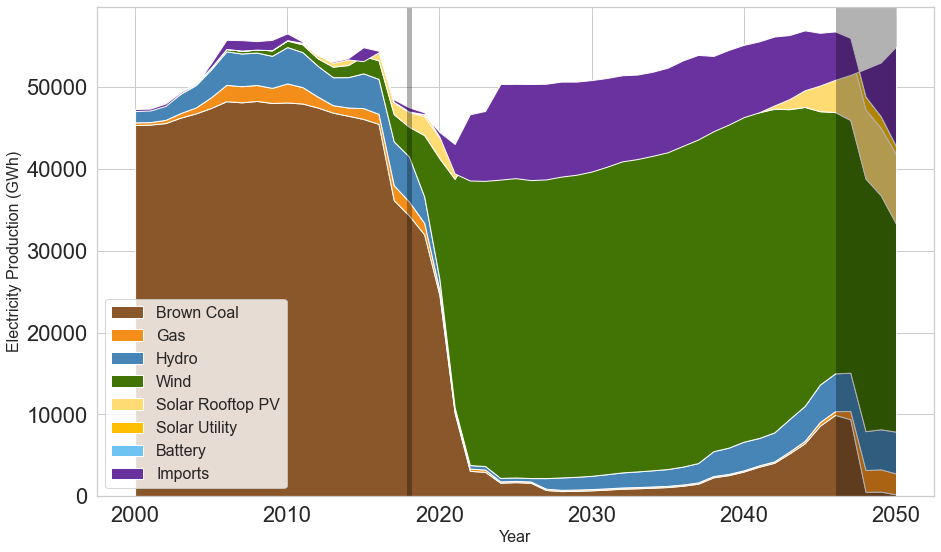

In [465]:
plt.figure(figsize=(15,9))


x = outcomes1['TIMEYear'][index1]
y1= ([coalProd1, gasProd1, waterProd1, windProd1, solarRooftopProd1, solarProd1, battProd1, imports1])
plt.stackplot(x,y1, colors=[brown,orange,blue, green, lightYellow, mustard, skyBlue, purple ], 
              labels=[r'Brown Coal', 'Gas', 'Hydro', 'Wind', 'Solar Rooftop PV', 'Solar Utility','Battery', 'Imports'])

plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.3, lw = 60)

plt.legend(prop={'size':16}, loc = 'lower left')
plt.xlabel('Year', size=16)
plt.ylabel('Electricity Production (GWh)', size=16)
plt.show()

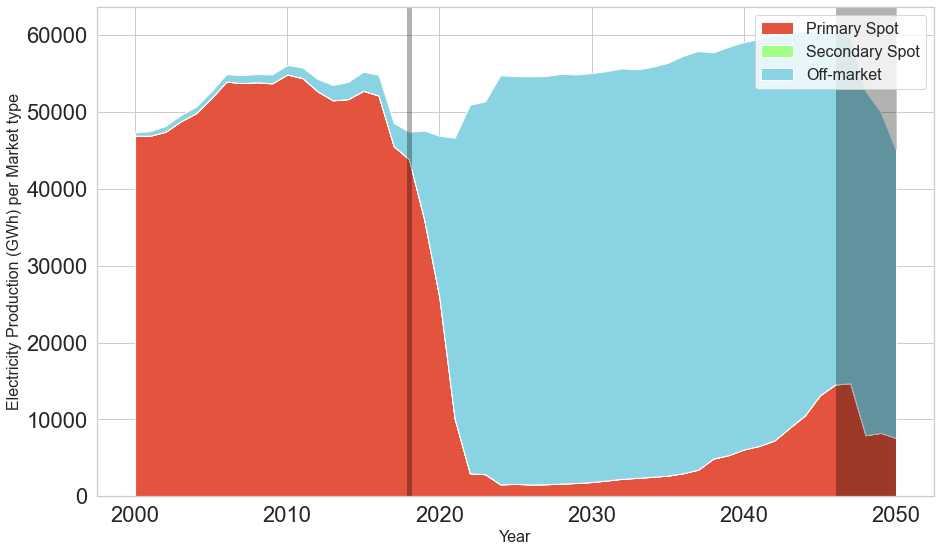

In [466]:
plt.figure(figsize=(15,9))

x = outcomes1['TIMEYear'][index1]
yM1 = ([spotMarketProd1, secondSpotMarketProd1, offSpot1])
plt.stackplot(x,yM1, colors=[primary, secondary, off], 
              labels=['Primary Spot', 'Secondary Spot', 'Off-market'])

plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.3, lw = 60)

plt.legend(prop={'size':16}, loc = 'upper right')
plt.xlabel('Year', size=16)
plt.ylabel('Electricity Production (GWh) per Market type', size=16)
plt.show()


In [467]:
# Production per market type

spotMarketProd2 = outcomes2['primarySpotProductionYear'][index2] * mwh_to_gwh
secondSpotMarketProd2 = outcomes2['secondarySpotProductionYear'][index2] * mwh_to_gwh
offSpot2 = outcomes2['offSpotProductionYear'][index2] * mwh_to_gwh

imports2 = consumptionBau - spotMarketProd2 - secondSpotMarketProd2 - offSpot2


In [468]:
# Production per fuel and technology type
coalProd2 = outcomes2['coalProductionYear'][index2] * mwh_to_gwh
waterProd2 = outcomes2['waterProductionYear'][index2] * mwh_to_gwh
solarRooftopProd2 = outcomes2['rooftopPVProductionYear'][index2] * mwh_to_gwh
windProd2 = outcomes2['windProductionYear'][index2] * mwh_to_gwh
gasProd2 = outcomes2['gasProductionYear'][index2] * mwh_to_gwh
solarProd2 = outcomes2['solarProductionYear'][index2] * mwh_to_gwh
battProd2 = outcomes2['BatteryProductionYear'][index2] * mwh_to_gwh


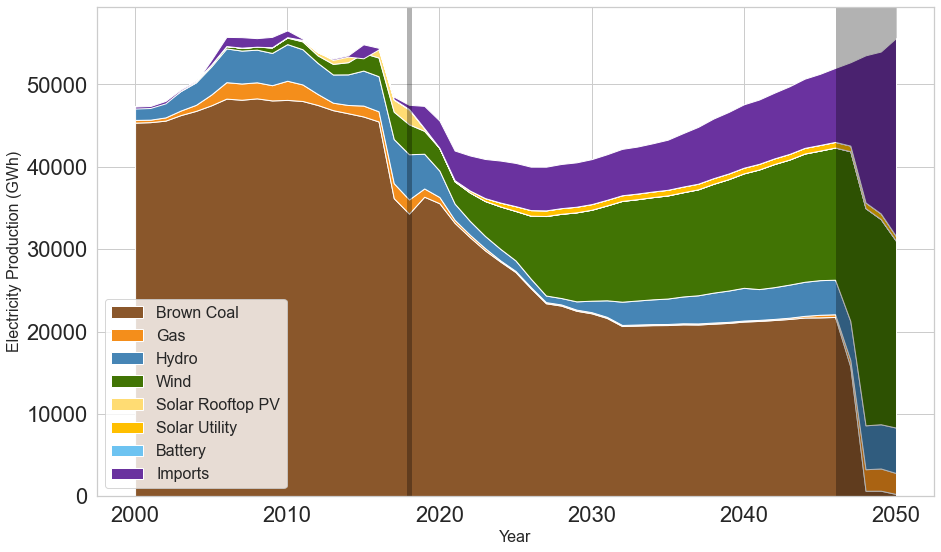

In [469]:
plt.figure(figsize=(15,9))

x = outcomes2['TIMEYear'][index2]
y2 = ([coalProd2, gasProd2, waterProd2, windProd2, solarRooftopProd2, solarProd2, battProd2, imports2])
plt.stackplot(x,y2, colors=[brown,orange,blue, green, lightYellow, mustard, skyBlue, purple ], 
              labels=[r'Brown Coal', 'Gas', 'Hydro', 'Wind', 'Solar Rooftop PV', 'Solar Utility','Battery', 'Imports'])

plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.3, lw = 60)

plt.legend(prop={'size':16}, loc = 'lower left')
plt.xlabel('Year', size=16)
plt.ylabel('Electricity Production (GWh)', size=16)
plt.show()

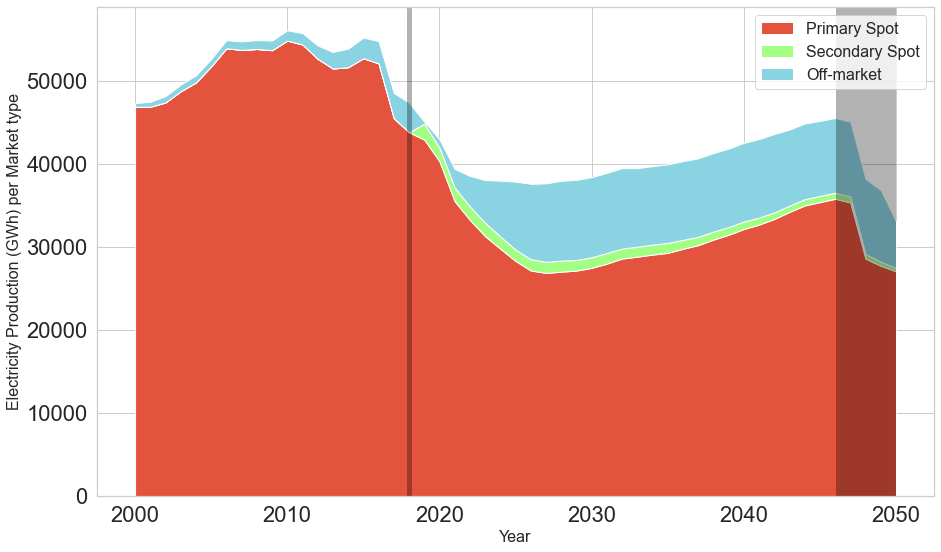

In [470]:
plt.figure(figsize=(15,9))

x = outcomes2['TIMEYear'][index2]
yM2 = ([spotMarketProd2, secondSpotMarketProd2, offSpot2])
plt.stackplot(x,yM2, colors=[primary, secondary, off], 
              labels=['Primary Spot', 'Secondary Spot', 'Off-market'])

plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.3, lw = 60)

plt.legend(prop={'size':16}, loc = 'upper right')
plt.xlabel('Year', size=16)
plt.ylabel('Electricity Production (GWh) per Market type', size=16)
plt.show()

In [471]:
# Production per fuel and technology type
coalProd3= outcomes3['coalProductionYear'][index3] * mwh_to_gwh
waterProd3 = outcomes3['waterProductionYear'][index3] * mwh_to_gwh
solarRooftopProd3 = outcomes3['rooftopPVProductionYear'][index3] * mwh_to_gwh
windProd3 = outcomes3['windProductionYear'][index3] * mwh_to_gwh
gasProd3 = outcomes3['gasProductionYear'][index3] * mwh_to_gwh
solarProd3 = outcomes3['solarProductionYear'][index3] * mwh_to_gwh
battProd3 = outcomes3['BatteryProductionYear'][index3] * mwh_to_gwh

In [472]:
# Production per market type

spotMarketProd3 = outcomes3['primarySpotProductionYear'][index3] * mwh_to_gwh
secondSpotMarketProd3 = outcomes3['secondarySpotProductionYear'][index3] * mwh_to_gwh
offSpot3 = outcomes3['offSpotProductionYear'][index3] * mwh_to_gwh

imports3 = consumptionBau - spotMarketProd3 - secondSpotMarketProd3 - offSpot3



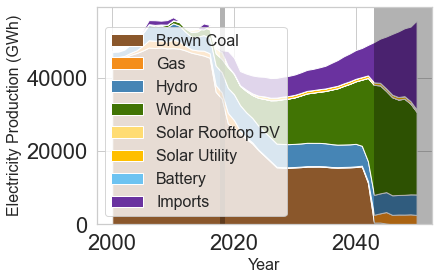

In [473]:
y3 = ([coalProd3, gasProd3, waterProd3, windProd3, solarRooftopProd3, solarProd3, battProd3, imports3])
plt.stackplot(x,y3, colors=[brown,orange,blue, green, lightYellow, mustard, skyBlue, purple ], 
              labels=[r'Brown Coal', 'Gas', 'Hydro', 'Wind', 'Solar Rooftop PV', 'Solar Utility','Battery', 'Imports'])

plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.3, lw = 60)

plt.legend(prop={'size':16}, loc = 'lower left')
plt.xlabel('Year', size=16)
plt.ylabel('Electricity Production (GWh)', size=16)
plt.show()

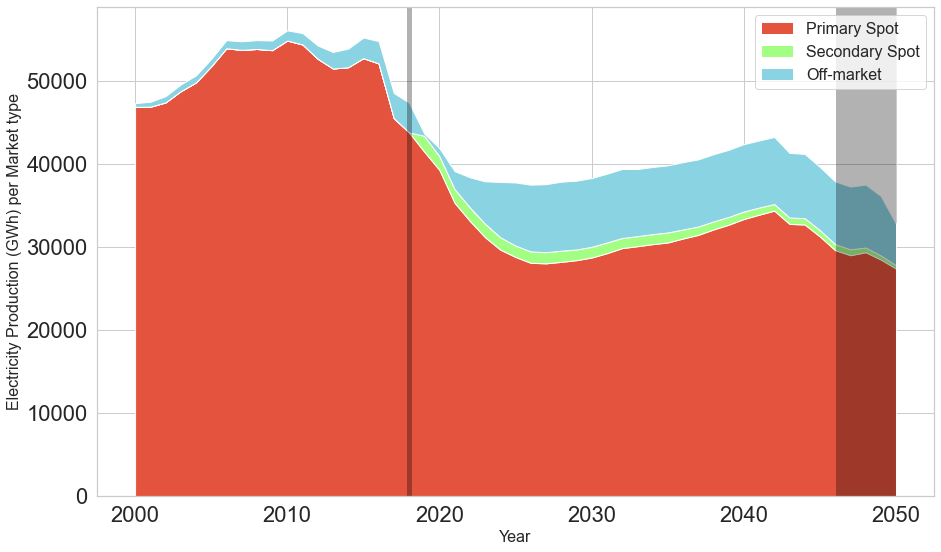

In [474]:
plt.figure(figsize=(15,9))
yM3 = ([spotMarketProd3, secondSpotMarketProd3, offSpot3])
plt.stackplot(x,yM3, colors=[primary, secondary, off], 
              labels=['Primary Spot', 'Secondary Spot', 'Off-market'])

plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.3, lw = 60)

plt.legend(prop={'size':16}, loc = 'upper right')
plt.xlabel('Year', size=16)
plt.ylabel('Electricity Production (GWh) per Market type', size=16)
plt.show()

## Comparison BAU and two ST scenarios

Text(0.5, 0, 'Year')

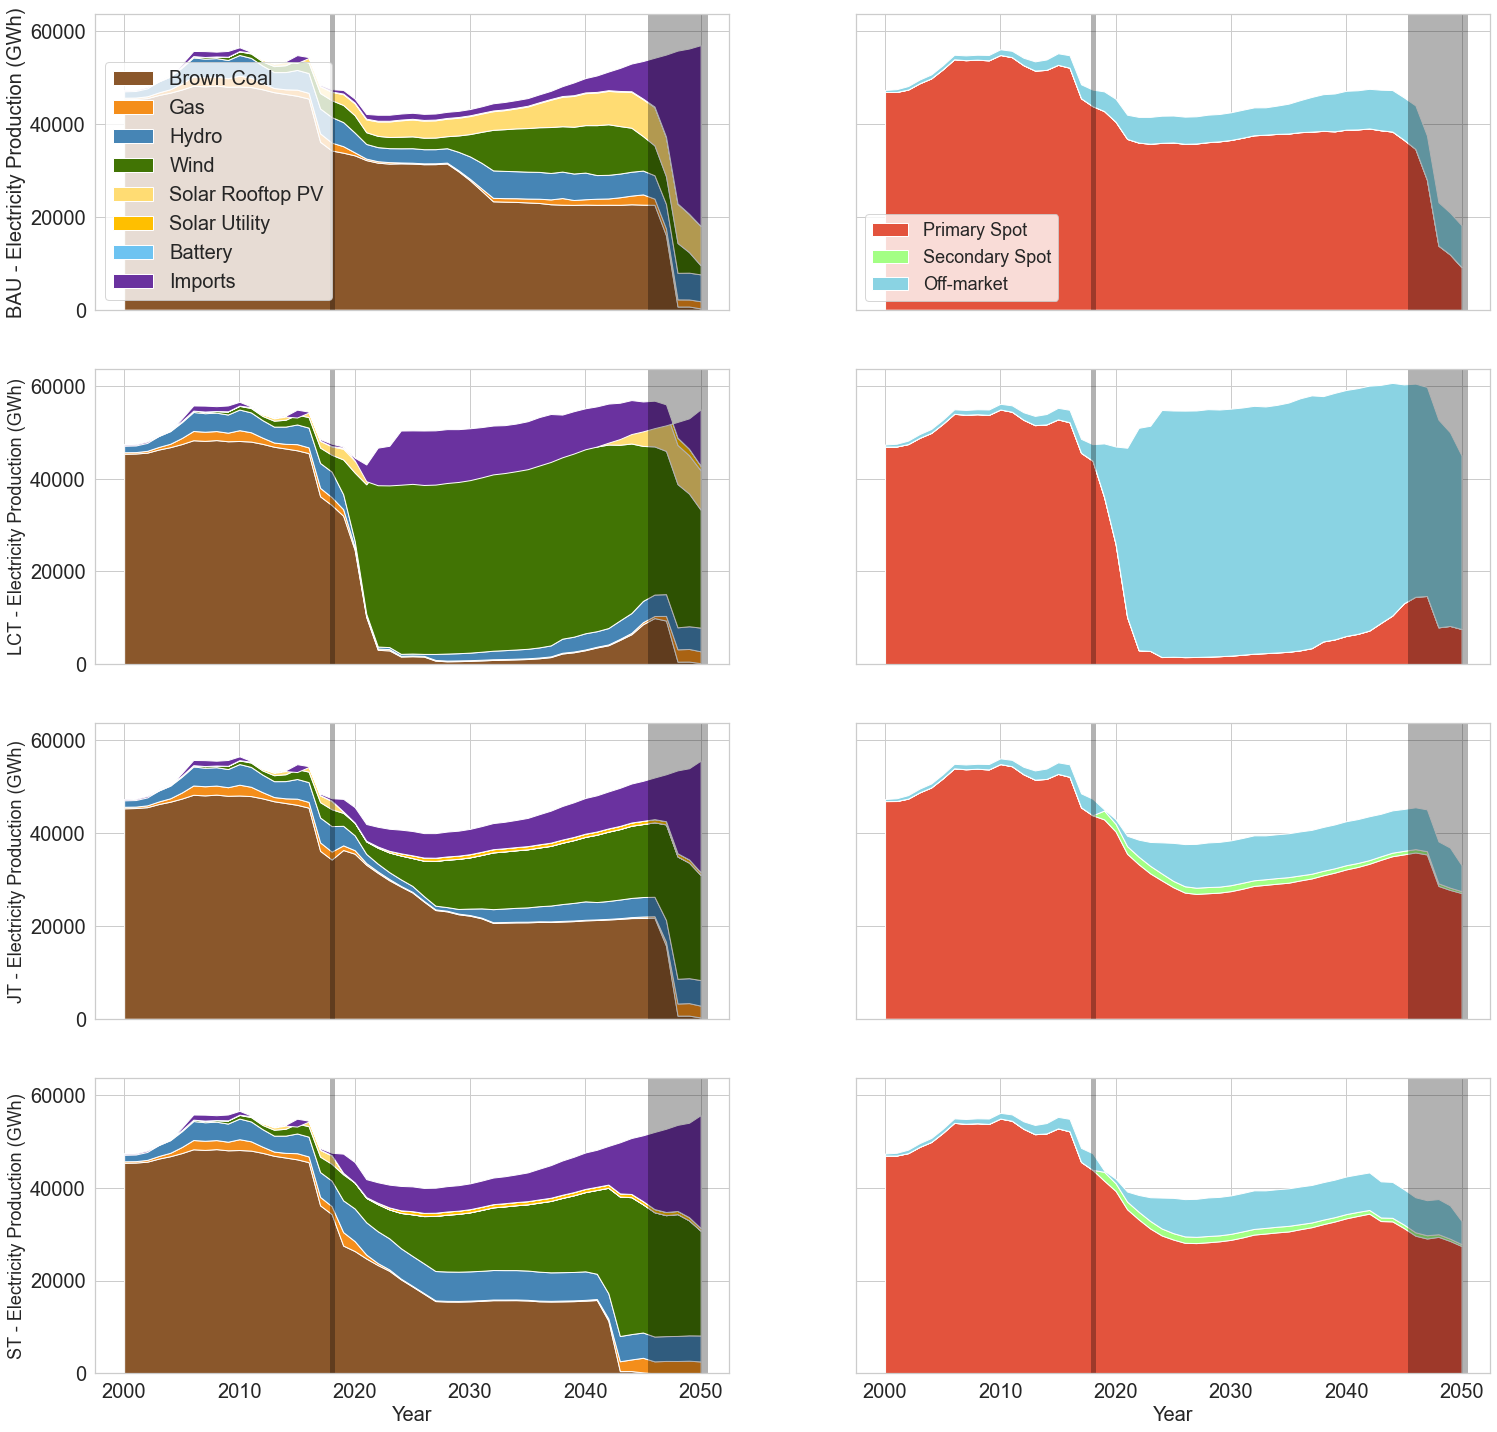

In [475]:
tickskFont = 20
rows, cols = 4, 2
plt.subplots(rows, cols, figsize = (25,25), sharex=True, sharey=True)

plt.subplot(4,2,1) 
#fig.suptitle('Electricity Production by Fuel Type and Market type')

x = bau_results_df['Time (Year)']

plt.stackplot(x,yBau, colors=[brown,orange,blue, green, lightYellow, mustard, skyBlue, purple ], 
              labels=['Brown Coal', 'Gas', 'Hydro', 'Wind', 'Solar Rooftop PV', 'Solar Utility','Battery', 'Imports'])

plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.3, lw = 60)
#plt.title("Electricity Production (GWh) per Technology (top) and Market (bottom) Type")
plt.legend(prop={'size':20}, loc = 'lower left')
plt.xticks(fontsize= tickskFont)
plt.yticks(fontsize = tickskFont)
#plt.xlabel('Year', size=12)
plt.ylabel('BAU - Electricity Production (GWh)', size=20)

plt.subplot(4,2,3) 
plt.stackplot(x,y1, colors=[brown,orange,blue, green, lightYellow, mustard, skyBlue, purple ], 
              labels=[r'Brown Coal', 'Gas', 'Hydro', 'Wind', 'Solar Rooftop PV', 'Solar Utility','Battery', 'Imports'])
plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.3, lw = 60)
plt.xticks(fontsize= tickskFont)
plt.yticks(fontsize = tickskFont)
plt.ylabel('LCT - Electricity Production (GWh)', size=18)

plt.subplot(4,2,5) 

plt.stackplot(x,y2, colors=[brown,orange,blue, green, lightYellow, mustard, skyBlue, purple ], 
              labels=[r'Brown Coal', 'Gas', 'Hydro', 'Wind', 'Solar Rooftop PV', 'Solar Utility','Battery', 'Imports'])

plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.3, lw = 60)
plt.xticks(fontsize= tickskFont)
plt.yticks(fontsize = tickskFont)
plt.ylabel('JT - Electricity Production (GWh)', size=18)

plt.subplot(4,2,7) 

plt.stackplot(x,y3, colors=[brown,orange,blue, green, lightYellow, mustard, skyBlue , purple], 
              labels=[r'Brown Coal', 'Gas', 'Hydro', 'Wind', 'Solar Rooftop PV', 'Solar Utility','Battery', 'Imports'])
plt.ylabel('ST - Electricity Production (GWh)', size=18)
plt.xlabel('Year', size=20)

plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.3, lw = 60)
plt.xticks(fontsize= tickskFont)
plt.yticks(fontsize = tickskFont)

plt.subplot(4,2,2) 
yMBau = ([spotMarketProdBau, secondSpotMarketProdBau, offSpotBau])

plt.stackplot(x,yMBau, colors=[primary, secondary, off], 
              labels=['Primary Spot', 'Secondary Spot', 'Off-market'])

plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.3, lw = 60)

plt.xticks(fontsize= tickskFont)
plt.yticks(fontsize = tickskFont)
plt.legend(prop={'size':18}, loc = 'lower left') #'upper right', bbox_to_anchor  = (1.25, 1.02))

plt.subplot(4,2,4) 

plt.stackplot(x,yM1, colors=[primary, secondary, off], 
              labels=['Primary Spot', 'Secondary Spot', 'Off-market'])

plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.3, lw = 60)
plt.xticks(fontsize= tickskFont)
plt.yticks(fontsize = tickskFont)

plt.subplot(4,2,6) 

plt.stackplot(x,yM2, colors=[primary, secondary, off], 
              labels=['Primary Spot', 'Secondary Spot', 'Off-market'])

plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.3, lw = 60)
plt.xticks(fontsize= tickskFont)
plt.yticks(fontsize = tickskFont)

plt.subplot(4,2,8) 

plt.stackplot(x,yM3, colors=[primary, secondary, off], 
              labels=['Primary Spot', 'Secondary Spot', 'Off-market'])

plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.3, lw = 60)
plt.xticks(fontsize= tickskFont)
plt.yticks(fontsize = tickskFont)
plt.xlabel('Year', size=20)

In [ ]:
experimentsJTff.iloc[index2]

# Snapshots Future

In [476]:
### create df with results for snapshot years 2025, 2030 and 2040
targetYear1 = 2025 
targetYear2 = 2030
targetYear3 = 2040

bau_df = bau_results_df.set_index('Time (Year)')
sel_cols = [
    'GHGYear',
    'Percentage Renewable Production',
    'unmetPercentageConsumptionPrimary',
    'Primary Wholesale ($/MWh)',
    'Avg Tariff (c/KWh) per household',
    'unmetPercentageConsumptionSecondary'    
]

futureSnapshots_bau_df = bau_df.loc[[targetYear1,targetYear2,targetYear3]][sel_cols]
futureSnapshots_bau_df['LIHC'] = ev_results_BAU_df.T.loc[[targetYear1,targetYear2,targetYear3]]*100
futureSnapshots_bau_df['Transition Scenario'] = ['BAU'] * 3

futureSnapshots_bau_df.head()



GHGYear  Percentage Renewable Production  \
Time (Year)                                               
2025         42.486429                      2299.175913   
2030         37.743092                      3270.076126   
2040         30.417706                      4914.922112   

             unmetPercentageConsumptionPrimary  Primary Wholesale ($/MWh)  \
Time (Year)                                                                 
2025                                  0.024554                  29.174541   
2030                                  0.097025                 103.204763   
2040                                  4.053357                 138.428002   

             Avg Tariff (c/KWh) per household  \
Time (Year)                                     
2025                                 7.155533   
2030                                11.051705   
2040                                27.531210   

             unmetPercentageConsumptionSecondary      LIHC Transition Scenario  
Time (Year)                                                                     
2025                                         0.0  2.187725                 BAU  
2030                                         0.0  2.233461                 BAU  
2040                                         0.0  6.061613                 BAU

In [477]:
#Low Carbon Transition
futureSnapshots_LCT_df = pd.DataFrame(index = [targetYear1,targetYear2,targetYear3])
futureSnapshots_LCT_df['GHGYear']=outcomes1['GHGYear'][index1,[targetYear1-startYear,targetYear2-startYear,targetYear3-startYear]] 
futureSnapshots_LCT_df['Percentage Renewable Production'] = outcomes1['renewableContributionYear'][index1,[targetYear1-startYear,targetYear2-startYear,targetYear3-startYear]]*100 
futureSnapshots_LCT_df['unmetPercentageConsumptionPrimary'] = outcomes1['unmetPercentageConsumptionPrimary'][index1,[targetYear1-startYear,targetYear2-startYear,targetYear3-startYear]] 
futureSnapshots_LCT_df['Primary Wholesale ($/MWh)'] = outcomes1['primaryWholesalePriceYear'][index1,[targetYear1-startYear,targetYear2-startYear,targetYear3-startYear]] 
futureSnapshots_LCT_df['Avg Tariff (c/KWh) per household'] = outcomes1['tariffsYear'][index1,[targetYear1-startYear,targetYear2-startYear,targetYear3-startYear]] 
futureSnapshots_LCT_df['unmetPercentageConsumptionSecondary'] = outcomes1['unmetPercentageConsumptionSecondary'][index1,[targetYear1-startYear,targetYear2-startYear,targetYear3-startYear]] 
futureSnapshots_LCT_df['LIHC'] = outcomes1['Energy Vulnerability Percentage'][index1,[targetYear1-startYear,targetYear2-startYear,targetYear3-startYear]]*100 
futureSnapshots_LCT_df['Transition Scenario'] = ['LCT'] * 3

#Just Transition
futureSnapshots_JT_df = pd.DataFrame(index = [targetYear1,targetYear2,targetYear3])
futureSnapshots_JT_df['GHGYear']=outcomes2['GHGYear'][index2,[targetYear1-startYear,targetYear2-startYear,targetYear3-startYear]] 
futureSnapshots_JT_df['Percentage Renewable Production'] = outcomes2['renewableContributionYear'][index2,[targetYear1-startYear,targetYear2-startYear,targetYear3-startYear]]*100
futureSnapshots_JT_df['unmetPercentageConsumptionPrimary'] = outcomes2['unmetPercentageConsumptionPrimary'][index2,[targetYear1-startYear,targetYear2-startYear,targetYear3-startYear]] 
futureSnapshots_JT_df['Primary Wholesale ($/MWh)'] = outcomes2['primaryWholesalePriceYear'][index2,[targetYear1-startYear,targetYear2-startYear,targetYear3-startYear]] 
futureSnapshots_JT_df['Avg Tariff (c/KWh) per household'] = outcomes2['tariffsYear'][index2,[targetYear1-startYear,targetYear2-startYear,targetYear3-startYear]] 
futureSnapshots_JT_df['unmetPercentageConsumptionSecondary'] = outcomes2['unmetPercentageConsumptionSecondary'][index2,[targetYear1-startYear,targetYear2-startYear,targetYear3-startYear]] 
futureSnapshots_JT_df['LIHC'] = outcomes2['Energy Vulnerability Percentage'][index2,[targetYear1-startYear,targetYear2-startYear,targetYear3-startYear]] *100
futureSnapshots_JT_df['Transition Scenario'] = ['JT'] * 3 

#Sustainability Transition
futureSnapshots_ST_df = pd.DataFrame(index = [targetYear1,targetYear2,targetYear3])
futureSnapshots_ST_df['GHGYear']=outcomes3['GHGYear'][index3,[targetYear1-startYear,targetYear2-startYear,targetYear3-startYear]] 
futureSnapshots_ST_df['Percentage Renewable Production'] = outcomes3['renewableContributionYear'][index3,[targetYear1-startYear,targetYear2-startYear,targetYear3-startYear]] *100
futureSnapshots_ST_df['unmetPercentageConsumptionPrimary'] = outcomes3['unmetPercentageConsumptionPrimary'][index3,[targetYear1-startYear,targetYear2-startYear,targetYear3-startYear]] 
futureSnapshots_ST_df['Primary Wholesale ($/MWh)'] = outcomes3['primaryWholesalePriceYear'][index3,[targetYear1-startYear,targetYear2-startYear,targetYear3-startYear]] 
futureSnapshots_ST_df['Avg Tariff (c/KWh) per household'] = outcomes3['tariffsYear'][index3,[targetYear1-startYear,targetYear2-startYear,targetYear3-startYear]] 
futureSnapshots_ST_df['unmetPercentageConsumptionSecondary'] = outcomes3['unmetPercentageConsumptionSecondary'][index2,[targetYear1-startYear,targetYear2-startYear,targetYear3-startYear]] 
futureSnapshots_ST_df['LIHC'] = outcomes3['Energy Vulnerability Percentage'][index3,[targetYear1-startYear,targetYear2-startYear,targetYear3-startYear]] *100
futureSnapshots_ST_df['Transition Scenario'] = ['ST'] * 3 


In [478]:
futureSnapshotsBauLct = pd.merge(futureSnapshots_bau_df,futureSnapshots_LCT_df, how='outer')
futureSnapshotsJTST = pd.merge(futureSnapshots_JT_df, futureSnapshots_ST_df, how = 'outer')
futureSnapshots_all = pd.merge(futureSnapshotsBauLct,futureSnapshotsJTST, how='outer')
futureSnapshots_all['Target year'] = [targetYear1, targetYear2, targetYear3] * 4

name = 'futurePathways'
writer = pd.ExcelWriter('{}/outputs_2021-Sep-17_{}.xlsx'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\data', name), engine='xlsxwriter')
futureSnapthotsData = pd.DataFrame(futureSnapshots_all)
futureSnapthotsData.to_excel(writer, sheet_name=f'EV_{name}')
writer.save()

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Unmet Consumption Secondary Spot (%)')]

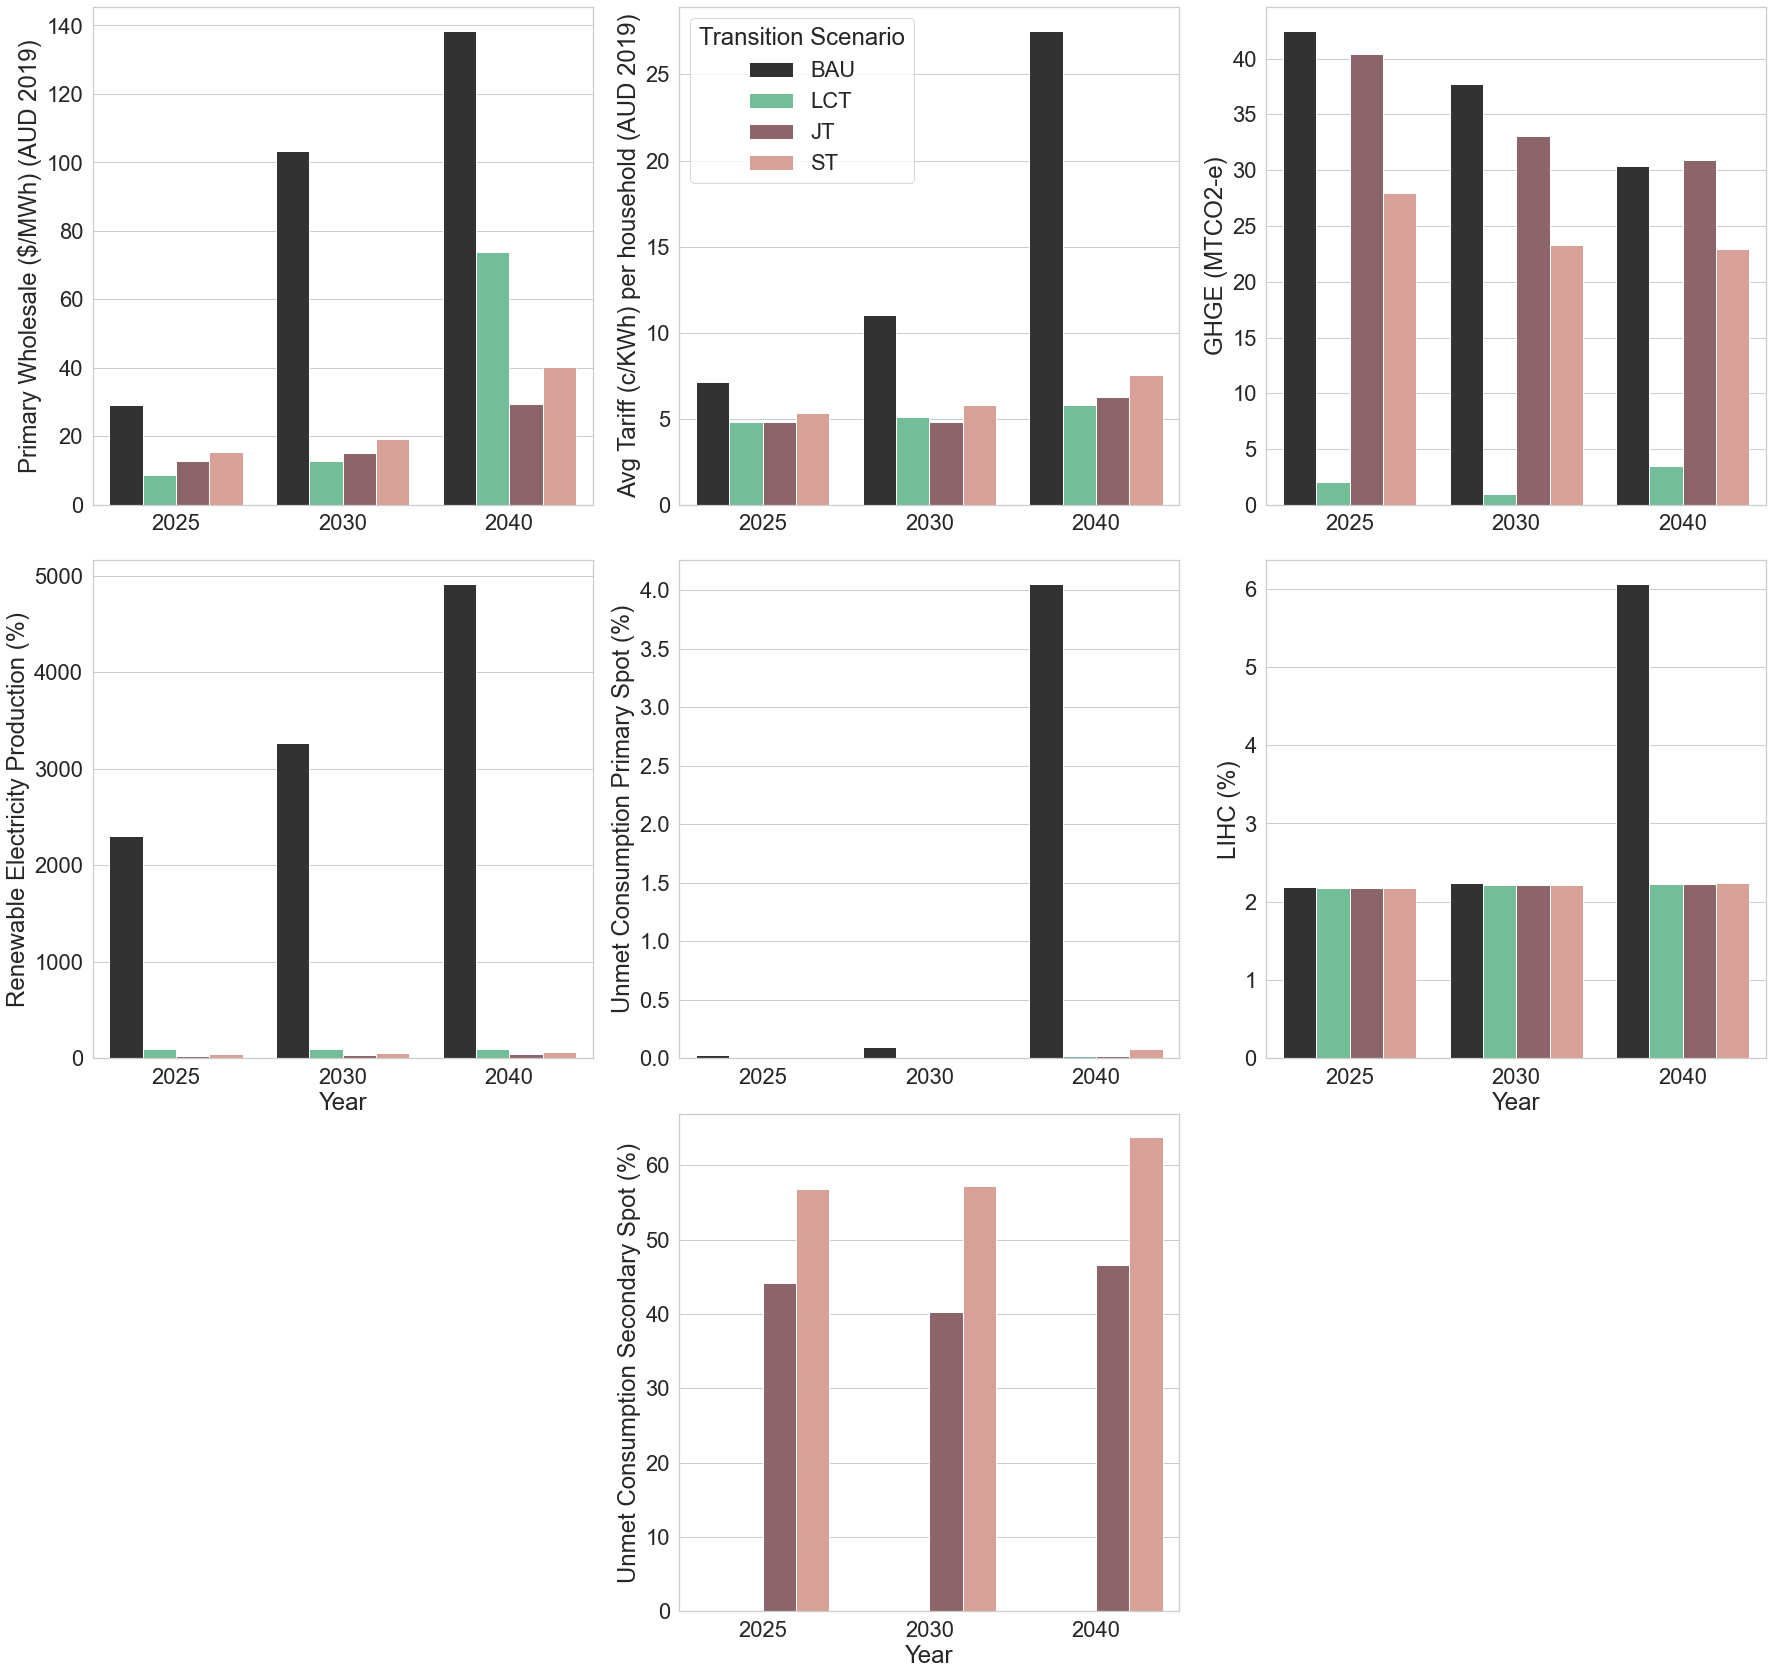

In [479]:
# plt.figure(figsize=(15, 13))
#https://www.python-course.eu/matplotlib_subplots.php
bauColor= '#323232'
lctColor = '#67C999'
jtColor = '#925F66'
stColor = '#E39A8C'
sns.set(font_scale = 2)

scenariosColor = [bauColor,lctColor, jtColor, stColor]
sns.set_palette(sns.color_palette(scenariosColor))

fig = plt.figure(figsize=(25, 23))
sns.set_style('whitegrid')

ax1 = fig.add_subplot(3,3,1)

g=sns.barplot(data=futureSnapshots_all,x="Target year", y="Primary Wholesale ($/MWh)", 
              hue="Transition Scenario", palette= scenariosColor, ax=ax1)
ax1.set(xlabel="", ylabel = "Primary Wholesale ($/MWh) (AUD 2019)")

ax2 = fig.add_subplot(3,3,2)

g=sns.barplot(data=futureSnapshots_all, x="Target year", y="Avg Tariff (c/KWh) per household", 
              hue="Transition Scenario", ax=ax2)

ax2.set(xlabel="", ylabel = 'Avg Tariff (c/KWh) per household (AUD 2019)')

ax1.legend().remove()
plt.close(2)
plt.close(3)
fig.tight_layout()

ax3 = plt.subplot(3,3,3)
g = sns.barplot(data=futureSnapshots_all, x="Target year", y = 'GHGYear', hue="Transition Scenario", ax=ax3)
ax3.set(xlabel="", ylabel = "GHGE (MTCO2-e)")
ax3.legend().remove()

ax4 = plt.subplot(3,3,4)
g = sns.barplot(data=futureSnapshots_all, x="Target year", y = 'Percentage Renewable Production', hue="Transition Scenario", ax=ax4)
ax4.legend().remove()
ax4.set(xlabel="Year", ylabel = "Renewable Electricity Production (%)")

ax5 = plt.subplot(3,3,5)
g = sns.barplot(data=futureSnapshots_all, x="Target year", y = 'unmetPercentageConsumptionPrimary', hue="Transition Scenario", ax=ax5)
ax5.legend().remove()
ax5.set(xlabel="", ylabel = "Unmet Consumption Primary Spot (%)")


ax6 = plt.subplot(3,3,6)
g = sns.barplot(data=futureSnapshots_all, x="Target year", y = 'LIHC', hue="Transition Scenario", ax=ax6)
ax6.legend().remove()
ax6.set(xlabel="Year", ylabel = "LIHC (%)")

ax7 = plt.subplot(3,3,8)
g = sns.barplot(data=futureSnapshots_all, x="Target year", y = 'unmetPercentageConsumptionSecondary', hue="Transition Scenario", ax=ax7)
ax7.legend().remove()
ax7.set(xlabel="Year", ylabel = "Unmet Consumption Secondary Spot (%)")

# g=sns.catplot(
#     data=futureSnapshots_all, kind="bar",
#     x="Target year", y="Primary Wholesale ($/MWh)", hue="Transition Scenario",
#     ci="sd", palette="dark", alpha=.6, height=6, ax=ax1)

# # despine(left=True)
# # set_axis_labels("", "Primary Wholesale ($/MWh)")
# # legend.set_title("")


# Assessment of Individual Run

Cannon-Brookes 1 (CB1) AGL deal
Using Gneration Information from May 2019
BAU but AGL closing in 2045 instead of 2048
Change of geneRetirement to 10 years earlier of all coal power plants
Only commited generation included 
(Yallourn W closing in 2028, and Loy Yang B in 2047)

Cannon-Brookes 2 (CB2) AGL deal
Same as CB1 but Commited and proposed generation is installed


## Load data

In [488]:
yearPolicyRunBC1 = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/csv/VIC/VICSimDataYearSummary_seed_BC1.csv')
monthlyPolicyRunBC1 = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/csv/VIC/VICSimDataMonthlySummary_seed_BC1.csv')

yearPolicyRunBC1 = yearPolicyRunBC1[yearPolicyRunBC1['Time (Year)'] > 1999]


In [489]:
#yearPolicyRunBC2 = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/csv/VIC/VICSimDataYearSummary_seed_1646008888241.csv')
monthlyPolicyRunBC2 = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/csv/VIC/VICSimDataMonthlySummary_seed_BC2.csv')
yearPolicyRunBC2 = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/csv/VIC/VICSimDataYearSummary_seed_BC2.csv')

yearPolicyRunBC2 = yearPolicyRunBC2[yearPolicyRunBC2['Time (Year)'] > 1999]

# 5 years rollout period and all proposed gen in
yearPolicyRunBC3 = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/csv/VIC/VICSimDataYearSummary_seed_BC3.csv')
yearPolicyRunBC3 = yearPolicyRunBC3[yearPolicyRunBC3['Time (Year)'] > 1999]


## Results

### Wholesale prices

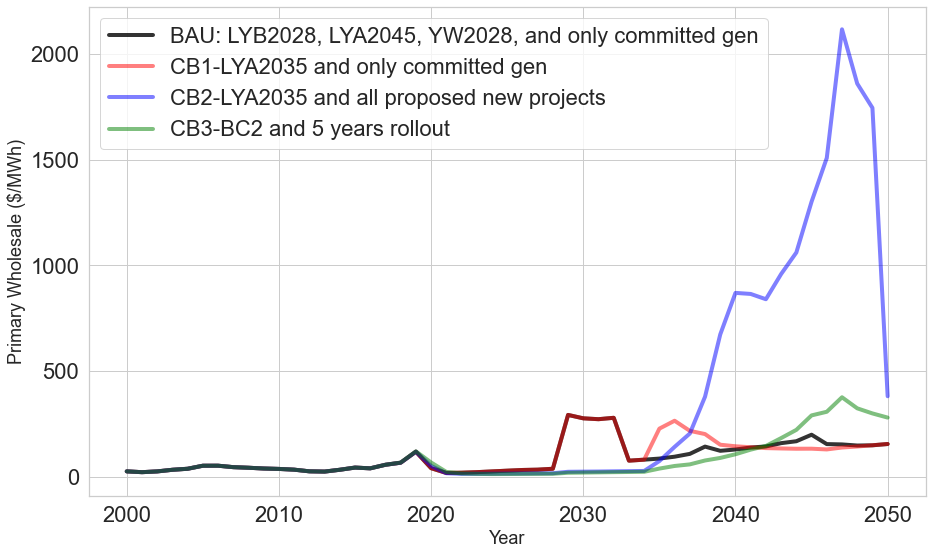

In [508]:
plt.figure(figsize=(15,9))
years = [DT.datetime.strptime(str(int(date)),'%Y') for date in bau_results_df['Time (Year)'].values]
years =  bau_results_df['Time (Year)'].values
#LYA2045 = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/csv/VIC/VICSimDataYearSummary_seed_LYA2045.csv')
LYA2045 = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/csv/VIC/VICSimDataYearSummary_seed_1646173210830.csv')
LYA2045 = LYA2045[LYA2045['Time (Year)'] > 1999]


#plt.plot( years, bau_results_df['Primary Wholesale ($/MWh)'], color='black', alpha = 0.8, linewidth=4, label='BAU')
plt.plot( years, LYA2045['Primary Wholesale ($/MWh)'], color='black', alpha = 0.8, linewidth=4, label='BAU: LYB2028, LYA2045, YW2028, and only committed gen')
plt.plot( years, yearPolicyRunBC1['Primary Wholesale ($/MWh)'], color='red', alpha = 0.5, linewidth=4, label='CB1-LYA2035 and only committed gen')
plt.plot( years, yearPolicyRunBC2['Primary Wholesale ($/MWh)'], color='blue', alpha = 0.5, linewidth=4, label='CB2-LYA2035 and all proposed new projects')
plt.plot (years, yearPolicyRunBC3['Primary Wholesale ($/MWh)'], color='green', alpha = 0.5, linewidth=4, label='CB3-BC2 and 5 years rollout')

plt.xlabel('Year', size=18)
plt.ylabel('Primary Wholesale ($/MWh)', size=18)
#plt.title('What if Brookes-Cannon (Spot Prices)?')
plt.legend(loc = 'upper left')

### Tariffs

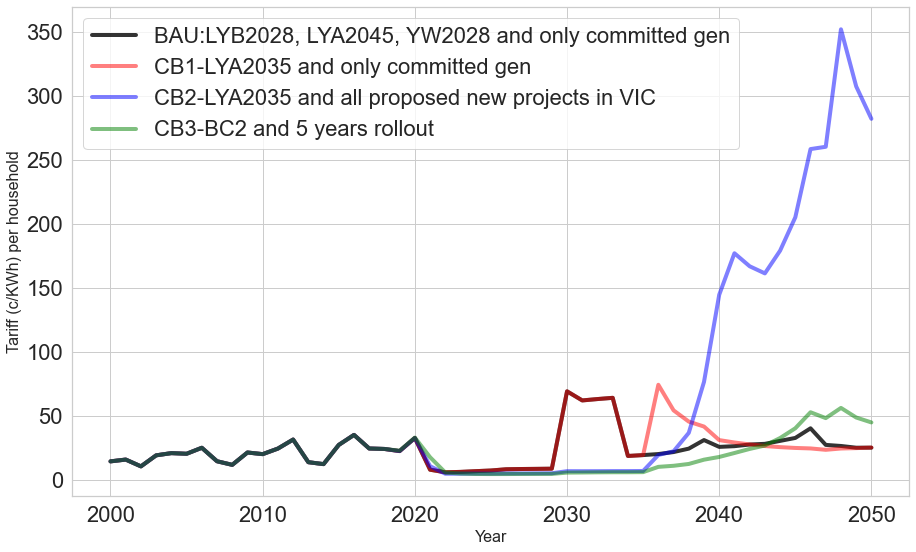

In [507]:
plt.figure(figsize=(15,9))
years = [DT.datetime.strptime(str(int(date)),'%Y') for date in bau_results_df['Time (Year)'].values]
years =  bau_results_df['Time (Year)'].values

#plt.plot( years, bau_results_df['Avg Tariff (c/KWh) per household'], color='black', alpha = 0.8, linewidth=4, label='BAU')
plt.plot( years, LYA2045['Avg Tariff (c/KWh) per household'], color='black', alpha = 0.8, linewidth=4, label='BAU:LYB2028, LYA2045, YW2028 and only committed gen')
plt.plot( years, yearPolicyRunBC1['Avg Tariff (c/KWh) per household'], color='red', alpha = 0.5, linewidth=4, label='CB1-LYA2035 and only committed gen')
plt.plot( years, yearPolicyRunBC2['Avg Tariff (c/KWh) per household'], color='blue', alpha = 0.5, linewidth=4, label='CB2-LYA2035 and all proposed new projects in VIC')
plt.plot( years, yearPolicyRunBC3['Avg Tariff (c/KWh) per household'], color='green', alpha = 0.5, linewidth=4, label='CB3-BC2 and 5 years rollout')

plt.xlabel('Year', size=16)
plt.ylabel('Tariff (c/KWh) per household', size=16)
#plt.title('What if Brookes-Cannon (Tariffs)?')
plt.legend()

### Electricity Production by Fuel Type and Market production

In [492]:
# Production per market type
# LYA closeing in 2045
spotMarketProdLYA2045 = LYA2045['System Production Primary Spot']* mwh_to_gwh
secondSpotMarketProdLYA2045 = LYA2045['System Production Secondary Spot']* mwh_to_gwh
offSpotLYA2045 = LYA2045['System Production Off Spot']* mwh_to_gwh

yMLYA2045 = ([spotMarketProdLYA2045, secondSpotMarketProdLYA2045, offSpotLYA2045])

# imports
importProdLY2045 = consumptionBau -  spotMarketProdLYA2045 - secondSpotMarketProdLYA2045 - offSpotLYA2045

# BC1

spotMarketProdBC1 = yearPolicyRunBC1['System Production Primary Spot']* mwh_to_gwh
secondSpotMarketProdBC1 = yearPolicyRunBC1['System Production Secondary Spot']* mwh_to_gwh
offSpotBC1 = yearPolicyRunBC1['System Production Off Spot']* mwh_to_gwh

yMBC1 = ([spotMarketProdBC1, secondSpotMarketProdBC1, offSpotBC1])

# imports
importProdBC1 = consumptionBau -  spotMarketProdBC1 - secondSpotMarketProdBC1 - offSpotBC1

# BC2

spotMarketProdBC2 = yearPolicyRunBC2['System Production Primary Spot']* mwh_to_gwh
secondSpotMarketProdBC2 = yearPolicyRunBC2['System Production Secondary Spot']* mwh_to_gwh
offSpotBC2= yearPolicyRunBC2['System Production Off Spot']* mwh_to_gwh

yMBC2 = ([spotMarketProdBC2, secondSpotMarketProdBC2, offSpotBC2])

#imports

importProdBC2 = consumptionBau -  spotMarketProdBC2 - secondSpotMarketProdBC2 - offSpotBC2

# BC3

spotMarketProdBC3 = yearPolicyRunBC3['System Production Primary Spot']* mwh_to_gwh
secondSpotMarketProdBC3 = yearPolicyRunBC3['System Production Secondary Spot']* mwh_to_gwh
offSpotBC3= yearPolicyRunBC3['System Production Off Spot']* mwh_to_gwh

yMBC3 = ([spotMarketProdBC3, secondSpotMarketProdBC3, offSpotBC3])

#imports

importProdBC3 = consumptionBau -  spotMarketProdBC3 - secondSpotMarketProdBC3 - offSpotBC3



In [493]:
x = bau_results_df['Time (Year)']

# Production per fuel and technology type
coalProdLYA2045 = LYA2045['System Production Coal'] * mwh_to_gwh
waterProdLYA2045 = LYA2045['System Production Water'] * mwh_to_gwh
solarRooftopProdLYA2045 = LYA2045['System Production Rooftop PV'] * mwh_to_gwh
windProdLYA2045 = LYA2045['System Production Wind'] * mwh_to_gwh
gasProdLYA2045= LYA2045['System Production Gas'] * mwh_to_gwh
solarProdLYA2045 = LYA2045['System Production Solar'] * mwh_to_gwh
battProdLYA2045 = LYA2045['System Production Battery'] * mwh_to_gwh

yLYA2045= ([coalProdLYA2045, gasProdLYA2045, waterProdLYA2045, windProdLYA2045, solarRooftopProdLYA2045, 
            solarProdLYA2045, battProdLYA2045, importProdLY2045])

# Production What if BC1

coalProdBC1 = yearPolicyRunBC1['System Production Coal'] * mwh_to_gwh
waterProdBC1 = yearPolicyRunBC1['System Production Water'] * mwh_to_gwh
solarRooftopProdBC1 = yearPolicyRunBC1['System Production Rooftop PV'] * mwh_to_gwh
windProdBC1 = yearPolicyRunBC1['System Production Wind'] * mwh_to_gwh
gasProdBC1= yearPolicyRunBC1['System Production Gas'] * mwh_to_gwh
solarProdBC1 = yearPolicyRunBC1['System Production Solar'] * mwh_to_gwh
battProdBC1 = yearPolicyRunBC1['System Production Battery'] * mwh_to_gwh

yBC1= ([coalProdBC1, gasProdBC1, waterProdBC1, windProdBC1, solarRooftopProdBC1, 
            solarProdBC1, battProdBC1, importProdBC1])


# Production what if BC2

coalProdBC2 = yearPolicyRunBC2['System Production Coal'] * mwh_to_gwh
waterProdBC2 = yearPolicyRunBC2['System Production Water'] * mwh_to_gwh
solarRooftopProdBC2 = yearPolicyRunBC2['System Production Rooftop PV'] * mwh_to_gwh
windProdBC2 = yearPolicyRunBC2['System Production Wind'] * mwh_to_gwh
gasProdBC2 = yearPolicyRunBC2['System Production Gas'] * mwh_to_gwh
solarProdBC2 = yearPolicyRunBC2['System Production Solar'] * mwh_to_gwh
battProdBC2 = yearPolicyRunBC2['System Production Battery'] * mwh_to_gwh

yBC2= ([coalProdBC2, gasProdBC2, waterProdBC2, windProdBC2, solarRooftopProdBC2, 
            solarProdBC2, battProdBC2, importProdBC2])

# Production what if BC3

coalProdBC3 = yearPolicyRunBC3['System Production Coal'] * mwh_to_gwh
waterProdBC3 = yearPolicyRunBC3['System Production Water'] * mwh_to_gwh
solarRooftopProdBC3= yearPolicyRunBC3['System Production Rooftop PV'] * mwh_to_gwh
windProdBC3 = yearPolicyRunBC3['System Production Wind'] * mwh_to_gwh
gasProdBC3 = yearPolicyRunBC3['System Production Gas'] * mwh_to_gwh
solarProdBC3 = yearPolicyRunBC3['System Production Solar'] * mwh_to_gwh
battProdBC3 = yearPolicyRunBC3['System Production Battery'] * mwh_to_gwh

yBC3= ([coalProdBC3, gasProdBC3, waterProdBC3, windProdBC3, solarRooftopProdBC3, 
            solarProdBC3, battProdBC3, importProdBC3])



Text(0.5, 0, 'Year')

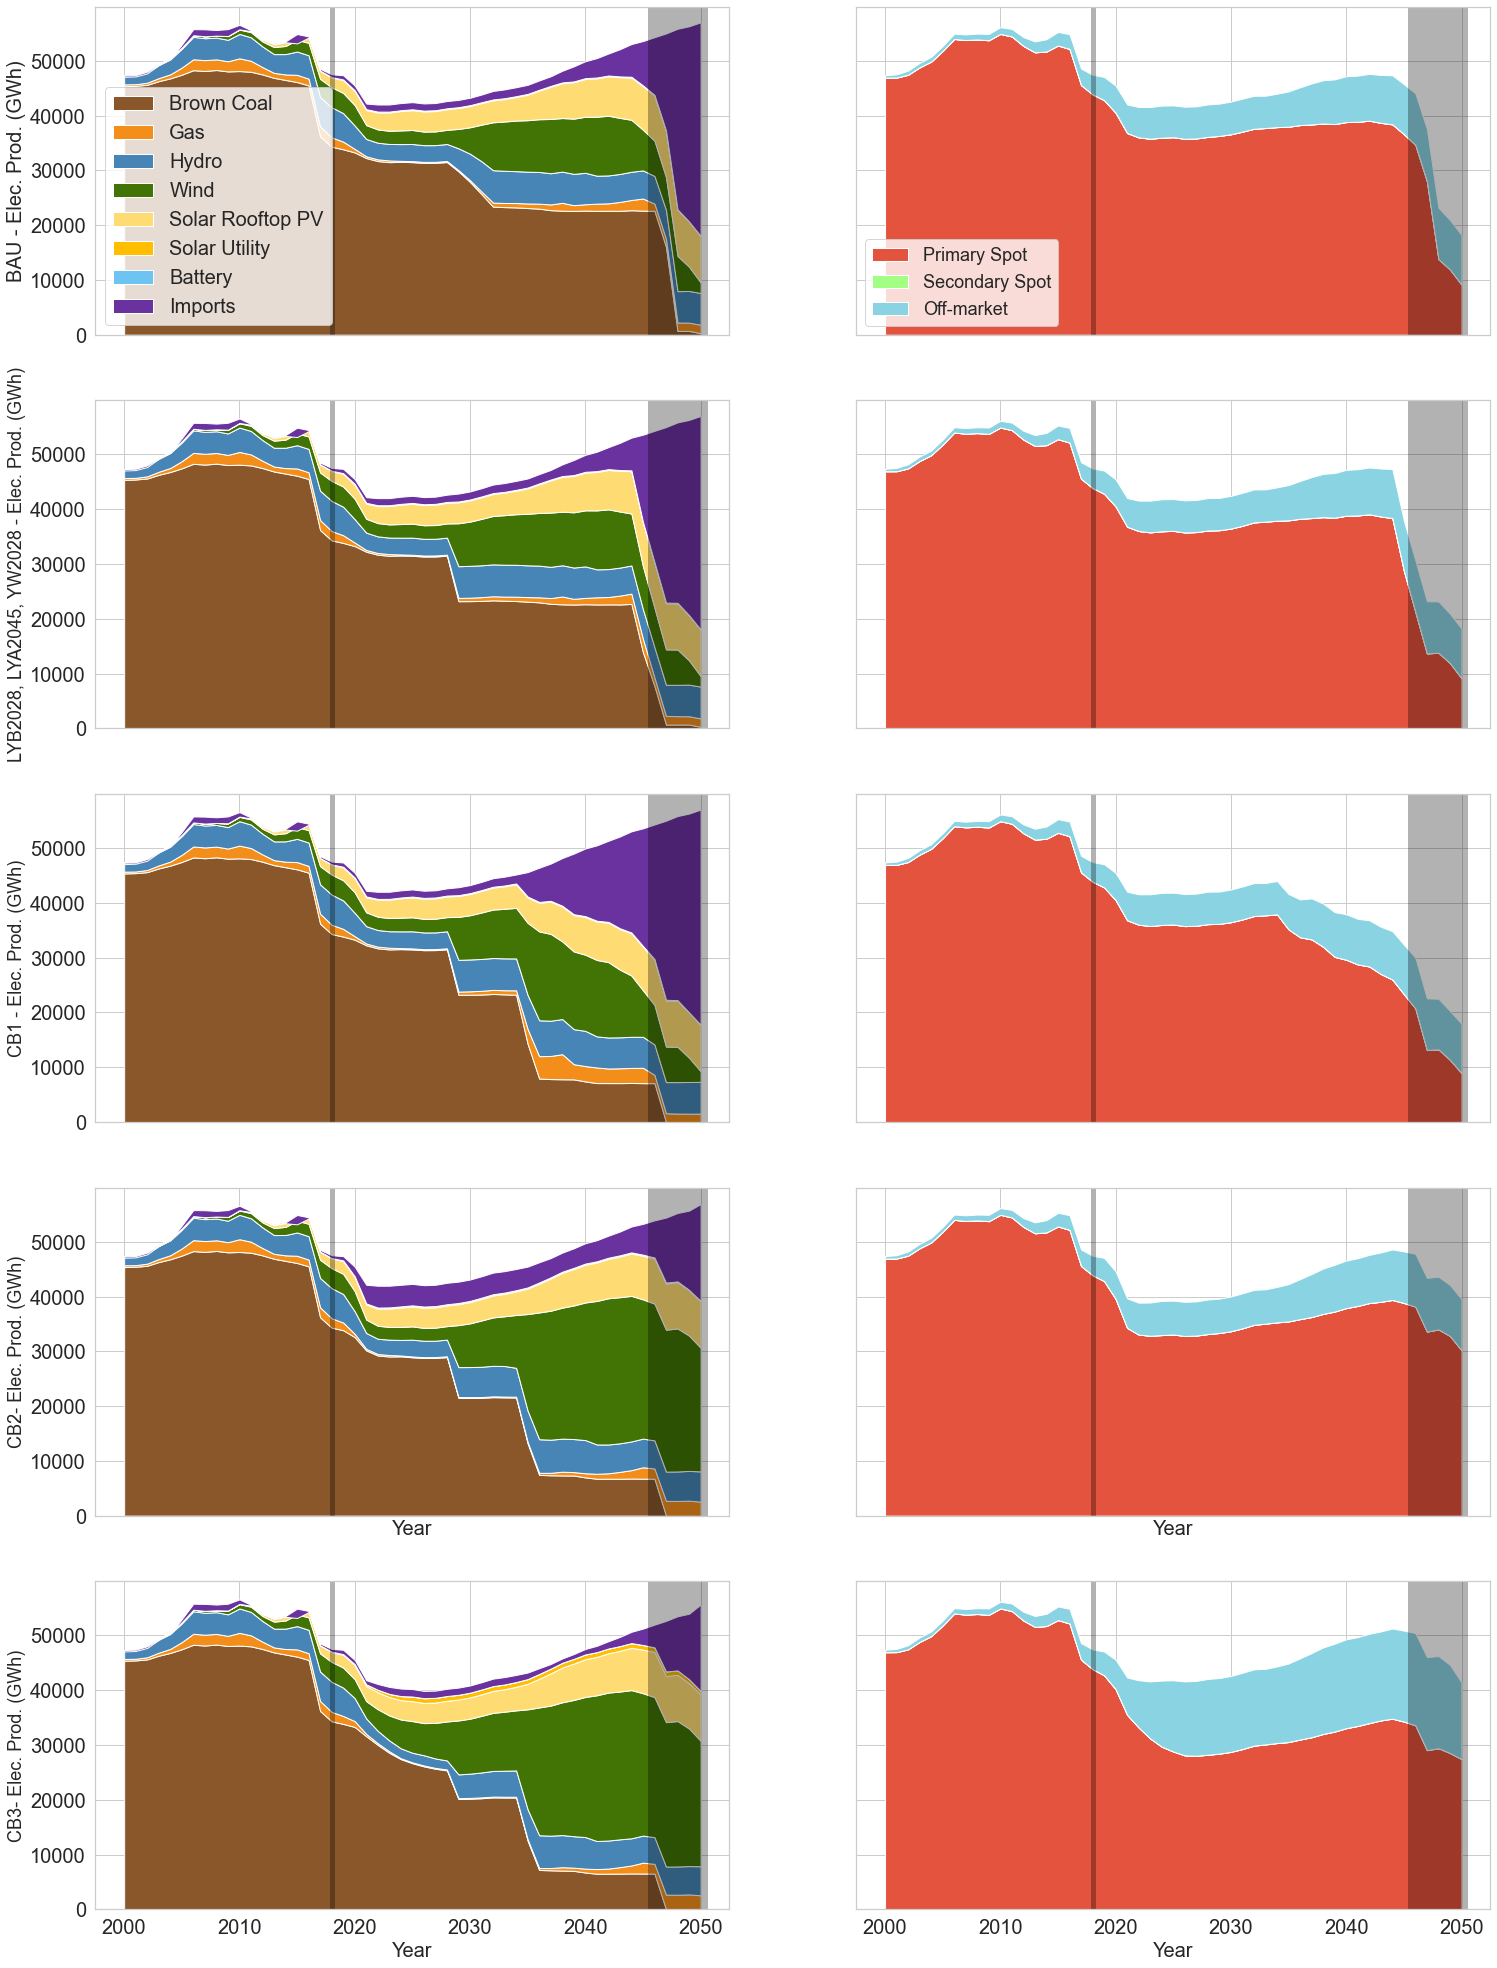

In [510]:
tickskFont = 20
rows, cols = 5, 2
plt.subplots(rows, cols, figsize = (25,35), sharex=True, sharey=True)

plt.subplot(5,2,1) 
#fig.suptitle('Electricity Production by Fuel Type and Market type')

x = bau_results_df['Time (Year)']

plt.stackplot(x,yBau, colors=[brown,orange,blue, green, lightYellow, mustard, skyBlue, purple],
              labels=['Brown Coal', 'Gas', 'Hydro', 'Wind', 'Solar Rooftop PV', 'Solar Utility','Battery', 'Imports'])

plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.3, lw = 60)
#plt.title("Electricity Production (GWh) per Technology (top) and Market (bottom) Type")
plt.legend(prop={'size':20}, loc = 'lower left')
plt.xticks(fontsize= tickskFont)
plt.yticks(fontsize = tickskFont)
#plt.xlabel('Year', size=12)
plt.ylabel('BAU - Elec. Prod. (GWh)', size=20)

plt.subplot(5,2,3) 
plt.stackplot(x,yLYA2045, colors=[brown,orange,blue, green, lightYellow, mustard, skyBlue, purple], 
              labels=[r'Brown Coal', 'Gas', 'Hydro', 'Wind', 'Solar Rooftop PV', 'Solar Utility','Battery', 'Imports'])
plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.3, lw = 60)
plt.xticks(fontsize= tickskFont)
plt.yticks(fontsize = tickskFont)
plt.ylabel('LYB2028, LYA2045, YW2028 - Elec. Prod. (GWh)', size=18)

plt.subplot(5,2,5) 

plt.stackplot(x,yBC1, colors=[brown,orange,blue, green, lightYellow, mustard, skyBlue, purple],
              labels=[r'Brown Coal', 'Gas', 'Hydro', 'Wind', 'Solar Rooftop PV', 'Solar Utility','Battery', 'Imports'])

plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.3, lw = 60)
plt.xticks(fontsize= tickskFont)
plt.yticks(fontsize = tickskFont)
plt.ylabel('CB1 - Elec. Prod. (GWh)', size=18)

plt.subplot(5,2,7) 

plt.stackplot(x,yBC2, colors=[brown,orange,blue, green, lightYellow, mustard, skyBlue, purple], 
              labels=[r'Brown Coal', 'Gas', 'Hydro', 'Wind', 'Solar Rooftop PV', 'Solar Utility','Battery', 'Imports'])
plt.ylabel('CB2- Elec. Prod. (GWh)', size=18)
plt.xlabel('Year', size=20)

plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.3, lw = 60)
plt.xticks(fontsize= tickskFont)
plt.yticks(fontsize = tickskFont)

plt.subplot(5,2,9) 

plt.stackplot(x,yBC3, colors=[brown,orange,blue, green, lightYellow, mustard, skyBlue, purple], 
              labels=[r'Brown Coal', 'Gas', 'Hydro', 'Wind', 'Solar Rooftop PV', 'Solar Utility','Battery', 'Imports'])
plt.ylabel('CB3- Elec. Prod. (GWh)', size=18)
plt.xlabel('Year', size=20)

plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.3, lw = 60)
plt.xticks(fontsize= tickskFont)
plt.yticks(fontsize = tickskFont)

plt.subplot(5,2,2) 
yMBau = ([spotMarketProdBau, secondSpotMarketProdBau, offSpotBau])

plt.stackplot(x,yMBau, colors=[primary, secondary, off], 
              labels=['Primary Spot', 'Secondary Spot', 'Off-market'])

plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.3, lw = 60)

plt.xticks(fontsize= tickskFont)
plt.yticks(fontsize = tickskFont)
plt.legend(prop={'size':18}, loc = 'lower left') #'upper right', bbox_to_anchor  = (1.25, 1.02))

plt.subplot(5,2,4) 

plt.stackplot(x,yMLYA2045, colors=[primary, secondary, off], 
              labels=['Primary Spot', 'Secondary Spot', 'Off-market'])

plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.3, lw = 60)
plt.xticks(fontsize= tickskFont)
plt.yticks(fontsize = tickskFont)

plt.subplot(5,2,6) 

plt.stackplot(x,yMBC1, colors=[primary, secondary, off], 
              labels=['Primary Spot', 'Secondary Spot', 'Off-market'])

plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.3, lw = 60)
plt.xticks(fontsize= tickskFont)
plt.yticks(fontsize = tickskFont)

plt.subplot(5,2,8) 

plt.stackplot(x,yMBC2, colors=[primary, secondary, off], 
              labels=['Primary Spot', 'Secondary Spot', 'Off-market'])

plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.3, lw = 60)
plt.xticks(fontsize= tickskFont)
plt.yticks(fontsize = tickskFont)
plt.xlabel('Year', size=20)


plt.subplot(5,2,10) 

plt.stackplot(x,yMBC3, colors=[primary, secondary, off], 
              labels=['Primary Spot', 'Secondary Spot', 'Off-market'])

plt.axvline(2018, ls='-',color='black', alpha = 0.3, lw = 5)
plt.axvline(2048, ls='-',color='black', alpha = 0.3, lw = 60)
plt.xticks(fontsize= tickskFont)
plt.yticks(fontsize = tickskFont)
plt.xlabel('Year', size=20)